# **Modeling I** 

Author: Wenyi (Tomas) Zhang

Based on the research requirements of Haitong Futures, and given the constraints imposed by data frequency and sample size (with fewer than 3,000 effective observations), this study prioritizes tree-based models—including decision trees and their ensemble variants—as the primary modeling framework.

The appeal of tree-based models lies in their ability to capture nonlinear relationships and interaction effects under relatively weak modeling assumptions, without requiring explicit distributional specifications. In addition, they naturally support feature importance analysis and rule-path interpretation, making them well suited for diagnostic tasks such as evaluating factor effectiveness, state dependence, and conditional behavior.

It should be noted that single decision trees are prone to overfitting and high variance in small-sample settings. Accordingly, this study applies explicit regularization controls—such as limiting tree depth and enforcing minimum leaf sizes—and further introduces ensemble techniques (e.g., bagging and boosting) to improve stability and generalization.

For model evaluation, a rolling (walk-forward) time-series cross-validation scheme is adopted. A purge procedure, aligned with the prediction horizon, is applied at the training–testing boundary to mitigate information leakage and better approximate realistic trading conditions. Overall, under current data constraints, the proposed framework achieves a balanced trade-off between interpretability, robustness, and practical deployability, and is well aligned with the research and application needs of Haitong Futures.

基于海通期货的研究需求，并考虑到当前数据频率与样本规模受限（有效样本量不足 3,000 条），本研究在建模阶段优先采用基于树的模型体系，包括决策树及其集成方法，作为主要建模框架。

树模型的优势在于，其在较弱的建模假设下即可刻画非线性关系及变量间的交互效应，无需对数据分布形式作出明确假设；同时，模型天然支持特征重要性分析与规则路径解释，因而非常适合用于因子有效性、状态依赖性以及条件行为的诊断分析。

需要指出的是，单棵决策树在小样本条件下容易出现过拟合和方差偏高的问题。为此，本研究通过限制树深、设定最小叶节点样本数等方式对模型复杂度进行约束，并进一步引入 Bagging、Boosting 等集成方法，以提升模型的稳定性与泛化能力。

在模型评估方面，采用滚动（walk-forward）时间序列交叉验证框架，并在训练与测试边界处引入与预测周期一致的 purge 处理，以降低信息泄露风险并更贴近真实交易环境。在当前数据条件下，该建模与评估体系在可解释性、稳健性与实际可落地性之间取得了较为合理的平衡，符合海通期货的研究与应用需求。

#### **Brief Introductions of Regression Tree**

In essence, decision trees operate as collections of hierarchical if–else rules applied to the input feature space. At each split, the model selects a variable and a threshold that maximizes information gain, thereby partitioning the data into increasingly homogeneous subsets.

For classification trees, information gain is typically defined as the reduction in weighted impurity, where impurity is measured using criteria such as entropy or Gini index. Each split is chosen to minimize the expected class uncertainty within child nodes.

For regression trees, the objective is instead to reduce the weighted prediction error within each node. In practice, this is commonly implemented by minimizing the weighted mean squared error (MSE) or equivalently the within-node variance, leading to splits that improve local predictive accuracy.

From this perspective, decision trees can be viewed as a piecewise-constant approximation of the target function, where nonlinearities and interaction effects naturally emerge from the recursive partitioning process rather than being imposed a priori.

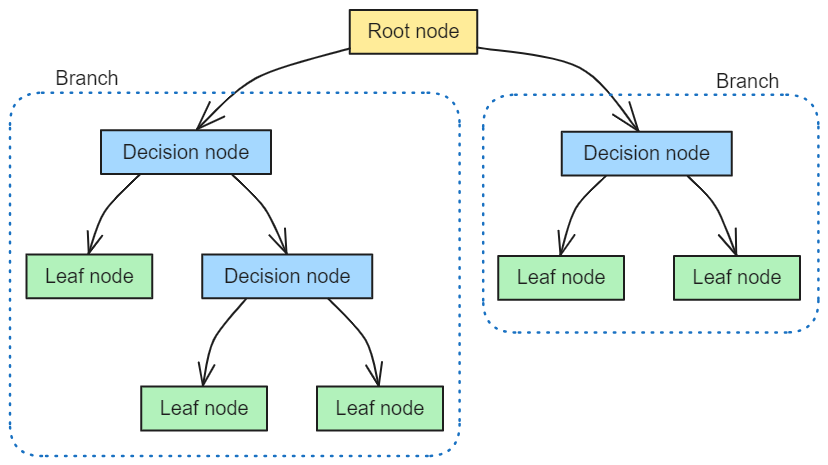

Nevertheless, the recursive nature of decision trees makes them structurally susceptible to overfitting unless tree growth is properly constrained.

从本质上看，决策树可以理解为一组层级化的 if–else 规则，对输入特征空间进行递归划分。每一次节点分裂，模型都会选择一个特征及其切分阈值，使得 信息增益最大化，从而将样本划分为更加“纯净”的子区域。

在 分类树 中，信息增益通常定义为 加权不纯度的下降，不纯度可由 信息熵（Entropy）或基尼指数（Gini） 衡量，分裂目标是降低子节点中的类别不确定性。在 回归树 中，分裂准则则转化为 节点内预测误差的下降，实践中通常通过最小化 加权均方误差（MSE）或等价的节点内方差 来实现，使得每个子节点内部的目标值更加集中。

因此，决策树可以被视为对目标函数的一种 分段常数近似（piecewise-constant approximation）：非线性关系与变量交互效应并非预先设定，而是通过递归划分过程自然涌现。需要指出的是，由于 递归划分（recursive partitioning） 的结构特性，决策树在小样本条件下 天然容易产生过拟合。若不对树的生长过程施加约束（如限制树深、最小叶子样本数或分裂条件），模型容易对噪声而非有效信号进行拟合。

#### **Purge & Embargo**

In general, classical machine learning models rely on cross-validation to assess robustness and generalization performance. However, for time-series data, conventional validation schemes such as K-fold or leave-one-out cross-validation are not appropriate, as they disrupt the temporal ordering of observations and may introduce future information leakage into the training set.

Therefore, when constructing validation folds for time-series modeling, data must be split strictly in chronological order. Approaches such as forward chaining or rolling time-window validation are commonly adopted to generate training and validation sets, with the aim of mimicking how a model would sequentially receive data and produce forecasts in real-world settings.

In the model_selection module of scikit-learn, the TimeSeriesSplit method is specifically designed for this purpose. Its core mechanism is to progressively move the test window forward in time while gradually expanding the training window across successive splits. The resulting data partitioning scheme is illustrated in the figure below.

一般而言，经典机器学习模型通常通过 交叉验证（cross-validation） 来评估模型的稳健性与泛化能力。然而，对于 时间序列数据，传统的 K 折交叉验证 或 留一法 并不适用，因为这类方法会打乱样本的时间顺序，从而将未来信息泄露至训练集，造成评估偏差。

因此，在时间序列建模中，验证集的构建必须 严格遵循时间先后顺序。实践中通常采用 前向链式（forward chaining） 或 滚动时间窗口（rolling window） 的方式生成训练集与验证集，以更真实地模拟模型在实际交易或预测场景中随时间逐步接收数据并作出预测的过程。

在 scikit-learn 的 model_selection 模块中，提供了专用于时间序列场景的 TimeSeriesSplit 方法。其核心思想是：在每一次划分中，测试集沿时间轴向前滚动，而训练集规模随之逐步扩展。其具体的数据划分方式如下图所示。

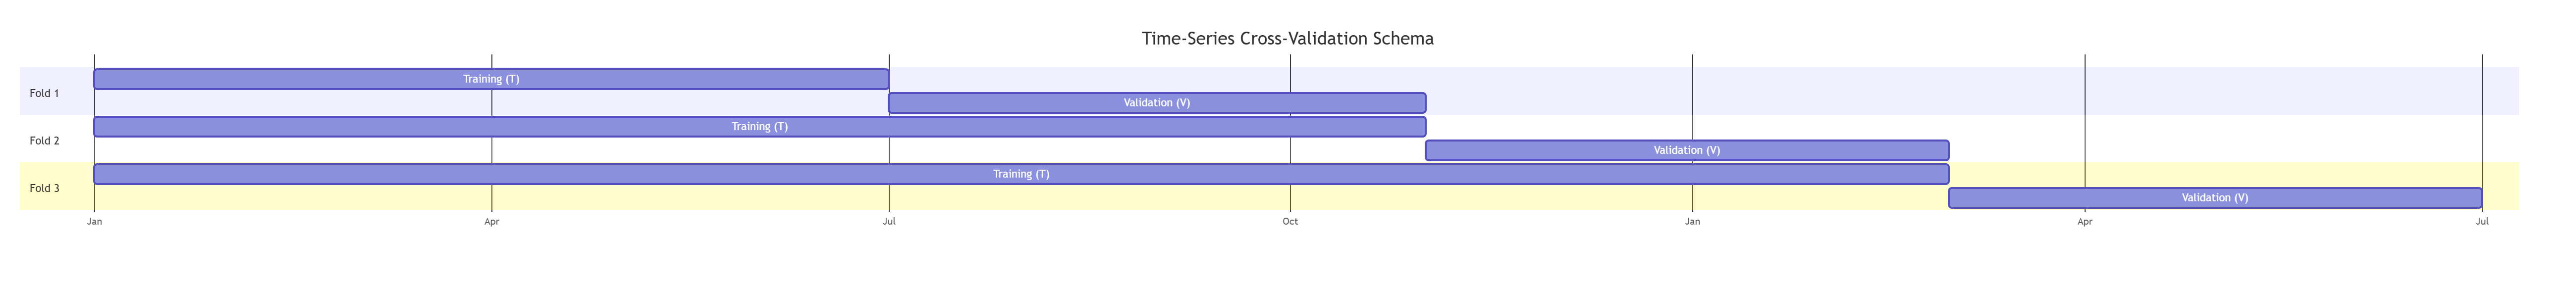


Although TimeSeriesSplit is a classical approach for time-series cross-validation, it exhibits clear limitations in non-stationary settings such as financial modeling. As the training window continuously expands, early observations may correspond to market regimes that differ substantially from those in the test period, introducing evaluation bias and weakening the ability of the validation procedure to reflect true out-of-sample generalization performance.

Moreover, classical time-series validation schemes often suffer from implicit overlap between training and testing label horizons, which can lead to information leakage when target variables span multiple time steps.

To address these issues, more rigorous validation frameworks—namely Purged and Embargo cross-validation—have been proposed in recent literature. These methods enforce strict temporal separation between training and validation sets, ensuring independence across label periods and thereby providing more reliable performance estimates. As a result, they have gradually replaced traditional approaches in many financial machine learning applications.

In practice, researchers often adopt rolling validation with explicit temporal gaps as a more operationally tractable compromise, balancing methodological rigor with implementation complexity. In this project, we implement custom Purged cross-validation and an enhanced Embargo scheme to control information leakage while improving the robustness and generalization of model evaluation.

尽管 TimeSeriesSplit 是经典的时间序列交叉验证方法，但在 金融建模等非平稳场景 下，其局限性较为明显。随着训练窗口不断扩张，早期样本所处的市场环境可能与测试期存在显著差异，从而引入 评估偏差，难以准确反映模型的真实泛化能力。

此外，传统时间序列验证方法往往存在 训练期与测试期标签区间发生重叠 的问题，尤其在多期预测或持有期设定下，容易导致 信息泄露。

针对上述问题，近年来更为严谨的研究提出了 Purged 与 Embargo 交叉验证 方法。该类方法通过在时间轴上对训练集与验证集进行 严格隔离，确保不同标签期之间的独立性，从而获得更可靠的模型评估结果，并逐渐在金融机器学习领域中取代传统验证方案。

在实际应用中，研究者也常采用 带时间间隔的滚动验证 作为更具可操作性的折中方案，在评估严谨性与实现复杂度之间取得平衡。在本项目中，我们将自建 Purged 交叉验证 及 改进版 Embargo 验证方案，在有效控制信息泄露风险的同时，进一步提升模型的泛化能力。

| Aspect                          | **Purged Cross-Validation**                                                      | **Embargo Cross-Validation**                                                        |
| ------------------------------- | -------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------- |
| Methodology                      | Removes training samples whose **label periods overlap** with the validation set | Excludes training samples within a **temporal buffer** around the validation window |
| How it works                    | Drops all training observations whose label spans intersect the test window      | Applies a **time gap (embargo)** before and/or after the test window                |
| Typical use case                | When targets depend on **future returns over a fixed horizon**                   | When market impact, autocorrelation, or delayed information effects exist           |
| Relationship to TimeSeriesSplit | Extends TimeSeriesSplit by enforcing **label-aware exclusion**                   | Extends TimeSeriesSplit by enforcing **time-gap separation**                        |
| Practical trade-off             | Higher statistical rigor, higher data loss                                       | Simpler control of leakage, moderate data loss                                      |
| Common reference                | López de Prado (2018)                                                            | López de Prado (2018)                                                               |


#### **Splitters**

A custom cross-validator intended to work with scikit-learn must inherit from BaseCrossValidator and implement at least two methods: get_n_splits, split

This is required for the cross-validator to be properly recognized and used in model training and parameter tuning (e.g. GridSearchCV, RandomizedSearchCV).

The split method must be implemented using the yield syntax, which returns an iterator that sequentially produces (train_idx, test_idx) pairs.
This lazy iteration design allows scikit-learn to consume splits one fold at a time without storing all splits in memory, and is the standard contract expected by sklearn’s model selection utilities.

一个自定义的交叉验证器如果希望被 scikit-learn 正确识别并用于参数调优（如 GridSearchCV、RandomizedSearchCV），需要：

继承 BaseCrossValidator 实现 get_n_splits 和 split 两个方法。 其中，split 方法必须使用 yield 语法，返回一个 可迭代对象（iterator），按顺序生成 (train_idx, test_idx)。 这种惰性迭代的设计使得 sklearn 能够逐折地消费数据，而无需一次性存储所有切分结果，这是 sklearn 交叉验证接口的标准约定。

In [1]:
from sklearn.model_selection import BaseCrossValidator, KFold, StratifiedKFold, TimeSeriesSplit
import numpy as np
splitters = [KFold(), StratifiedKFold(), TimeSeriesSplit()]

for splitter in splitters:
    print(f"{splitter.__class__.__name__} is a BaseCrossValidator: "
          f"{isinstance(splitter, BaseCrossValidator)}")

KFold is a BaseCrossValidator: True
StratifiedKFold is a BaseCrossValidator: True
TimeSeriesSplit is a BaseCrossValidator: True


In [2]:
def count_up_to(n):
    for i in range(1, n + 1):
        yield i  

gen = count_up_to(3)

print(gen)              # <generator object count_up_to at 0x...>
print(next(gen))        # 1
#print(next(gen))        # 2
#print(next(gen))        # 3

<generator object count_up_to at 0x000001DAFADB5C40>
1


**Purge Expansion**

We implement purge in the classic sense: for each fold, a fixed purge gap is applied by removing a number of observations from the end of the training set immediately preceding the test window, in order to prevent boundary contamination from rolling features or target construction.

我们按照时间序列交叉验证中的经典定义实现了 purge 机制：在每一折中，通过从训练集末尾移除固定数量的观测值（purge gap），以避免滚动特征或标签构造在训练集与测试集边界处产生信息污染。

**Rolling Embargo**

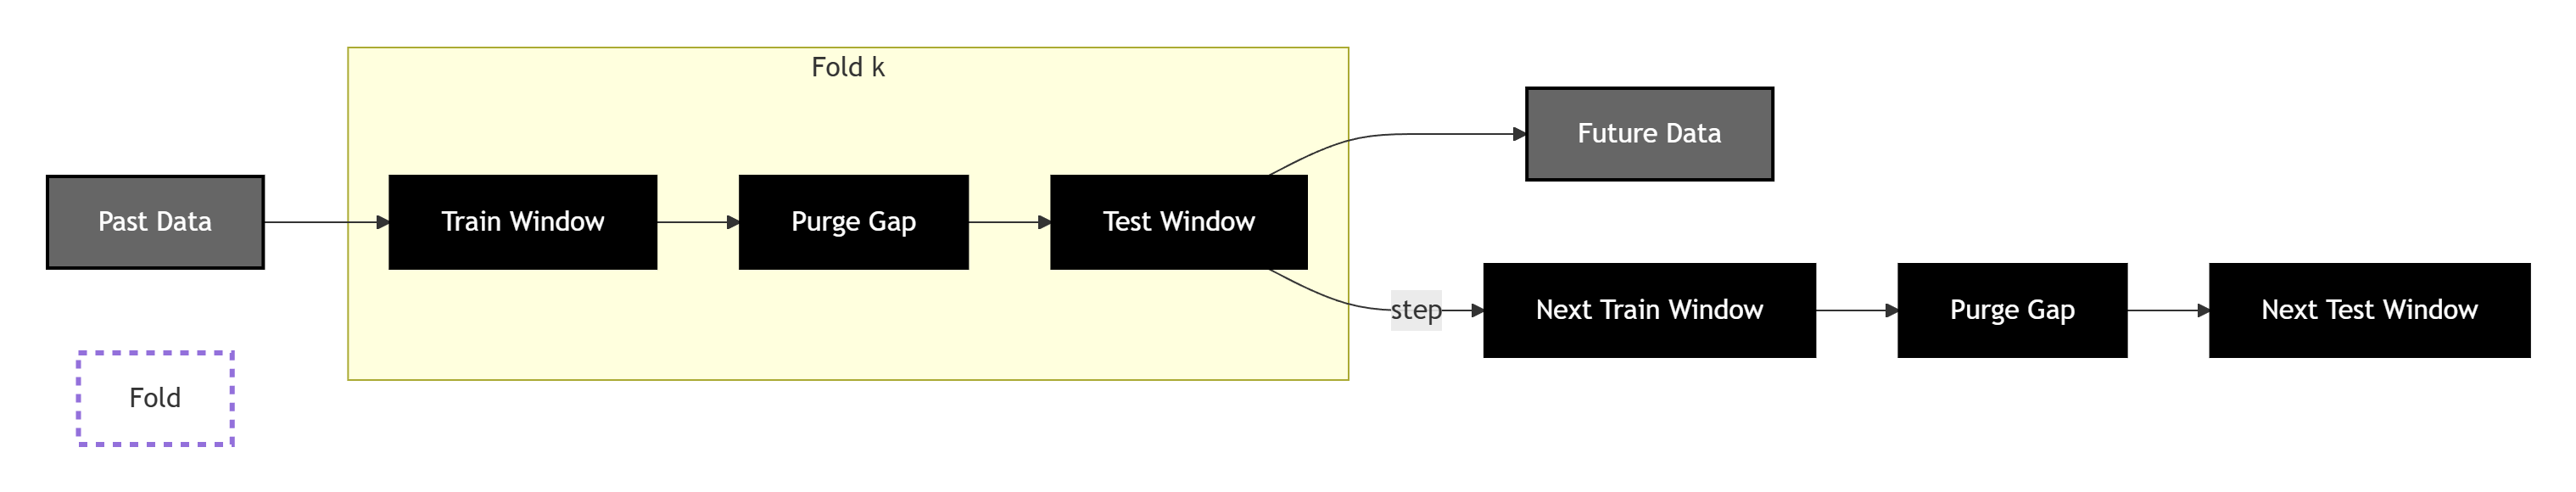

We adopt a strict walk-forward rolling cross-validation scheme. For each fold, a fixed purge gap is applied by removing observations from the end of the training window immediately preceding the test window, preventing boundary contamination from rolling features or target construction.

Temporal separation between consecutive folds is controlled via the step parameter. By setting the step size no smaller than the test window plus the label horizon, label overlap across folds is avoided, effectively subsuming the role of embargo in a walk-forward setting. While raw observations may overlap across folds, this reuse reflects the information set available in live trading and preserves causal validity.

在 Rolling Embargo 方法中我们采用严格的 walk-forward 滚动式交叉验证结构。在每一折中，通过在训练集与测试集之间引入固定长度的 purge gap，从训练集末尾剔除紧邻测试区间的观测值，以避免滚动特征或标签构造在边界处产生信息污染。

相邻折之间的时间隔离主要由 step 参数控制。当 step 的取值不小于测试窗口长度与标签预测期之和时，可确保训练标签不会与测试区间发生重叠，从而在 walk-forward 场景下隐式地实现 embargo 的作用。尽管不同折之间允许复用历史观测数据，但该设计更贴近真实交易中的信息集，具有良好的因果一致性。

**Shift Embargo**

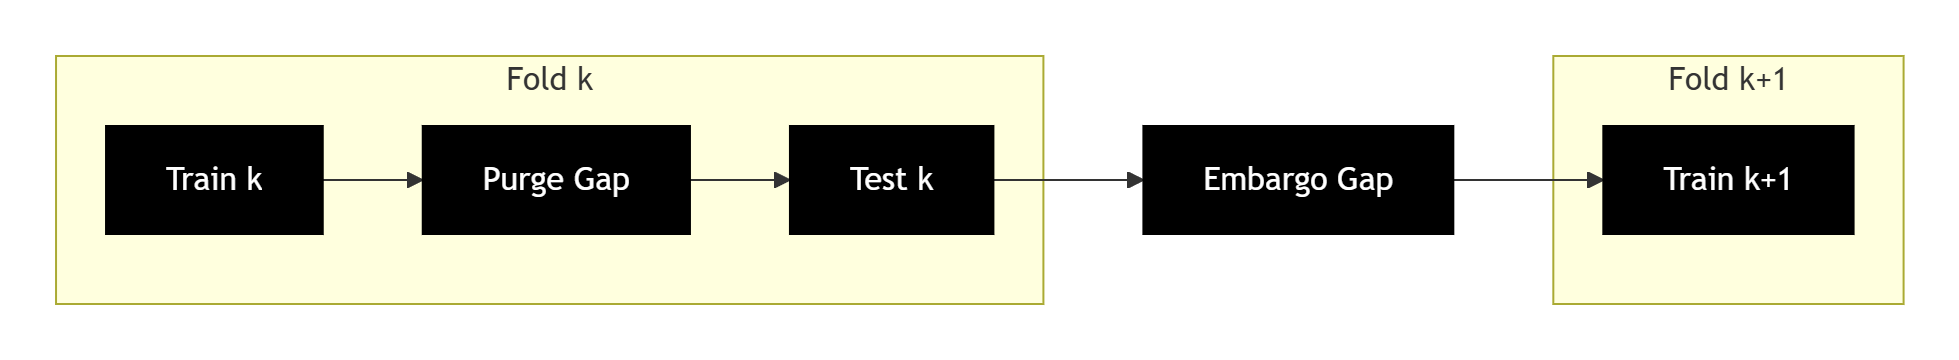

ShiftedEmbargoSplit implements a clean, strictly separated cross-validation scheme. Each fold consists of a fixed training window followed by a purge gap and a test window, and an explicit embargo gap is enforced before the next fold’s training window begins. This design guarantees strong temporal isolation between folds and avoids any overlap in training samples across folds.

However, this strict shifting structure consumes data rapidly, as historical observations are not reused once a fold advances. As a result, the effective sample size decreases quickly with the number of folds, which may lead to unstable estimation or reduced statistical power in practice. Moreover, this setting departs from the rolling retraining process typically used in live trading, where historical data remains available over time.

ShiftedEmbargoSplit 采用了一种结构上较为“干净”的交叉验证方式：每一折由固定长度的训练窗口、purge gap 与测试窗口组成，并在相邻两折之间显式引入 embargo gap，从而保证不同折之间在时间维度上的严格隔离，避免训练样本的重叠。

但该结构的代价是数据消耗速度较快。由于历史观测在折与折之间不会被重复使用，随着折数增加，有效样本规模迅速下降，可能导致估计不稳定或统计效力不足。此外，该方式与实际交易中常见的滚动式重训过程存在一定偏离，因此更适合作为稳健性或极端假设下的对照检验，而非主要评估方案。

#### **Decision Tree Modeling**

**Asset: CSI500**

In [3]:
from factors import treemodel_factors_daily_augment
from factors_technical import treemodel_factors_daily
from factors_robust import treemodel_factors_augment 
from splitters import PurgedTimeSeriesSplit, RollingEmbargoSplit, ShiftedEmbargoSplit
from cta_decision_tree import CTA_Trees 
from tree_utilities import tree_split_frequency 
import time
# mask = False
csi500 = treemodel_factors_augment(ticker = 'ic_main', frequency = 'day', target = 'ret1', light = False, verbose = False, mask = False)
csi500.quick_evaluation()
csi500.append_all()

[rolling_corr_report] Pairs exist but none met presence ≥ 70%. (corr_thresh=0.9, n_slices=10)


In [4]:
print(int(len(csi500.data)*0.9))

2343


Both the factor library and the modeling framework have asset-dependent limitations. Certain assets are inherently less suitable for time-series CTA modeling: in some cases due to structural characteristics (e.g., heavy macro or policy dominance), and in others because model outputs tend to collapse into trivial or unstable forms despite acceptable in-sample statistics.

Among the three equity index futures (IF, IH, IC), we select CSI 500 Index Futures (IC) as the baseline asset primarily because it features broader quantitative participation and more heterogeneous trading behavior, rather than being dominated by hedging or macro-driven flows. This makes IC more appropriate for evaluating factor–model interaction, lag behavior, and diagnostic consistency. In contrast, instruments that rely more heavily on macro exposure or directional hedging may exhibit dynamics that are less responsive to technical or time-series-driven signals.

We also note that IM (CSI 1000 Index Futures) could be a natural alternative candidate given its higher volatility and speculative characteristics. However, its shorter data history and limited effective sample size introduce additional constraints at the current stage, making robust modeling and diagnostics less reliable. For this reason, IM is not included as the primary demonstration asset in the present analysis.

因子库本身与建模框架均具有明显的资产依赖性。部分资产在结构上并不适合时间序列 CTA 建模：有些品种受宏观或政策因素主导较强，而另一些则即便在样本内统计表现尚可，模型预测仍可能退化为近似常数或状态不稳定的形式，难以形成可解释的交易信号。

在 IF、IH 与 IC 三个股指期货中，我们选择 中证 500 股指期货（IC） 作为基准资产，主要原因在于其 量化参与度更高、交易行为更为分散，而非主要由对冲或宏观敞口驱动。这一特性使 IC 更适合作为检验因子—模型交互关系、滞后结构以及诊断稳定性的测试对象。相比之下，更偏向宏观或套保属性的品种，其价格行为对时间序列或技术型信号的响应往往较弱。

此外，中证 1000 股指期货（IM） 在波动性和投机属性上具有一定吸引力，理论上也是潜在候选资产。但受限于 上市时间较短、有效样本规模不足，当前阶段在稳健建模与诊断方面仍存在明显约束，因此未作为本次示例分析的核心资产。

**Window Configure**

In [5]:
sub = csi500.data[['datetime', 'target']]
sub.iloc[2000:,:].head(2)

datetime    target
2000 2023-07-05 -0.006940
2001 2023-07-06 -0.002661

The choice of the starting point for the rolling embargo evaluation window is inherently subjective and requires judgment. In this project, which is intended primarily as a methodological and diagnostic demonstration, we select approximately index 2000 (2023-07-06) as the starting point of the test period. This choice balances two considerations: it provides a sufficient number of rolling folds for evaluation, while keeping the out-of-sample period reasonably aligned with recent market dynamics rather than overly diluted by distant historical regimes.

For the rolling embargo setup, we adopt a training window of 2000 observations, a test window of 60 observations, and a rolling step equal to 65. This configuration is intended to balance medium-horizon stability assessment with sensitivity to regime transitions. The rolling design allows model performance to be evaluated across evolving market conditions, while the incorporation of purge and embargo constraints mitigates information leakage arising from temporal proximity between training and testing samples.

Rolling embargo 测试窗口的起始位置本身具有一定主观性，需要结合研究目标作出判断。在本项目中，由于研究重点在于建模流程与诊断方法的演示，我们选择约 2000（对应 2023-07-06） 作为测试期起点。该选择在两方面取得平衡：一方面保证了足够数量的滚动测试折数，另一方面也使评估区间更贴近当前市场结构，避免被过早历史阶段的不同市场环境所稀释。

在滚动交叉验证配置中，我们采用 2000 的训练窗口、60 的测试窗口，并以 65 作为滚动步长。该设置旨在在中期稳定性评估与结构变化敏感性之间取得折中：训练窗口足够长以保证参数估计的稳健性，而相对独立的测试窗口则用于刻画模型在不同时段下的泛化表现。同时，通过在划分过程中引入 purge 与 embargo 机制，有效降低因时间邻近性带来的潜在信息泄露风险。

In [6]:
tree_sampler = CTA_Trees(ticker='ic_main', cls = treemodel_factors_augment)
tree_sampler.load(remove_columns = ['Phase_Sin', 'HT_DC_Period'], light= False, mask = False)
tree_sampler.prep()
sampler = tree_sampler.tune(ratio = 0.9, splitter = RollingEmbargoSplit(train_size= 2000, purge_gap = 5,  test_size= 60, step= 65), n = 1, param_grid =  {'max_depth': [6], 'min_samples_leaf': [100]})

**Tree Diagnosis Tools** 

In [7]:
from diagnosis import plot_pred_magnitude_diag, pred_magnitude_diag,  plot_true_magnitude_diag, plot_rolling_ic 
import pandas as pd
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from ic_augment import IC_Augment

For any model intended for signal production, rigorous and multi-angle diagnostics are mandatory.
In traditional forecast-based strategies, Directional Accuracy (DA) and Information Coefficient (IC) are commonly reported; however, both metrics can be misleading when considered in isolation.

DA may be inflated by directional bias or class imbalance, while IC can be dominated by a small number of extreme observations or specific regimes. Neither metric alone is sufficient to assess whether a model produces stable, tradable, and leakage-free signals.

Therefore, we complement pointwise DA/IC evaluation with rolling stability analysis, magnitude-conditioned diagnostics, horizon consistency checks, lag-structure inspection, and residual behavior analysis, forming a closed diagnostic loop suitable for production-level CTA models.

Given the breadth of diagnostic metrics available, not all diagnostics are necessarily applied simultaneously in every evaluation. Different diagnostics are designed to detect different classes of issues—such as leakage, temporal misalignment, instability, or tradability—and their relevance depends on the modeling stage and the specific question being addressed.

对于任何将用于实际信号生成的模型，必须进行系统且严格的诊断分析。 在传统的预测型策略中，方向准确率（DA）与信息系数（IC）是最常被使用的评估指标，但单独依赖它们往往具有偏误风险。

DA 容易受到方向偏置或类别不平衡的影响，而 IC 可能被少数极端样本或特定市场状态主导，两者均不足以单独刻画模型是否具备稳定性、可交易性与无信息泄露特性。

因此，我们在基础 DA/IC 之外，引入滚动稳定性分析、基于预测幅度的条件诊断、预测期限一致性检验、滞后结构分析以及残差行为诊断，以构建面向 CTA 实盘建模的完整诊断框架。

由于诊断指标体系较为全面，在实际分析中并非所有诊断都会在每一次评估中同时使用。不同诊断指标针对的是不同类型的潜在问题，例如信息泄露、时间错位、稳定性不足或可交易性缺陷，其适用性取决于当前研究阶段及具体分析目标。

| Diagnostic Module                  | What It Checks                                  | Good Sign                                             | Bad / Warning Sign                      | Interpretation                                     |
| ---------------------------------- | ----------------------------------------------- | ------------------------------------------------------- | ------------------------------------------- | -------------------------------------------------- |
| Overall DA / IC               | Baseline directional skill and rank correlation | DA slightly above 0.5, IC small but stable (≈0.01–0.05) | DA very high (>0.65) or IC abnormally large | Extremely high metrics often imply bias or leakage |
| Rolling IC (Series)            | Stability of predictive power over time         | IC fluctuates around a small positive mean              | IC frequently flips sign or collapses       | Signal is regime-dependent or unstable             |
| Rolling IC Summary             | Persistence and decay structure                 | Long IC half-life, moderate volatility                  | Very short half-life, high IC volatility    | Signal decays too fast for trading                 |
| Lag IC Sweep                   | Lead–lag alignment between pred and y           | Peak near lag 0 or small negative lag                   | Strong peak at positive lag (+k)            | Likely label leakage or temporal misalignment      |
| abs(pred) Quantile DA          | Whether stronger predictions are more reliable  | DA increases with abs(pred) quantile                    | Flat or decreasing DA                       | Prediction magnitude not informative               |
| abs(pred) Quantile IC          | Rank consistency conditional on signal strength | IC concentrated in high abs(pred) bins                  | IC driven by low-magnitude bins             | “Confidence” does not reflect information          |
| Prediction Direction Bias      | Long / short balance                            | Roughly symmetric or explainable skew                   | Almost always long or always short          | Structural bias or thresholding issue              |
| Confusion Matrix (TP/TN/FP/FN) | Error asymmetry                                 | Balanced FP/FN rates                                    | Extreme imbalance                           | One-sided failure mode                             |
| F1_up / F1_down                | Precision–recall balance by direction           | Both F1 scores reasonably high                          | One side near zero                          | Model only works in one direction                  |
| abs(pred) Threshold Table      | Tradability under confidence filtering          | DA / IC improve at higher thresholds                    | Metrics deteriorate                         | Large predictions are unreliable                   |
|abs(y) Quantile DA             | Performance on large realized moves             | Better DA on large abs(y)                               | Worse DA on large abs(y)                    | Model fails when moves matter most                 |
| Horizon IC                     | Temporal consistency of forecast                | IC decays smoothly with horizon                         | IC spikes at unexpected horizon             | Feature window / label mismatch                    |
| Residual ACF / Ljung–Box       | Remaining time dependence                       | Weak or decaying autocorrelation                        | Strong significant autocorrelation          | Time structure not absorbed by model               |
| ARCH Test (Residuals)          | Conditional heteroskedasticity                  | ARCH present but manageable                             | Strong ARCH ignored                         | Volatility scaling required                        |
| Residual vs Fitted             | Bias and misspecification                       | Symmetric residual cloud                                | Funnel or slope pattern                     | Scaling or nonlinear bias                          |
| Residual over Time            | Error stability across regimes                  | Stable variance                                         | Volatility clustering                       | Regime-dependent risk                              |
| Event Study (Top abs(y))       | Tail-event dependence                           | Reasonable IC, stable signed PnL                        | IC collapses or flips                       | “Virtual IC” driven by few extreme days            |


**Visualization of True vs Pred**

Tree-based models (e.g. decision trees and their ensembles) generate piecewise-constant predictions, which naturally leads to compressed variance and mean-hugging behavior, with prediction magnitudes not calibrated to the scale of realized returns. This is a structural property of the model rather than an indication of leakage or misspecification. Accordingly, during diagnostics we apply per-series standardization and smoothing to both realized returns and predictions solely for visualization, in order to assess temporal alignment, lag structure, and regime transitions. This procedure is not used in training, parameter selection, or performance evaluation, and serves only as an auxiliary tool to examine whether the model captures coherent time-series structure.

由于树模型（如决策树及其集成形式）本身采用分段常数的预测结构，其输出往往表现为幅度收缩与均值附近聚集，预测值的绝对尺度通常不与真实收益直接对齐。这一特性属于模型结构所致，并不构成建模异常或信息泄露。基于此，在诊断阶段我们采用对真实收益与预测序列分别进行标准化并进行平滑后的时间序列对比，仅用于观察二者在时间维度上的一致性、滞后特征及状态切换行为。该处理不参与模型训练或参数选择，也不用于直接评估交易收益，其目的在于辅助判断模型是否捕捉到稳定且合理的时间结构信号。

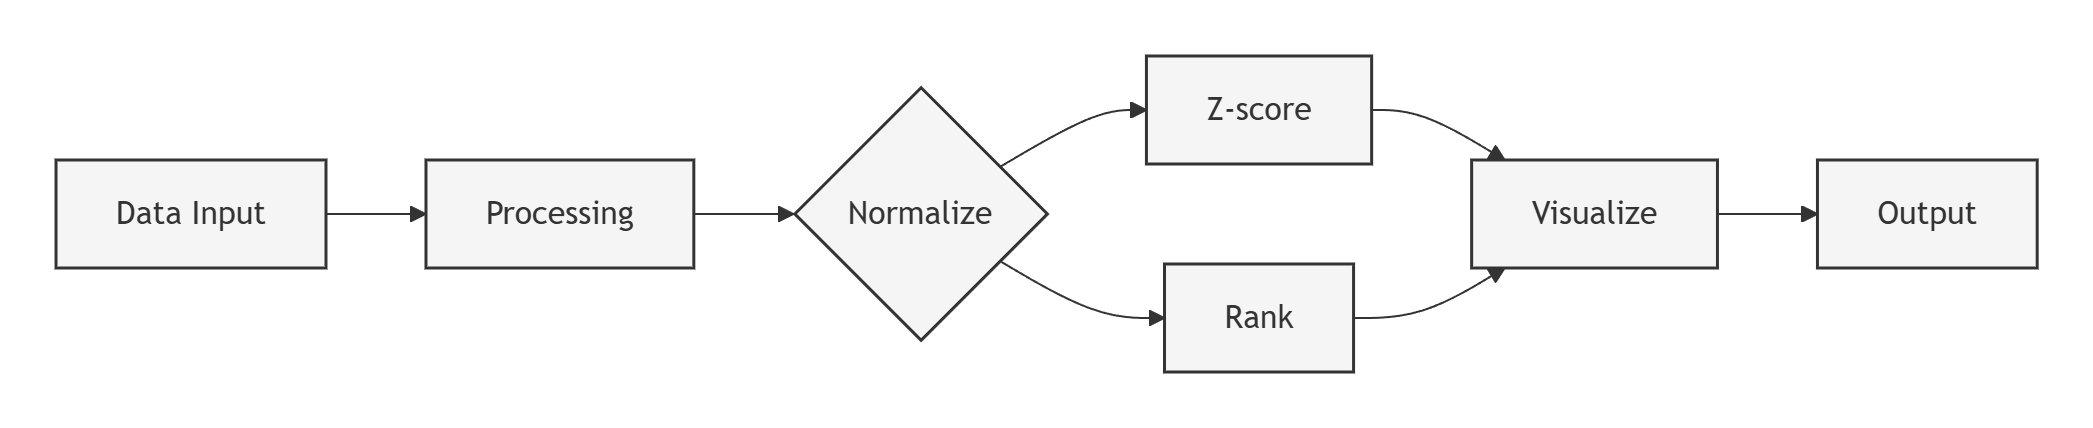


**Factor Library Leakage Check**

For any modeling exercise, it is standard practice to establish a simple baseline model to contextualize the incremental value of more complex approaches. As a baseline, we employ a single regularized decision tree, with maximum depth constrained to 12 and selected within the same hyperparameter search space used for all other models. This design serves two purposes:
(1) it provides a transparent and consistent reference for evaluating the incremental value of more complex models; and
(2) it functions as a diagnostic tool for detecting potential data leakage, as shallow trees are particularly sensitive to spurious temporal correlations that may persist despite careful preprocessing.

在任何建模研究中，构建一个简单的基准模型以衡量更复杂模型所带来的增量价值，通常被视为标准实践。本文选用单棵正则化决策树作为基准模型，其最大深度限制为 12，并与其他模型共享相同的超参数搜索空间。该设计具有双重目的：
（1）为评估更复杂模型的性能提升提供清晰且一致的参照基线；
（2）作为潜在数据泄露的诊断工具——由于浅层决策树对偶然的时间相关性高度敏感，即便在经过谨慎预处理后，仍能有效暴露残留的结构性问题。

**Baseline Diagnosis**

In [8]:
tuned_tree = CTA_Trees(ticker='ic_main', cls = treemodel_factors_augment)
tuned_tree.load(remove_columns = ['Phase_Sin', 'HT_DC_Period'], mask = False, light= False)
tuned_tree.prep()
tuned_tree.tune(ratio = 0.9, splitter = RollingEmbargoSplit(train_size= 2000, purge_gap = 5,  test_size= 60, step= 65), n = 1, param_grid = {'max_depth': [4, 6, 8, 10, 12], 'min_samples_leaf': [20, 30, 40, 50, 60, 100], 'min_samples_split' : [2,10, 50, 100]})
tuned_tree.model_logs 

run   cv_mean    cv_std                                        best_params  \
0    0 -0.015691  0.007531  {'max_depth': 4, 'min_samples_leaf': 100, 'min...   

         IC        DA      RMSE  DA_divergence  
0 -0.036284  0.465385  0.014285      -0.061741

The shallow decision tree baseline exhibits limited predictive effectiveness and noticeable sensitivity to the training window (cv_std ≈ 0.0075). On the test sample, the information coefficient is negative (IC ≈ −0.036), and directional accuracy falls below 50% (DA ≈ 0.465), indicating weak out-of-sample ranking ability and directional alignment.

From the rolling IC diagnostics, the median IC is mildly positive (roll_ic_median ≈ 0.028), but the distribution is widely dispersed, with the interquartile range spanning both negative and positive values (Q25 ≈ −0.037, Q75 ≈ 0.081). The fraction of positive rolling IC values is close to random (roll_ic_frac_pos ≈ 0.51), accompanied by relatively high rolling volatility (roll_ic_vol ≈ 0.10) and a pronounced drawdown (roll_ic_mdd ≈ −0.36).

The rolling IC series displays very strong first-order autocorrelation (roll_ic_acf1 ≈ 0.99), corresponding to an estimated half-life of approximately 53 observations. This persistence is consistent with the piecewise-constant nature of predictions generated by decision tree models.

Overall, the baseline produces intermittent and unstable predictive signals, lacking sustained temporal consistency, and thus serves as a reasonable lower-bound reference for subsequent, more advanced models.

浅层决策树基准模型在统计上表现出较为有限的预测有效性，并对训练窗口具有一定敏感性（cv_std ≈ 0.0075）。在测试样本上，其信息系数为负（IC ≈ −0.036），方向准确率低于 50%（DA ≈ 0.465），表明模型在样本外的排序能力与方向一致性整体偏弱。

从滚动 IC 指标来看，其中位数为小幅正值（roll_ic_median ≈ 0.028），但分布较为分散，四分位区间横跨正负区间（Q25 ≈ −0.037，Q75 ≈ 0.081）。正 IC 的出现比例接近随机水平（roll_ic_frac_pos ≈ 0.51），同时滚动波动率较高（roll_ic_vol ≈ 0.10），并伴随较深的回撤（roll_ic_mdd ≈ −0.36）。

滚动 IC 序列表现出极强的一阶自相关（roll_ic_acf1 ≈ 0.99），对应的半衰期约为 53 个观测，反映出 IC 在较长区间内维持相似水平的特征。这一现象与决策树预测结果呈分段常数（piecewise-constant）的结构特征一致。

整体而言，该基准模型的预测信号呈现出明显的间歇性与不稳定性，缺乏持续一致的时间表现，可作为后续模型评估中的参考下界。

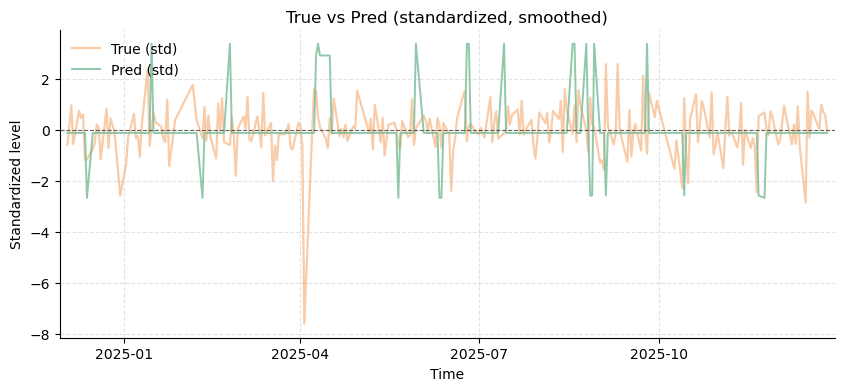

In [9]:
df = tuned_tree.diag(bins = 10)

In [10]:
pd.DataFrame([df['rolling_ic_summary']])

roll_ic_mean  roll_ic_median  roll_ic_q25  roll_ic_q75  roll_ic_frac_pos  \
0      0.004021        0.028361     -0.03717     0.080654           0.51341   

   roll_ic_vol  roll_ic_mdd  roll_ic_acf1  roll_ic_half_life  
0     0.099364    -0.361565       0.98702          53.054607

For the shallow decision tree baseline, the lag sweep analysis does not provide additional actionable information. The observed IC values across lags exhibit high variability and lack a coherent structure: isolated local peaks (e.g., at lag +2) are not supported by neighboring lags and do not persist across shifts. This behavior is characteristic of single-tree models, whose hard splits make them highly sensitive to minor time alignment changes.

Importantly, the absence of a systematic dominance at positive lags suggests that the model is unlikely to be affected by information leakage. Genuine leakage would typically manifest as consistently stronger correlations at one or more positive lags, rather than as a single, unstable spike. In this context, the lag sweep primarily reflects alignment noise and model fragility rather than forward-looking information content.

Given these properties, performing or over-interpreting lag sweep diagnostics for a shallow tree is of limited value. The model is better understood as a diagnostic lower bound, and the available evidence supports the conclusion that no material leakage is present under the current segment-safe and properly lagged construction.

对于浅层决策树基准模型而言，lag sweep 诊断并未提供额外有价值的信息。从结果来看，不同滞后下的 IC 表现高度波动，缺乏清晰、连续的结构特征；个别滞后位置（如 lag = +2）出现的局部峰值，既未在相邻滞后中得到支持，也未呈现稳定延续性。这一现象符合单棵决策树对时间对齐高度敏感、由硬阈值划分所带来的模型脆弱性特征。

更为重要的是，结果中并未观察到正滞后区间内系统性占优的情况，因此不存在明显的信息泄露迹象。若存在真实泄露，通常会表现为一个或多个正滞后位置持续占优，而非这种零散、不可复现的局部波动。在当前设定下，lag sweep 更多反映的是对齐噪声与模型不稳定性，而非前视信息。

基于上述原因，对浅层决策树而言，进一步依赖 lag sweep 进行解释或筛选并不必要。该模型应被视为诊断性下界，而现有证据表明，在已采用 segment-safe 构造与滞后处理的前提下，不存在显著的信息泄露风险。

In [11]:
df['lag_ic']

{-10: -0.027793675945387397,
 -9: -0.06604330120816927,
 -8: -0.09857068321687056,
 -7: 0.010925874862237,
 -6: -0.11639812838280576,
 -5: 0.050873245291724274,
 -4: -0.03470579866938369,
 -3: 0.03531625327676937,
 -2: 0.2795957503447849,
 -1: 0.06944662443942061,
 0: -0.03628351674006475,
 1: 0.03855135123624742,
 2: 0.10395890471645107,
 3: 0.04665232658510453,
 4: 0.05290161754872681,
 5: 0.01970848035407975,
 6: -0.04535315057055091,
 7: 0.04818162621122616,
 8: -0.09584485653138085,
 9: -0.0525166956661777,
 10: 0.00011596342903971974}

In [12]:
tuned_tree.artifacts['pred_avg_te'].unique()

array([-0.00044558, -0.00649252,  0.00786288,  0.00676736, -0.00627444])

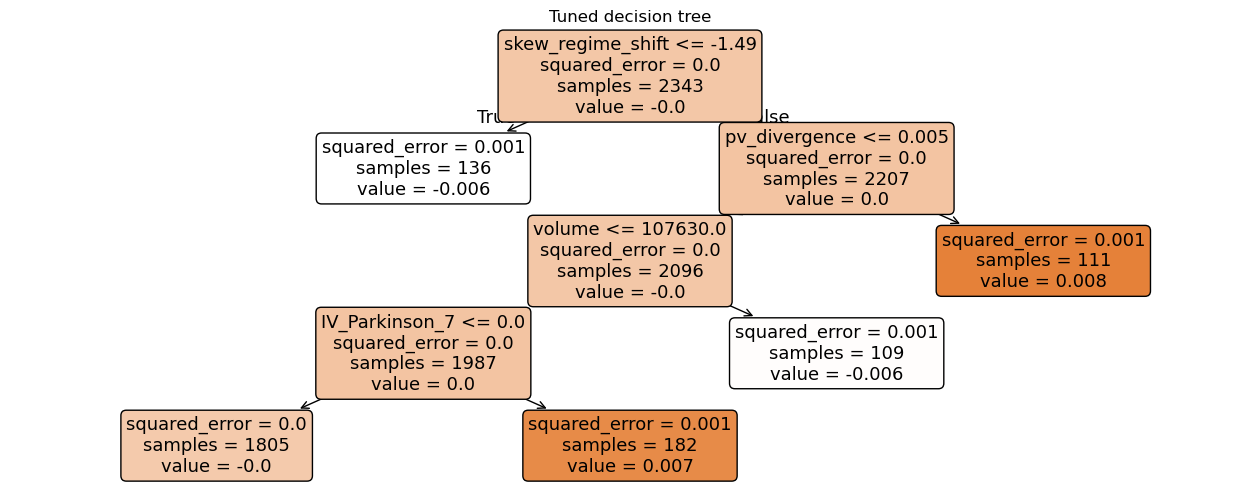

In [13]:
pipe = tuned_tree.artifacts['models'][0]
tree = pipe.named_steps['model']  
plt.figure(figsize=(16, 6))
plot_tree(
    tree,
    filled=True,
    rounded=True,
    feature_names=tuned_tree.X.columns
)
plt.title("Tuned decision tree")
plt.show()

From a prediction-behavior perspective, the shallow decision tree exhibits a strong directional bias and highly concentrated prediction patterns across quantile bins.

In most bins from Q1/10 to Q9/10, the model produces almost exclusively one-sided forecasts: pred_up = 0, pred_down = 26, indicating that the model consistently predicts only one direction;

Meanwhile, the ground-truth return directions remain relatively balanced within these bins.

Under this structure, the observed DA lift is driven primarily by whether the model’s single-sided prediction happens to align with the dominant realized direction, rather than by genuine directional discrimination. 

As a result: Some bins (e.g., Q1/10, Q7/10, Q8/10) show positive DA lift when the one-sided prediction coincides with realized outcomes;
Other bins (e.g., Q2/10, Q6/10, Q9/10) experience pronounced deterioration when this alignment fails.

The large dispersion of DA lift across bins therefore reflects prediction concentration rather than regime-specific predictive strength.

Such behavior is expected for a heavily regularized, shallow decision tree. Owing to its piecewise-constant structure and limited depth, the model tends to: Lock onto dominant coarse-grained states; Produce low-entropy, single-direction forecasts within local feature regions;

Rather than maintain balanced directional flexibility across regimes.

Accordingly, the observed one-sided prediction patterns and uneven DA lift should be interpreted as structural properties of the model, not as implementation artifacts. This further reinforces the role of the shallow tree as a baseline and diagnostic tool, useful for exposing directional biases in feature space, but unsuitable for direct deployment in stable directional trading strategies.

从预测行为分解的角度来看，单棵浅层决策树表现出显著的方向性偏置与预测集中化特征。在 Q1/10 至 Q9/10 的绝大多数分位区间内，模型几乎只给出单一方向的预测： pred_up = 0，pred_down = 26。 即模型在这些区间内完全不做多；

而真实收益方向（ground_truth_up / ground_truth_down）在各分位中仍然相对均衡。在这种结构下，各分位的 DA lift 主要由“是否恰好押中主导方向”所决定，而非模型对方向变化的真实刻画能力。

因此可以观察到： 在部分区间（如 Q1/10、Q7/10、Q8/10）中，单边预测恰好与真实方向占优一致，DA lift 出现正值；而在另一些区间（如 Q2/10、Q6/10、Q9/10）中，该单边预测与真实方向分布相悖，DA lift 出现明显负值。这种 DA lift 在分位之间的大幅波动，并不意味着模型在不同区间“时好时坏”，而是反映出其预测策略本身缺乏方向多样性与稳定性。

这一行为对于正则化较强、深度受限的单棵决策树而言是符合预期的结果。受限于分段常数（piecewise-constant）的模型结构，浅层树更倾向于：在特定特征区域内锁定单一主导状态； 输出高度集中、低熵的预测方向；而非在不同市场状态之间动态平衡多空判断。

因此，该模型在分位诊断中呈现出的单边预测与 DA lift 的不均衡分布，应被视为一种结构性特征，而非异常或实现问题。这也进一步说明：该浅层决策树更适合作为基准模型与诊断参照，用于揭示特征与状态分割的方向性倾向，而不适合作为直接用于稳定方向交易的决策模型。

In [14]:
pred_magnitude_diag(df['magnitude_table'])

bin  pred_up  pred_down  predict_correct_up  predict_correct_down  \
0   Q1/10        0         26                   0                    14   
1   Q2/10        0         26                   0                    10   
2   Q3/10        0         26                   0                    13   
3   Q4/10        0         26                   0                    12   
4   Q5/10        0         26                   0                    11   
5   Q6/10        0         26                   0                     9   
6   Q7/10        0         26                   0                    14   
7   Q8/10        0         26                   0                    15   
8   Q9/10        0         26                   0                     9   
9  Q10/10       17         10                  10                     4   

   ground_truth_up  ground_truth_down   da_lift  
0               12                 14  0.073077  
1               16                 10 -0.080769  
2               13                 13  0.034615  
3               14                 12 -0.003846  
4               15                 11 -0.042308  
5               17                  9 -0.119231  
6               12                 14  0.073077  
7               11                 15  0.111538  
8               16                  9 -0.105385  
9               16                 11  0.053134

**Objective Mismatch** 

As discussed earlier, a core challenge in applying machine-learning models to financial time-series lies in the mismatch between the optimization objective and actual trading behavior. Most standard models are trained to minimize point-forecast errors such as RMSE, thereby emphasizing conditional mean accuracy. In contrast, trading performance is more closely driven by directional consistency, regime identification, and structurally persistent signals, especially in noisy, heavy-tailed, and regime-dependent return series.

This mismatch is clearly illustrated by comparing the tuned decision tree with a simpler baseline configuration. Although the tuned model achieves a modest improvement in RMSE, this gain does not translate into better trading-relevant metrics. In fact, its information coefficient deteriorates (IC ≈ −0.036 vs. −0.020), directional accuracy declines (DA ≈ 0.47 vs. 0.52), and the directional generalization gap widens, suggesting increased sensitivity to noise or extreme samples rather than improved signal extraction.

From an optimization perspective, quadratic loss functions place disproportionate weight on large-magnitude return observations. As a result, models tend to reduce regression error by fitting a small number of extreme events, often at the cost of compressing predictive amplitudes and weakening the stability of directional signals. While statistically reasonable, this behavior is not well aligned with trading objectives, where moderate but persistent signals are often more valuable than precise point forecasts.

By contrast, the structurally simpler baseline tree, despite inferior RMSE performance, exhibits more stable directional behavior and better robustness in rank- and direction-based metrics. This suggests that under limited sample sizes and moderately correlated feature sets, increased model complexity may reduce economic relevance even as statistical fit improves.

As the feature space expands, this effect becomes more pronounced: models can increasingly reduce regression error through complex splits, while interpretability and trading relevance deteriorate. In principle, this mismatch could be addressed by designing loss functions more closely aligned with trading goals (e.g., directional or ranking-based objectives). However, such approaches involve additional assumptions and implementation complexity that fall outside the scope of the current research stage.

Accordingly, in this study we adopt a more pragmatic strategy: rather than redefining the loss function, we control model complexity, emphasize robust feature engineering, and evaluate models using multiple trading-relevant diagnostics. This approach provides a more reliable balance between statistical fit, interpretability, and practical applicability at the current stage.

如前所述，在金融时间序列中应用机器学习模型时，一个根本性问题在于模型所优化的损失函数与真实交易目标之间存在内在不匹配。多数常规模型以最小化点预测误差（如 RMSE）为目标，强调条件均值的拟合精度；而在实际交易中，表现往往更多依赖于方向一致性、状态识别及具有结构持续性的信号，尤其是在高噪声、厚尾且强状态依赖的收益序列中。

这一差异在调参后的决策树模型与结构更简单的基线模型对比中体现得尤为明显。尽管调参模型在 RMSE 指标上取得了一定改善，但该提升并未转化为更优的交易相关表现：其信息系数反而下降（IC ≈ −0.036，相比基线的 −0.020），方向准确率降低（DA ≈ 0.47 vs. 0.52），且方向性泛化差异扩大，表明模型更倾向于拟合噪声或极端样本，而非提取稳定信号。

从优化机制上看，RMSE 等二次型损失函数会对大幅波动样本赋予更高权重，使模型倾向于通过拟合少数极端观测来降低整体误差，从而压缩预测幅度并削弱方向信号的稳定性。该行为在统计意义上是合理的，但在交易语境下，往往不利于捕捉中等幅度但具有持续性的收益机会。

相比之下，结构更简单的基线决策树虽然在点预测精度上不占优势，但其方向行为更为稳定，在排序和方向相关指标上表现出更好的稳健性。这表明，在样本规模有限、特征相关性较高的条件下，模型复杂度的提升可能改善统计拟合，却削弱经济解释力与交易有效性。

随着特征数量进一步增加，这一问题往往会被放大：模型可以通过更复杂的分裂结构持续降低回归误差，但预测信号的可解释性与交易相关性却逐步下降。理论上，可通过设计更贴近交易目标的损失函数（如方向或排序约束）缓解该问题，但其实现复杂度与额外假设超出了当前研究阶段的实际范围。

因此，在现阶段工作中，我们选择通过控制模型结构复杂度、强化特征工程，并结合多维度、交易相关的评估指标，对标准损失函数与交易目标之间的偏差进行间接缓解。这一策略在当前条件下在统计表现、可解释性与实用性之间取得了更为稳健的平衡。

In [15]:
df_a = tree_sampler.model_logs.copy()
df_a["model_family"] = "tree_sampler"
df_b = tuned_tree.model_logs.copy()
df_b["model_family"] = "tuned_tree"
df_all = pd.concat([df_a, df_b], axis=0, ignore_index=True)
df_all 

run   cv_mean    cv_std                                        best_params  \
0    0 -0.015843  0.007269          {'max_depth': 6, 'min_samples_leaf': 100}   
1    0 -0.015691  0.007531  {'max_depth': 4, 'min_samples_leaf': 100, 'min...   

         IC        DA      RMSE  DA_divergence  model_family  
0 -0.020253  0.515385  0.014312      -0.036516  tree_sampler  
1 -0.036284  0.465385  0.014285      -0.061741    tuned_tree

**Subset of Features**

One potential avenue for improving tree-based models is to provide them with explicitly constructed, economically stable feature subsets—effectively encoding known economic relationships rather than relying on the model to infer them implicitly. Conceptually, this is analogous to supplying a spread feature (A − B) instead of feeding both A and B separately and expecting the tree to discover the relationship.

While such explicit constructions can improve learning efficiency and interpretability, they also introduce risks. These features rely heavily on domain assumptions that may not hold across regimes, and their effectiveness can degrade under structural shifts. As a result, models built on heavily pre-specified economic relationships may exhibit increased fragility and reduced adaptability when market conditions change.

一种可能的树模型改进方向，是向模型提供显式构造、具有经济稳定性的特征子集，即通过直接编码已知的经济关系，而非完全依赖模型从原始特征中自行推断。例如，相较于同时输入 A 与 B，让模型自行学习其差异结构，直接构造 A−B 形式的特征在概念上更为高效。

然而，该方法亦存在显著风险。这类显式特征高度依赖先验经济假设，其有效性往往具有明显的情境与周期依赖性。在市场结构或主导机制发生变化时，此类特征可能迅速失效，进而导致模型稳定性下降与适应能力减弱。

In [16]:
tuned_tree_trend = CTA_Trees(ticker='ic_main', cls = treemodel_factors_augment)
tuned_tree_trend.load(remove_columns = ['Phase_Sin', 'HT_DC_Period'], mask = False, light= False)
tuned_tree_trend.prep(feature_list = ['LinReg_Slope_5', 'trend_age_norm', 'LinReg_Residual_Z_10','Rolling_R2_5', 'returns_skew_5bar'])
tuned_tree_trend.tune(ratio = 0.9, splitter = RollingEmbargoSplit(train_size= 2000, purge_gap = 5,  test_size= 60, step= 65), n = 1, param_grid = {'max_depth': [4, 6, 8, 10, 12], 'min_samples_leaf': [20, 30, 40, 50, 60, 100], 'min_samples_split' : [2,10, 50, 100]})
tuned_tree_trend.model_logs 

run   cv_mean    cv_std                                        best_params  \
0    0 -0.015844  0.007198  {'max_depth': 8, 'min_samples_leaf': 30, 'min_...   

         IC        DA      RMSE  DA_divergence  
0  0.056044  0.492308  0.014259       -0.05703

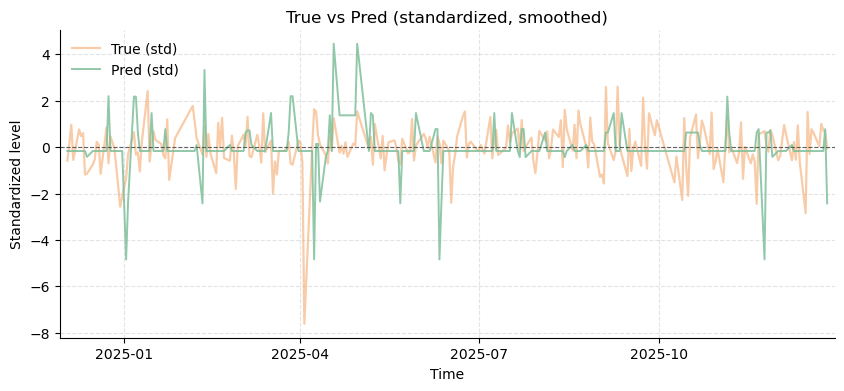

In [17]:
df = tuned_tree_trend.diag(bins = 10)

In this illustrative analysis, we restrict the factor set to a small group of structurally coherent trend- and regression-based features that exhibit relatively stable Spearman behavior (see the previous notebook), namelyLinReg_Slope_5, trend_age_norm, LinReg_Residual_Z_10, Rolling_R2_5, and returns_skew_5bar.These factors do not rely on short-horizon directional continuation assumptions; instead, they characterize medium-term trend structure, regression stability, and residual distributional properties.

Under this constrained and internally consistent setup, the tuned tree model achieves an information coefficient of IC ≈ 0.056, representing a material but measured improvement over the near-zero baseline obtained using the full factor set. Rolling diagnostics show that both the mean and median rolling IC shift upward to the 0.06–0.07 range, with the fraction of positive rolling IC exceeding 70%. At the same time, rolling volatility and maximum drawdown are reduced, indicating a signal that is more persistent rather than episodic. 

Importantly, directional accuracy remains close to random (DA ≈ 0.49), and the prediction series retains a characteristic piecewise-constant form. This suggests that the IC improvement is not driven by stronger directional bets or amplified forecast magnitudes, but rather reflects an enhancement in ranking capability within a cleaner and more coherent feature subspace.

在示例分析中，我们将因子集合收缩至一组结构清晰且在 Spearman 维度上表现相对稳定的趋势与回归类特征（详见前述 notebook），具体包括
LinReg_Slope_5、trend_age_norm、LinReg_Residual_Z_10、Rolling_R2_5 以及 returns_skew_5bar。这些因子不依赖短期方向延续假设，而主要刻画中等时间尺度下的趋势结构、拟合稳定性以及残差分布形态等统计特征。

在这一受限且结构一致的设定下，调参后的树模型信息系数提升至 IC ≈ 0.056，相较于完整因子集合下接近于零的基线表现，呈现出实质性但克制的改善。从滚动统计结果来看，rolling IC 的均值与中位数整体上移至 0.06–0.07 区间，正 IC 出现比例提升至 70% 以上；同时，滚动波动率与最大回撤均有所收敛，表明信号更偏向于持续性表现而非阶段性偶发。

需要注意的是，方向准确率仍接近随机水平（DA ≈ 0.49），且预测序列保持了典型的分段常数（piecewise-constant）形态。这表明 IC 的改善并非来源于方向性押注的强化或预测幅度的放大，而更可能反映出模型在结构更为干净的特征子空间中，其排序能力得到了提升。

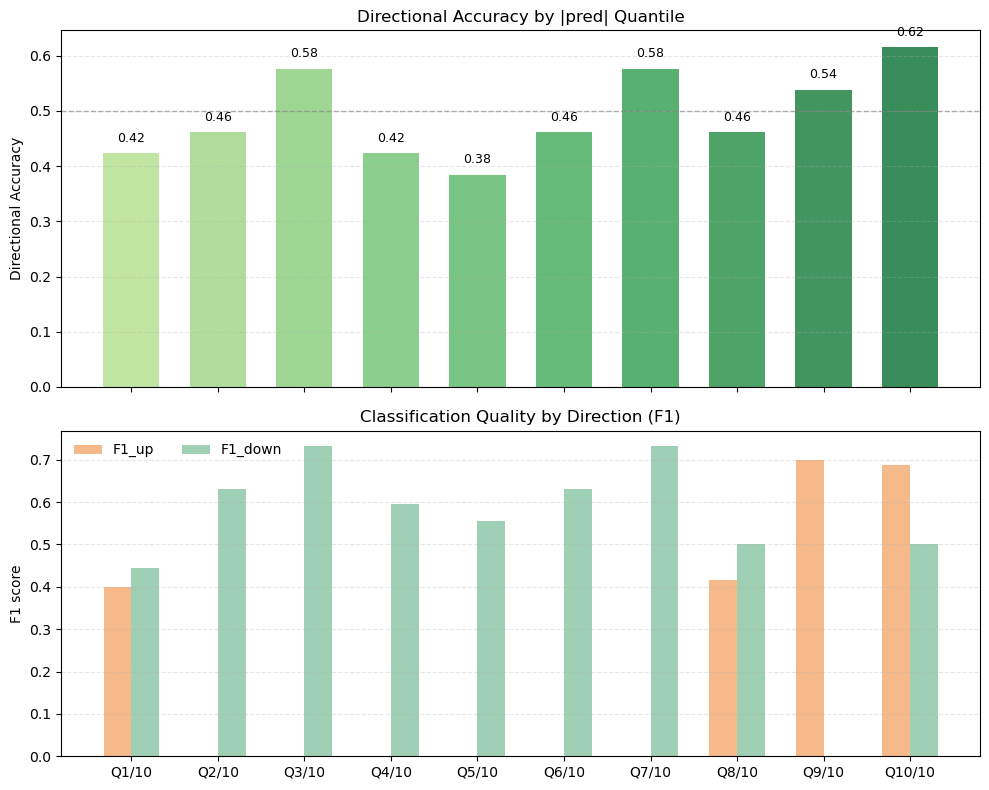

In [18]:
 plot_pred_magnitude_diag(df['magnitude_table'])

In [19]:
tuned_tree_trend.artifacts['pred_avg_te'].unique()

array([-9.19022699e-04, -1.81995575e-03,  7.50922293e-03, -1.75869070e-02,
       -8.73326228e-03,  7.44548355e-03,  1.92081447e-03,  4.92096946e-03,
        2.45285314e-03,  1.13843015e-05, -8.97237613e-03,  1.15480306e-02,
        2.24773256e-03,  1.77306992e-04, -8.69205428e-03,  4.56780560e-03,
        1.55765851e-02, -1.86370754e-03])

(<Figure size 1000x350 with 1 Axes>,
 <Axes: title={'center': 'Rolling Information Coefficient'}, ylabel='IC'>)

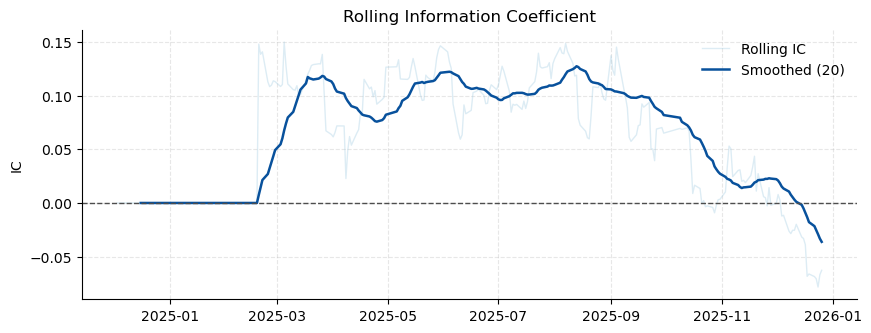

In [20]:
plot_rolling_ic(df['rolling_ic_series'])

In [21]:
pd.DataFrame([df['rolling_ic_summary']])

roll_ic_mean  roll_ic_median  roll_ic_q25  roll_ic_q75  roll_ic_frac_pos  \
0      0.061612        0.070194          0.0     0.110216          0.712644   

   roll_ic_vol  roll_ic_mdd  roll_ic_acf1  roll_ic_half_life  
0     0.057085    -0.227998      0.963221          18.497425

The lag-IC profile shows a balanced, oscillatory pattern around zero, with both positive and negative values appearing across negative and positive lags. This behavior is expected and healthy under segment-safe rolling constructions (e.g., window sizes 5–7), where overlapping windows naturally distribute information across nearby lags and induce local dependence.

Importantly, there is no systematic dominance of positive IC at strictly positive lags, nor a monotonic decay pattern that would indicate forward-looking contamination. The largest magnitudes appear at negative lags and around lag −2/0, which is consistent with averaging effects, window overlap, and small-sample variability rather than leakage. Overall, the lag structure is symmetric, bounded, and noisy in a statistically plausible way, and therefore does not raise concerns about negative-lag IC or time leakage.

从滞后 IC 分布来看，整体呈现出围绕零值上下震荡的对称形态，正负值在正、负滞后区间均有出现。这一特征在采用 segment-safe 的滚动窗口构造（如 5–7 窗口） 时是正常且健康的表现，反映了窗口重叠与局部统计依赖带来的自然扩散效应。

更关键的是，在严格的正滞后区间内，并未观察到持续占优的正 IC，也不存在单调衰减或“向未来偏移”的结构性模式。较大的 IC 幅度主要出现在负滞后或 0 附近，符合平滑、平均效应与小样本波动的统计特征。因此，该 lag-IC 结果在统计上是合理的，不构成负滞后 IC 异常或时间泄露的证据。

In [22]:
df['lag_ic_nonroll']

{-10: 0.1484284788585988,
 -9: 0.05080768189988084,
 -8: -0.0032101613663857386,
 -7: 0.02342087677957781,
 -6: -0.03967534147545053,
 -5: -0.10232968509099184,
 -4: -0.20383867030791755,
 -3: -0.14342795984526968,
 -2: 0.13646098050370709,
 -1: 0.04286919524487649,
 0: 0.05769271845284898,
 1: 0.016721402867056825,
 2: 0.04389728273148945,
 3: -0.007909191160917652,
 4: 0.03758672486481232,
 5: -0.05306454897691743,
 6: -0.0001989790763516953,
 7: -0.006437098904761921,
 8: 0.015965874340298617,
 9: -0.025172018346710765,
 10: -0.020160337611216772}

In [23]:
df['magnitude_table'].tail(1)

bin   n  n_eff  pred_up  pred_down  abs_pred_min  abs_pred_max  \
9  Q10/10  27     26       17         10      0.004921      0.017587   

         DA        IC  tp  tn  fp  fn   prec_up    rec_up   f1_up  prec_down  \
9  0.615385  0.162162  11   5   6   4  0.647059  0.733333  0.6875   0.555556   

   rec_down  f1_down  lift_vs_base  
9  0.454545      0.5      0.123077

The decile-level analysis clearly reveals the piecewise-constant nature of a single decision tree. Across the middle deciles (Q2–Q7), predictions collapse almost entirely to a single direction (with pred_up or pred_down near extremes), indicating that large regions of the feature space are mapped to the same predictive state. This behavior reflects a fundamental structural limitation of shallow decision trees and explains why they struggle to maintain balanced directional forecasts.

At the same time, two interpretable patterns emerge.

First, in the extreme decile—most notably Q10/10—the model no longer degenerates into one-sided predictions and exhibits a statistically meaningful positive DA lift (exceeding 12%). This suggests that the model’s outputs are not purely random, but retain predictive relevance when operating in high-confidence, strong-signal regions.

Second, the model does not distribute predictive power uniformly across the score spectrum. Instead, it behaves as a threshold-based responder: remaining largely inactive in ambiguous regions while activating directional signals only when price movements are sufficiently large or structural conditions are more clearly defined.

Taken together, these results reinforce a dual conclusion. On one hand, a single decision tree is structurally ill-suited as a stable trading model. On the other hand, its behavior is not mere noise-fitting—it appears capable of identifying coarse regime shifts or large-magnitude market moves. This makes it a useful diagnostic baseline and provides a natural motivation for ensemble approaches, where such discreteness and directional bias can be mitigated through aggregation.

从分位数分析结果可以清楚地看到，单棵决策树的分段常数（piecewise-constant）特性依然十分显著。在中间多个分位区间（Q2–Q7），模型的预测几乎完全偏向单一方向（pred_up 或 pred_down 接近极端），表明大块特征空间被映射到同一个预测状态。这一现象反映了浅层决策树在结构上的内在局限性，也是其在方向型预测任务中难以维持预测平衡的根本原因。

与此同时，结果中仍存在两个具有解释价值的现象。

首先，在极端分位区间（尤其是 Q10/10），模型不再退化为单边预测，并且出现了显著为正的方向准确率提升（DA lift 超过 12%）。这表明模型的输出并非随机噪声，而是在高置信度、强信号区域内仍能够维持一定程度的有效判断。

其次，从整体行为来看，该模型并未在全分位区间内均匀地产生预测能力，而更像是一种阈值型响应机制：在不确定或结构模糊的区域中基本保持“沉默”，而在价格波动较为剧烈或结构特征更为明确的情形下才触发方向判断。

综合来看，该结果一方面再次印证了单棵决策树并不适合作为稳定、可持续的交易模型；但另一方面也表明，其预测行为并非简单地拟合噪声，而是能够捕捉到粗粒度的市场状态变化或大幅行情信号。这使其更适合作为诊断性基准模型，并为后续通过集成方法对其离散性与偏置进行平滑提供了合理动机。

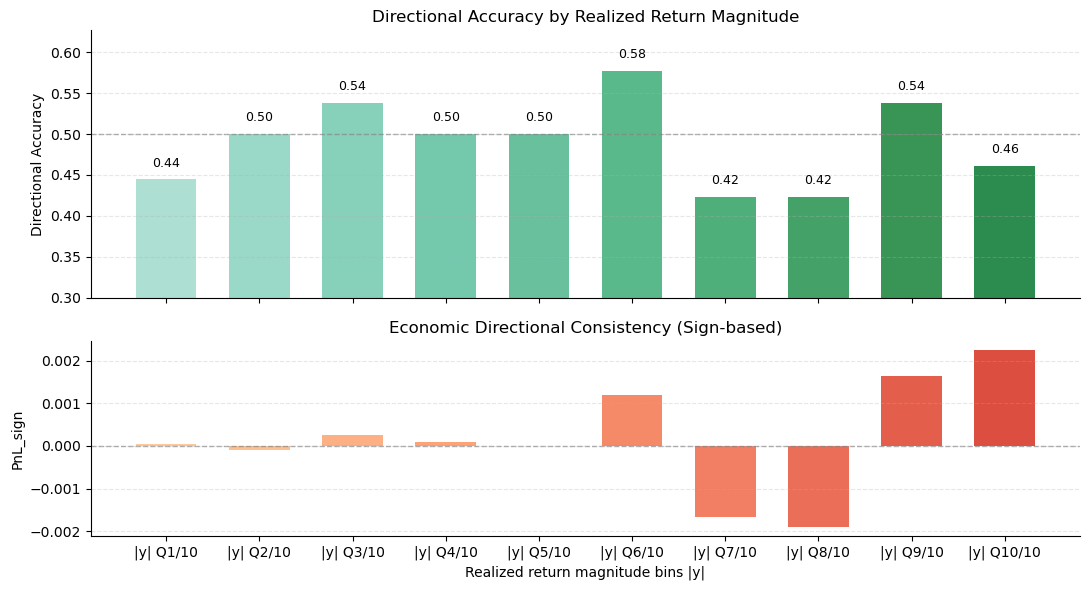

In [24]:
plot_true_magnitude_diag(df['true_mag_table'])

In [25]:
pred_magnitude_diag(df['magnitude_table'])

bin  pred_up  pred_down  predict_correct_up  predict_correct_down  \
0   Q1/10        9         17                   5                     6   
1   Q2/10        0         26                   0                    12   
2   Q3/10        0         26                   0                    15   
3   Q4/10        0         26                   0                    11   
4   Q5/10        0         26                   0                    10   
5   Q6/10        0         26                   0                    12   
6   Q7/10        0         26                   0                    15   
7   Q8/10        8         18                   5                     7   
8   Q9/10       26          0                  14                     0   
9  Q10/10       17         10                  11                     5   

   ground_truth_up  ground_truth_down   da_lift  
0               16                 10 -0.069231  
1               14                 12 -0.030769  
2               11                 15  0.084615  
3               15                 11 -0.069231  
4               16                 10 -0.107692  
5               14                 12 -0.030769  
6               11                 15  0.084615  
7               16                 10 -0.030769  
8               14                 12  0.046154  
9               15                 11  0.123077

**Stability**

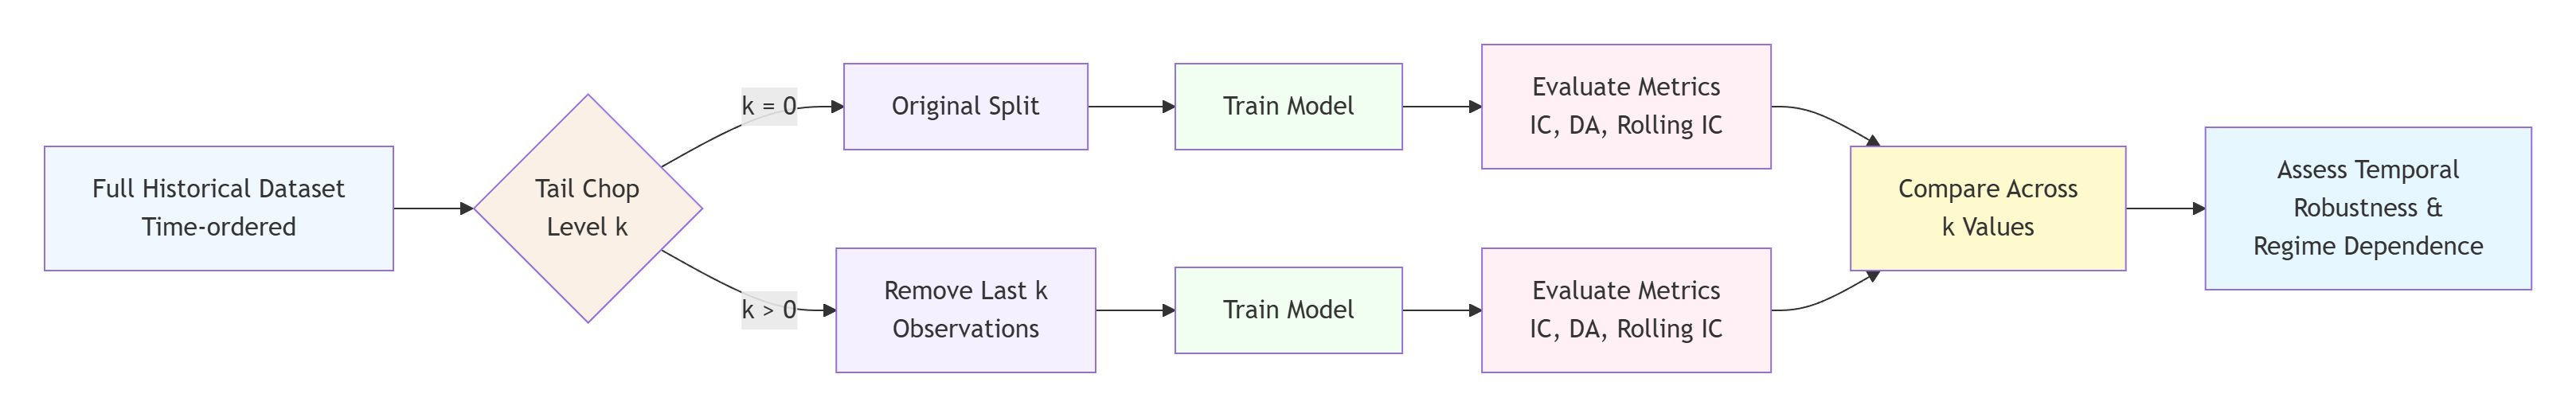

The tail-chop experiment intentionally modifies the composition of the sample tail within a walk-forward, embargo-aware rolling validation framework to assess the sensitivity of model performance to validation window selection. The results indicate that as the degree of truncation varies, point estimates such as test IC and directional accuracy exhibit noticeable fluctuations, while rolling IC statistics—including the mean, volatility, and half-life—remain relatively stable. This suggests that the overall statistical characteristics of the signal do not undergo a material shift; instead, differences in point estimates are more likely driven by changes in the proportion of market regimes covered by the validation period, variations in effective sample size, and the resulting differences in statistical noise.

Against this backdrop, overly frequent or aggressive refitting should be approached with caution. Models such as decision trees and boosted trees are relatively sensitive to boundary effects and distributional perturbations, and even modest changes in the training window can lead to substantial adjustments in split rules and feature interaction structures, thereby introducing unnecessary model drift. Such drift does not necessarily correspond to changes in genuinely tradable signals and, in practice, does not always translate into improved out-of-sample performance.

tail-chop 实验在 walk-forward 且带有 embargo 的滚动验证框架下有意改变样本末端构成，用于检验模型表现对验证窗口选取的敏感性。结果显示，随着截断程度变化，测试期 IC 与方向准确率等点估计存在一定波动，而滚动 IC 的均值、波动率及半衰期等统计量整体保持相对稳定。这提示信号的总体统计特征并未出现显著漂移；点估计差异更可能来自验证期所覆盖的市场状态（regime）占比变化、样本量变化及由此带来的统计噪声差异。

在此背景下，对模型进行过于频繁或激进的重新拟合需要谨慎。以决策树/提升树为代表的模型对样本边界与分布扰动相对敏感，训练窗口的轻微变化可能导致分裂规则与特征交互结构发生较大调整，从而引入不必要的模型漂移。这种漂移未必对应真实可交易信号的变化，实践中也不一定改善样本外表现。

In [26]:
tuned_tree_trend.chop_stability(splitter = RollingEmbargoSplit(train_size= 2000, purge_gap = 5,  test_size= 60, step= 65), n = 2, param_grid = {'max_depth': [4, 6, 8, 10, 12], 'min_samples_leaf': [20, 30, 40, 50, 60, 100], 'min_samples_split' : [2,10, 50, 100]})

tail_chop   IC_test   DA_test  DA_divergence  cv_mean_cv  ic_test_cv  \
0          0  0.056044  0.492308      -0.057030         0.0         0.0   
1          5 -0.061138  0.464844      -0.089523         0.0         0.0   
2         10  0.082787  0.498008      -0.039959         0.0         0.0   
3         20  0.081863  0.518672      -0.022905         0.0         0.0   

   roll_ic_mean  roll_ic_vol  roll_ic_half_life    h_ic_1    h_ic_5   h_ic_10  
0      0.061612     0.057085          18.497425  0.015094 -0.010333 -0.027209  
1     -0.020487     0.057149          24.397644 -0.020145  0.069902  0.001295  
2      0.090924     0.056232          14.250607  0.048093 -0.009032  0.024721  
3      0.081633     0.066899          23.012298  0.091784  0.009467 -0.080156

#### **Heterogeneous Bagging Ensemble** 

The earlier subset-based analysis also highlights an important limitation: factor selection conducted in isolation can be inherently subjective and, if not carefully controlled, may introduce selection bias or overfitting. Improvements observed on a small, hand-picked subset do not necessarily generalize beyond the specific sample or regime under which the selection was made.

Moreover, a single decision tree—especially under strong regularization constraints such as limited depth and large minimum leaf size—exhibits high structural bias and limited representational capacity. While such a model is useful for diagnostics and interpretability, it is generally not optimal for extracting stable predictive signals from noisy financial time series.

For these reasons, ensemble methods (e.g., bagging and boosting) are more widely adopted in practice. By aggregating multiple weak and biased learners, ensembles reduce variance, mitigate sensitivity to individual splits or feature choices, and provide a more robust approximation to the underlying data-generating process. This makes them better suited for settings with heterogeneous regimes and weak, distributed signal structures, as is typical in financial markets.

早期基于子集的分析也揭示了一个重要局限：在缺乏系统约束的情况下，因子子集的人工筛选本身具有一定的主观性，且容易引入选择偏差或过拟合风险。在特定样本或市场状态下观察到的改善，并不必然意味着其具备跨区间、跨状态的泛化能力。

此外，在强正则化设定下（如限制树深、较大的最小叶子样本数），单棵决策树往往呈现出结构性偏差较高、表达能力受限的特征。此类模型更适合作为诊断工具或下界基准，而非用于稳定地提取金融时间序列中的弱预测信号。

基于上述原因，集成方法（如 Bagging、Boosting）在实践中更为常用。通过组合多个偏差较高但结构互补的弱学习器，集成模型能够有效降低方差、缓解对单一划分或因子选择的敏感性，并在多状态、弱信号环境下提供更稳健的建模表现。

Random Forest represents a canonical implementation of the bagging paradigm. However, financial time series typically exhibit strong autocorrelation and persistent regime structure, implying that observations are not exchangeable in time, even within relatively short local windows. Under this setting, bootstrap-based resampling with replacement—by repeatedly sampling individual observations—tends to disrupt the underlying temporal dependence, thereby weakening the model’s ability to represent genuine market states.

It is important to emphasize that this issue persists even when time-series-aware evaluation schemes such as walk-forward or expanding-window cross-validation are employed. While these procedures mitigate information leakage at the evaluation stage, they do not alter the implicit exchangeability assumption embedded in bootstrap sampling during model training.

In principle, block bootstrap offers a potential correction by resampling contiguous time blocks rather than individual observations. However, its practical applicability to financial time series is limited. The method is highly sensitive to block-length selection and implicitly assumes approximate stationarity within each block. In markets characterized by frequent regime shifts, liquidity migration, and contract rollovers, this assumption is often violated, particularly under finite-sample constraints.

For these reasons, this study does not adopt traditional bootstrap-based bagging. Instead, we adopt a heterogeneous ensemble perspective, introducing model diversity through differences in feature subspaces, structural regularization, and explicit time-aware segmentation. This approach preserves temporal coherence while achieving robust ensemble behavior without relying on resampling-based assumptions that are poorly aligned with financial time-series dynamics.

随机森林（Random Forest）是 Bagging 思想的经典实现形式。然而，金融时间序列通常具有显著的自相关性与状态持续性，观测样本在时间维度上并非可相互替换（non-exchangeable），即使在相对较短的局部窗口内亦然。在这一背景下，基于 bootstrap 的有放回抽样由于对单点观测进行重采样，容易破坏时间依赖结构，从而削弱模型对真实市场状态的刻画能力。

需要强调的是，即便在评估阶段采用了时间序列友好的 walk-forward 或 expanding-window 交叉验证，这一问题仍然存在，因为上述方法主要缓解的是评估阶段的信息泄露，而并未改变训练阶段 bootstrap 抽样所隐含的“样本可替换”假设。

理论上，block bootstrap 为处理时间依赖提供了一种可能的修正方案，但其在金融时间序列中的实用性受到显著限制。该方法对区块长度高度敏感，并隐含区块内近似平稳的假设；而在存在频繁状态切换、流动性迁移及合约换月的市场环境下，这一假设在有限样本条件下往往难以成立。

基于上述考虑，本文未采用传统 bootstrap 型 Bagging，而是从**heterogeneous ensemble**视角出发，通过特征子空间差异、结构性正则化以及显式时间分段引入模型多样性，在保持时间一致性的同时实现稳健集成。

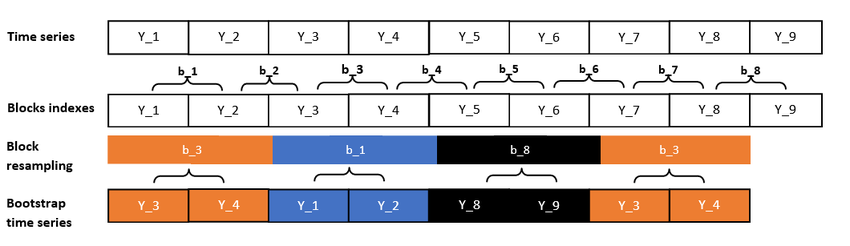

In [27]:
# heterogeneous ensemble

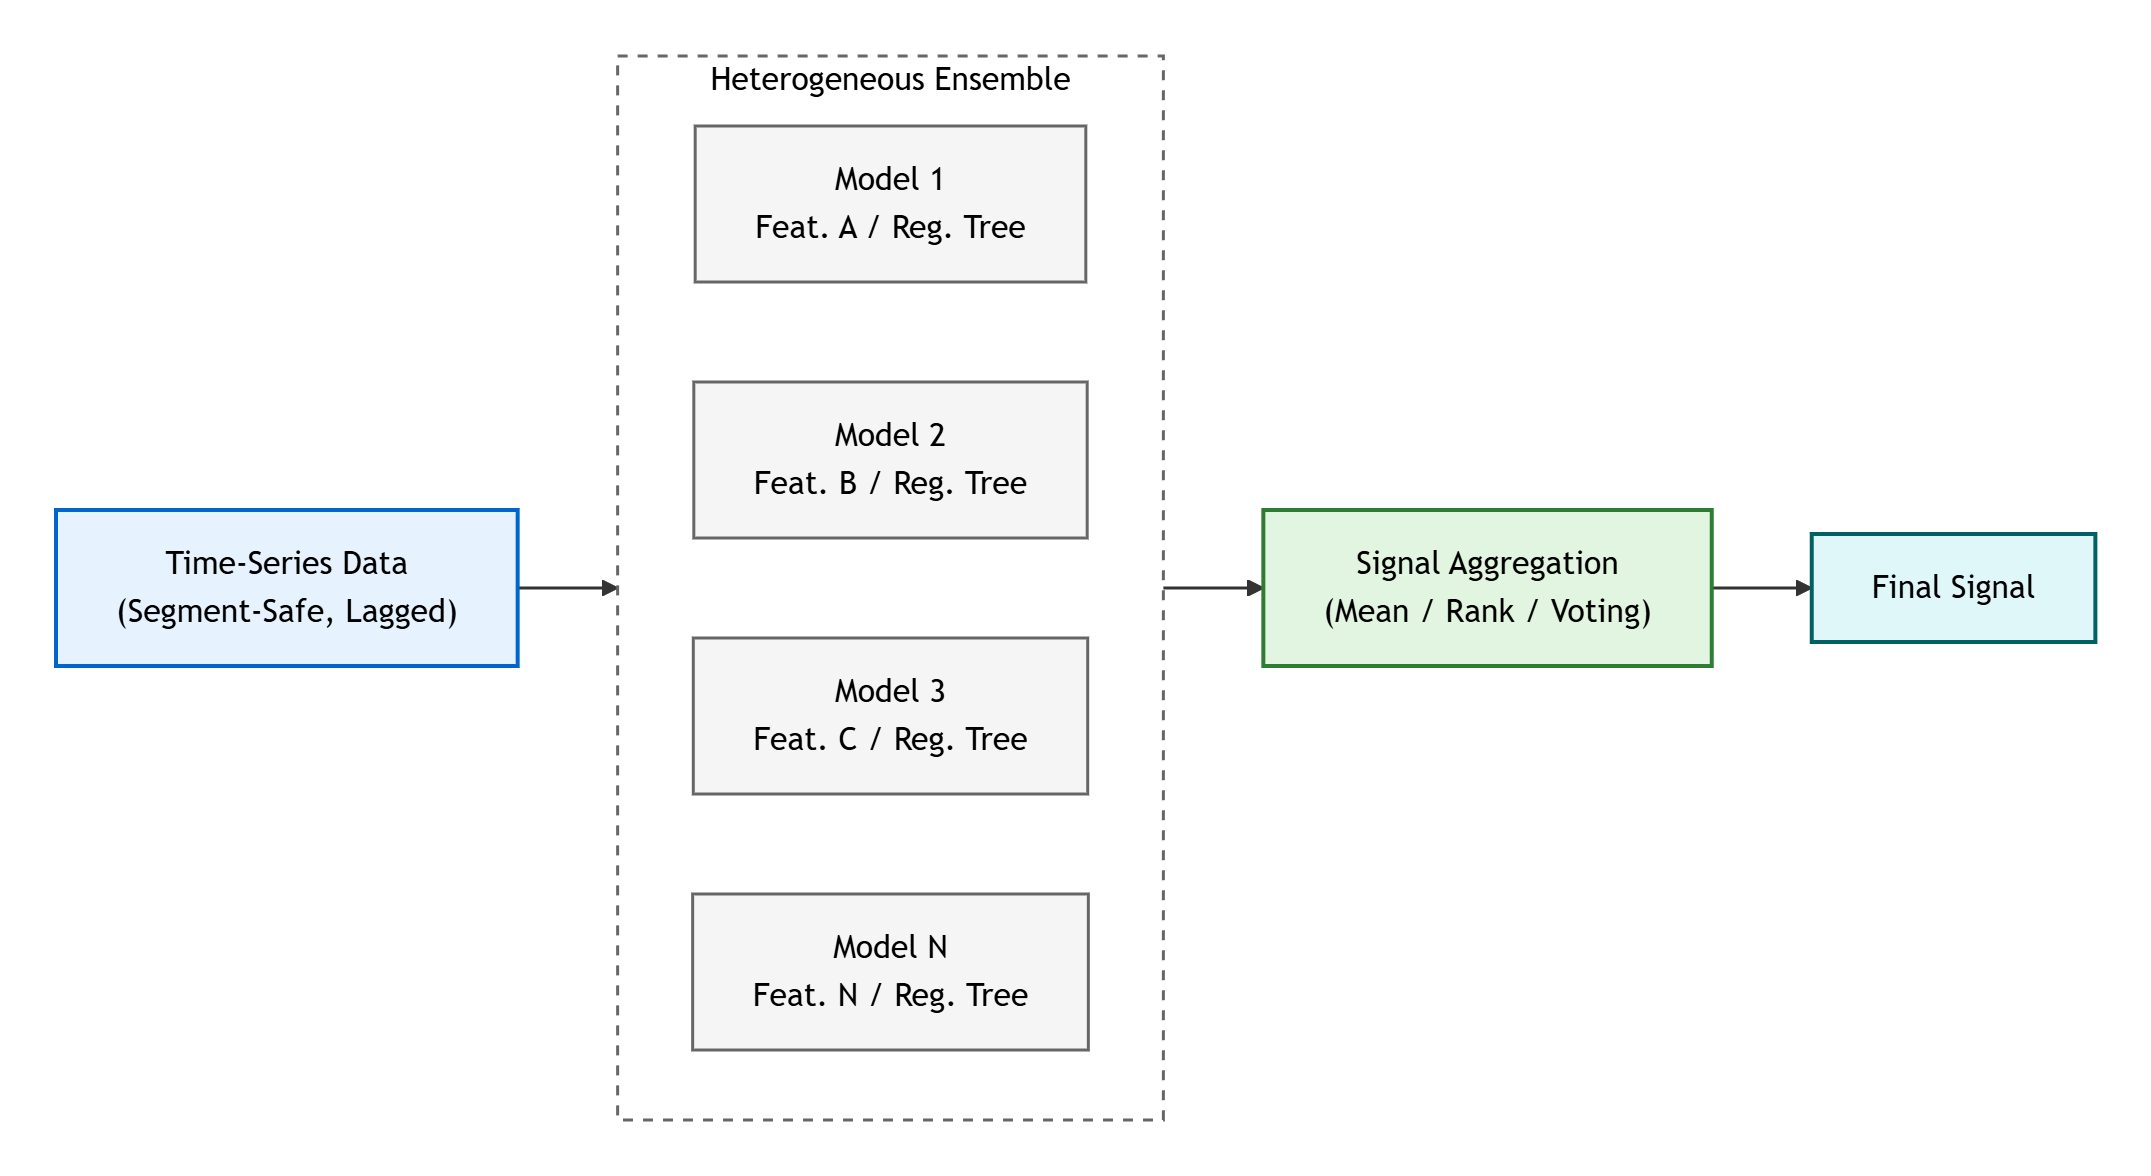

**Experimental setup**

In the early stage of the experiments, we adopt a classical random-feature configuration (max_features = sqrt, n_estimators = 200) to introduce a relatively high degree of feature-level randomness, ensuring sufficient structural diversity and baseline robustness of the ensemble. This setting is intentionally chosen as a diagnostic baseline, rather than a fully optimized large-scale ensemble.

At this stage, the number of trees is kept at a moderate level to facilitate controlled analysis of model behavior—particularly the interaction between feature subsampling, prediction stability, and generalization patterns. While increasing n_estimators can further reduce variance in principle, such scaling primarily affects second-order stability and does not materially change the qualitative behavior under investigation here.

Accordingly, we defer systematic exploration of larger ensembles to a later stage of the research. Once the feature space, sampling strategy, and ensemble structure are better understood, the number of estimators can be safely increased to enhance stability without confounding structural diagnostics.

Building on this setup, we gradually increase the value of max_features to examine how model behavior evolves in terms of feature utilization, prediction amplitude, and out-of-sample robustness.

As max_features increases, the number of candidate features available at each split grows, reducing randomness in tree construction. Individual trees therefore become more structurally similar, and overall ensemble diversity declines. In this regime, models tend to repeatedly rely on a small subset of strong features, which may improve short-horizon fit but often comes at the cost of weaker robustness across market regimes.

Consequently, max_features is treated not merely as a tuning parameter, but as a structural control variable governing the trade-off between feature subspace diversity and information utilization efficiency. By systematically adjusting this parameter, we aim to identify a balanced regime that preserves ensemble heterogeneity while effectively leveraging informative signals.

在实验初期，我们采用经典的随机特征采样设定（max_features = sqrt，n_estimators = 200），以较高的特征随机性作为主要来源，确保集成模型在结构层面具备基础多样性与稳健性。需要强调的是，该设定主要用于阶段性的结构诊断与行为分析，而非作为最终的大规模集成配置。

在当前阶段，我们将树的数量控制在相对适中的水平，以便更清晰地观察特征子空间采样、预测稳定性与泛化行为之间的关系。理论上，继续增加 n_estimators 可以进一步降低方差，但这一过程主要影响模型稳定性的边际改善，并不会显著改变本文所关注的结构性行为特征。

对更大规模集成（更高 n_estimators）的系统性探索被有意留待后续阶段展开。在完成特征空间、采样机制与集成结构的分析之后，再提升树的数量，将有助于在不干扰结构判断的前提下进一步增强模型稳定性。

在此基础上，我们逐步提高 max_features 的取值，以系统性考察模型在特征利用率、预测幅度以及样本外稳健性方面的变化。

随着 max_features 的增大，每次节点划分时可供选择的特征数量增加，随机性随之下降，不同基学习器之间的结构趋于相似，模型整体多样性逐步减弱。在该情形下，模型更容易反复依赖少数信息强度较高的特征，短期拟合表现可能提升，但跨时间与跨状态的稳健性往往随之下降。

因此，在本研究中，max_features 被视为控制特征子空间多样性与信息利用效率之间权衡的关键结构性参数，而非单纯的调参选项。通过对该参数的系统调节，我们旨在识别一个兼顾随机性与信息吸收能力的平衡区间，为后续更大规模集成提供可靠基础。

**Naive Backtest Disclaimer**

In [28]:
from cta_confidence import CTAStrategyEngine, StrategyConfig

To provide a transparent illustration of the directional information content of the model signal, we conduct a demonstration-only minimal backtest.

Under this setup, the sign of the model prediction is used to determine the next-period position: positive signals correspond to a long position (+1), while negative signals correspond to a short position (−1). Returns are computed on a close-to-close basis, and a 0.05% one-way transaction cost is applied whenever the position changes. No position sizing, leverage, risk management, slippage, market impact, or short-selling constraints are incorporated.

As such, this experiment serves solely as a coarse diagnostic check of the model’s directional signal quality. It does not represent a deployable trading strategy and should not be interpreted as investment advice.

For reference, a buy-and-hold return series over the same period is also reported. However, this comparison is illustrative rather than a strict performance benchmark.

A more realistic assessment would require an event-driven backtesting framework that explicitly models order execution and market frictions, which is beyond the scope of the present analysis.

为直观展示模型信号在方向层面所包含的信息量，我们进行了一次演示性质的极简回测。

回测规则如下：模型预测值仅用于生成下一期的方向信号，预测为正时持有多头仓位（+1），预测为负时持有空头仓位（−1）；每期收益按照 close-to-close 口径计算，并在仓位发生变化时按 0.05% 的单边费率计入交易成本。整个实验过程中未引入仓位管理、杠杆、风险控制、滑点与冲击成本，也未考虑卖空约束或融券成本等现实交易因素。

因此，该回测结果仅用于对模型方向性信息含量进行粗粒度检验，不构成可交易策略，也不应被视为任何形式的投资建议。

作为参考，我们同时给出了同一时期的买入并持有（buy-and-hold）收益表现。但需要强调的是，该对比仅具启发意义，并不代表严格意义上的策略优劣比较。

更贴近实盘的评估应基于事件驱动（event-driven）的回测框架，以刻画真实的撮合机制与执行约束，相关分析不在本文讨论范围之内。

**Peeking & Model Selection Disclaimer**

It should be further clarified that the diagnostic analyses and naive backtests presented in this study do not constitute a final test set in the strict statistical sense, but are used solely as part of a model selection and robustness screening stage (selection / pre-live gate). The exclusive purpose of this stage is to identify model configurations that exhibit clear instability, lack of reproducibility, or insufficient economic interpretability under a time-series walk-forward framework, and to enforce a pre-deployment no-go gate. Results at this stage are not used for iterative optimization or performance maximization (argmax) across candidate models.

Under the present setting, the only meaningful final evaluation is expected to be conducted via forward testing (paper trading / forward simulation). Given a total sample size of approximately 2,600 observations, allocating an additional fully untouched test segment is not always feasible in practice; moreover, under heterogeneous bagging or boosting frameworks, even refitting models with frozen hyperparameters will generally alter the learned decision rules. Accordingly, this study does not treat any single static test window as an unbiased final performance confirmation, nor does it claim such status.

With respect to parameter selection, all tree-structure–related hyperparameters (including but not limited to max_depth, min_samples_leaf, and min_samples_split) are strictly restricted to parameter grids defined ex ante prior to experimentation, and are selected only within training windows using time-series-aware validation procedures (walk-forward, purge, and embargo). At no point are these structural parameters reselected, fine-tuned, or retrospectively optimized based on performance observed in hold-out or selection windows.

Operationally, within each walk-forward step, structural hyperparameter selection and model fitting are performed exclusively on the contemporaneous training window; the resulting model is then fully frozen and applied to the corresponding out-of-sample window, with no structural re-optimization or rule adjustment performed in that window.

Beyond structural parameters, the only dimensions permitted to vary during the research process are confined to a predefined, auditable set of hypothesis-level configurations, intended to assess variance and robustness rather than to exploit out-of-sample performance. These include, but are not limited to: feature construction variants; treatment of roll-over observations (retained vs. excluded); feature subsampling ratios (max_features ∈ {…}, candidate set fixed prior to experimentation); and the number of base learners in ensemble models (n_estimators ∈ {…}, candidate set fixed prior to experimentation). All such variations are treated as hypothesis-level comparisons rather than performance-driven tuning.

Any model configuration that demonstrates clear generalization failure, structural instability, or questionable economic interpretation at the selection stage is immediately discarded and excluded from subsequent ensemble construction.

需要进一步澄清的是，本研究中所展示的诊断分析（diagnosis）与 naive backtest 并不构成最终意义上的 test set，而仅作为模型选择与稳健性筛选阶段（selection / pre-live gate）的一部分使用。该阶段的唯一目的在于识别在时间序列 walk-forward 框架下表现出明显不稳定、不可复现或缺乏经济含义的模型方案，并据此设定上线前的否决门槛（no-go gate）；不以该阶段结果对候选方案进行逐次优化或追求性能最大化（argmax）。

在本研究设置下，真正意义上的最终检验应通过前向模拟（paper trading / forward test） 完成。在样本量约为 2600 条的前提下，额外再划分一段完全不触碰的数据在实践中并不总是可行；且在 heterogeneous bagging / boosting 框架下，即便仅在参数冻结的情况下重新拟合模型，学习到的决策规则本身亦会发生变化。

因此，本文不将单一静态 test window 视为最终性能确认手段，亦不宣称其具备无偏的最终检验属性。

关于模型参数选择，所有与树结构相关的超参数（包括但不限于 max_depth、min_samples_leaf、min_samples_split 等）均限定在实验开始前预先给定的参数网格内，并且仅使用训练窗口内部的时间序列感知验证方式（walk-forward / purge / embargo）进行选择。在任何 hold-out 或 selection 阶段，均未基于样本外表现对上述结构性参数进行重新挑选、微调或回溯性优化。

在操作层面上，在每一个 walk-forward step 内，模型仅使用当期训练窗口数据完成结构性超参数选择与拟合；随后模型被完全冻结并应用于对应的样本外窗口，在该窗口内不进行任何结构性参数重选或规则调整。

在此基础上，研究过程中唯一允许变化的维度被严格限定为一组事先定义、可审计的候选假设集合，用于检验模型在不同建模假设下的方差与稳健性表现，而非基于样本外结果的逐次调参。具体包括但不限于：

因子计算与构造方式（feature construction variants）；

换月（roll-over）样本的处理策略（保留 / 剔除）；

特征子采样比例（max_features ∈ {…}，候选集合在实验开始前固定）；

集成模型中基学习器数量（n_estimators ∈ {…}，候选集合在实验开始前固定）。

上述变动均被视为模型假设层面的比较与稳健性分析，而非在 selection 集或样本外窗口上进行的性能导向型调参。

任何在 selection 阶段表现出明显泛化失败、结构不稳定或经济解释存疑的模型方案，均被直接剔除，不进入后续集成。

**CSI500 Bag Unmasked**

In [29]:
start = time.time()
tr_regress_sampler  = CTA_Trees(ticker='ic_main', cls = treemodel_factors_augment)
tr_regress_sampler.load(remove_columns = ['Phase_Sin', 'HT_DC_Period'], light = False, mask = False)
tr_regress_sampler.prep()
tr_regress_sampler.tune(ratio = 0.9, splitter = RollingEmbargoSplit(train_size= 2000, purge_gap = 5,  test_size= 60, step= 65), n = 200, param_grid = {'max_depth': [4, 6, 8, 10, 12], 'min_samples_leaf': [20, 30, 40, 50, 60, 100], 'min_samples_split' : [2,10, 50, 100], 'max_features': ['sqrt']})
end = time.time()
print(f"Total runtime: {(end - start)/60:.2f} minutes")

Total runtime: 2.94 minutes


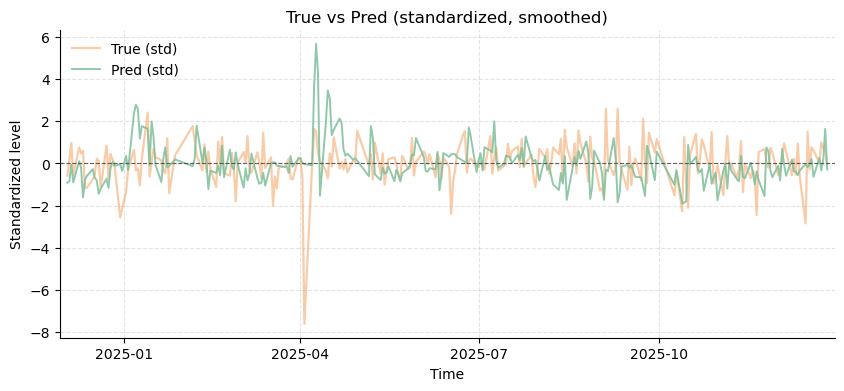

In [30]:
df = tr_regress_sampler.diag(bins = 10)

In [31]:
# Demonstration of Model Diversity 
tr_regress_sampler.model_logs.sort_values('IC', ascending = False).sample(10)

run   cv_mean    cv_std  \
28   73 -0.015548  0.007289   
18   32 -0.015631  0.007236   
29   78 -0.015627  0.007398   
31   91 -0.015648  0.007142   
7     7 -0.015730  0.007224   
24   56 -0.015574  0.007025   
8     8 -0.015612  0.007603   
21   41 -0.015829  0.007313   
26   67 -0.015772  0.007062   
16   27 -0.015715  0.006800   

                                          best_params        IC        DA  \
28  {'max_depth': 4, 'max_features': 'sqrt', 'min_... -0.026076  0.461538   
18  {'max_depth': 6, 'max_features': 'sqrt', 'min_... -0.059162  0.476923   
29  {'max_depth': 10, 'max_features': 'sqrt', 'min...  0.017955  0.496154   
31  {'max_depth': 6, 'max_features': 'sqrt', 'min_... -0.006919  0.515385   
7   {'max_depth': 4, 'max_features': 'sqrt', 'min_... -0.063736  0.542308   
24  {'max_depth': 8, 'max_features': 'sqrt', 'min_... -0.029685  0.434615   
8   {'max_depth': 4, 'max_features': 'sqrt', 'min_...  0.116964  0.534615   
21  {'max_depth': 4, 'max_features': 'sqrt', 'min_...  0.027789  0.453846   
26  {'max_depth': 6, 'max_features': 'sqrt', 'min_... -0.031630  0.507692   
16  {'max_depth': 10, 'max_features': 'sqrt', 'min...  0.069850  0.519231   

        RMSE  DA_divergence  
28  0.014927      -0.067723  
18  0.014348      -0.051056  
29  0.014744      -0.087785  
31  0.014299      -0.023701  
7   0.014023       0.017746  
24  0.014729      -0.095927  
8   0.014128       0.001510  
21  0.014050      -0.054484  
26  0.014431      -0.035238  
16  0.014573      -0.069834

**Diversity**

In [32]:
from diagnosis import feature_importance_diversity, diagnose_aligned_ecdf

Model diversity is a prerequisite for bagging-based ensemble methods to be effective. When a small number of dominant features repeatedly drive the majority of base learners, prediction errors become highly correlated, and the nominal decorrelation mechanism fails to translate into meaningful variance reduction.

Motivated by this consideration, we first impose a structural uniqueness constraint on the base learners by removing decision trees with identical parameter configurations. Such models provide no incremental information and may instead amplify noise through repeated voting, thereby degrading ensemble performance.

Building on this step, we further introduce a feature-importance–based filtering criterion as a proxy for behavioral diversity among models. Unlike selection schemes based solely on aggregate performance metrics, this approach focuses on whether different models rely on substantively distinct feature subsets. This ensures that the retained models capture heterogeneous views of the data-generating process, rather than minor perturbations around a single dominant signal.

It is worth noting that some prior studies (e.g., related work by Stefan) retain only models with positive information coefficients when constructing ensembles. We argue that model selection performed on the test side is methodologically inappropriate in the present context and introduces a form of information leakage. Selecting models based on ex post test performance makes it difficult to disentangle genuine structural signal from accidental alignment with sample noise or regime-specific market conditions.

Importantly, test-side filtering may only be defensible when applied to a set of already well-justified and independently validated models, for the purpose of weight calibration or portfolio-level combination. However, when constructing ensembles at the feature or base-learner level, discarding models solely based on test-period IC not only risks eliminating structurally robust but low-amplitude signals, but also systematically biases the ensemble toward overfitting.

Accordingly, we place greater emphasis on structural robustness and model diversity, rather than optimal performance within a single test window. 

模型多样性是 Bagging 类集成方法能够发挥效果的前提条件。若少数强特征在大多数子模型中反复占据主导地位，则基学习器之间的误差将高度相关，名义上的去相关机制难以转化为实质性的方差下降。

基于这一认识，我们首先对基学习器施加结构唯一性约束：对于参数配置完全相同的决策树模型予以剔除。此类模型并不会提供新的信息增量，反而可能因重复投票而放大噪声，对集成效果产生负面影响。

在此基础上，我们进一步引入基于特征重要性的筛选机制，将其作为衡量模型行为多样性的代理指标。与仅依据整体性能指标进行筛选不同，该方法关注不同模型是否依赖于实质性不同的特征子集，从而确保最终保留的模型反映了对数据生成过程的异质性刻画，而非围绕同一主导信号的细微扰动。

需要指出的是，部分已有研究（如 Stefan 的相关工作）在构建集成时，仅保留信息系数为正的模型。我们认为，这一做法在测试集层面（on the test side）进行模型筛选，在当前情境下并不合理，且在方法论上存在明显风险。在测试集上基于事后表现对模型进行选择，本质上等同于引入信息泄露，其结果难以区分是结构性信号，还是对样本噪声与特定市场状态的偶然拟合。

需要强调的是，基于测试期指标进行筛选仅在以下情形下才具有一定合理性：模型本身已在独立阶段经过充分论证，且筛选目标是对既有、稳定模型进行权重调节或组合优化。然而，在特征级或基学习器级的集成构建阶段，直接依据测试集 IC 进行取舍，不仅可能误伤结构稳健但信号幅度较小的模型，还会系统性地诱导集成向过拟合方向偏移。

因此，我们更强调结构稳健性与模型多样性，而非单一测试区间内的最优表现。


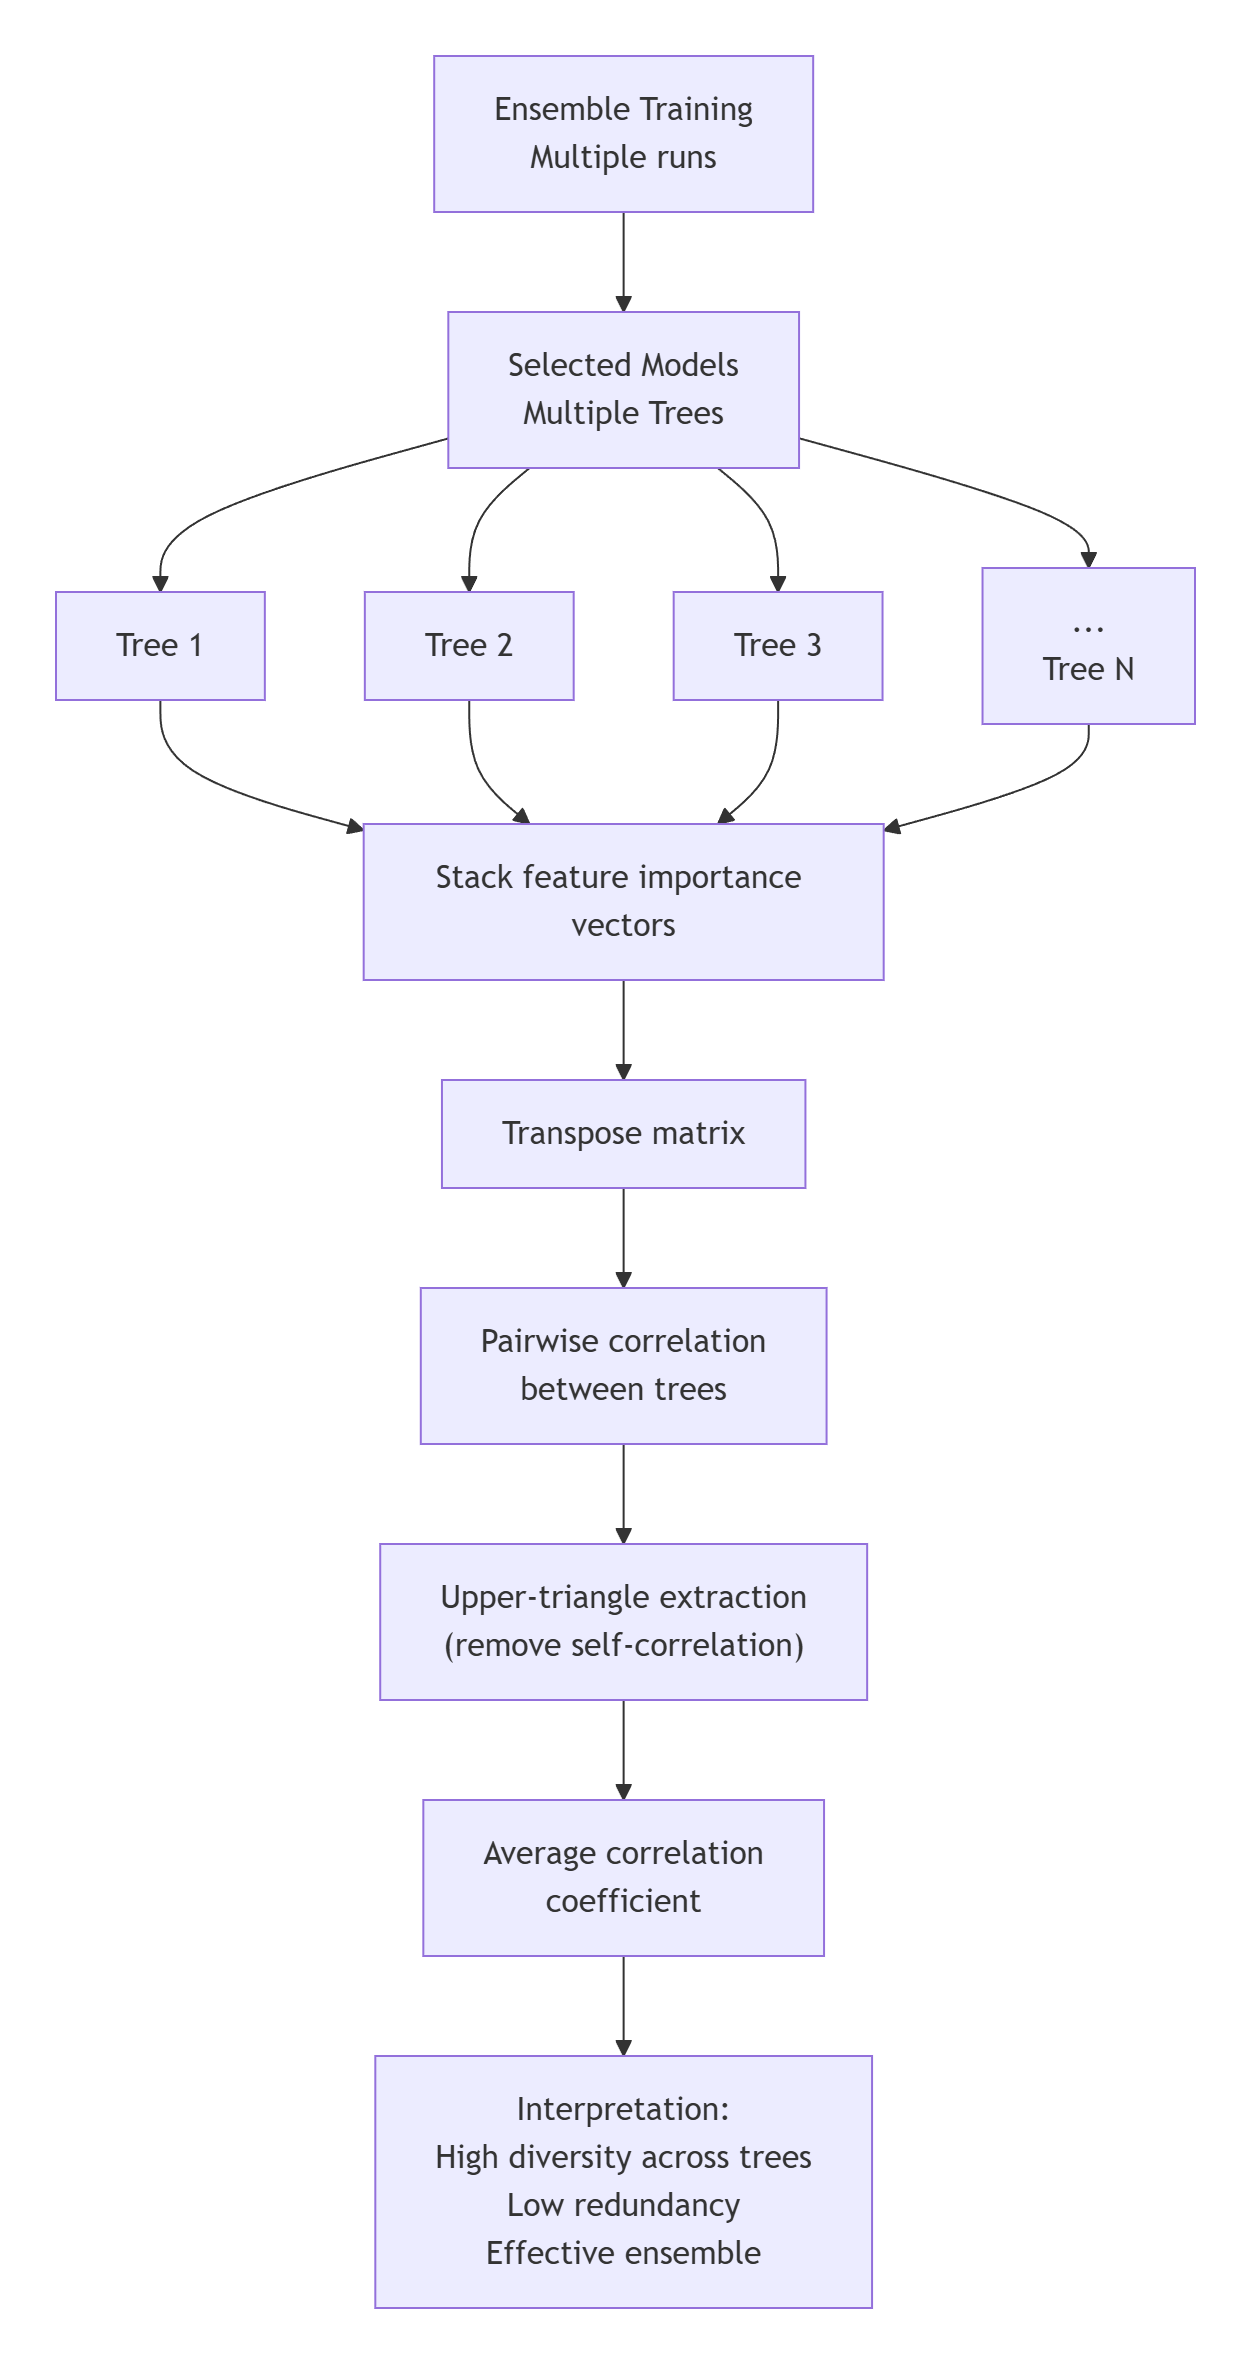


The average feature-importance correlation across models is 0.0743, indicating a low degree of overlap in feature usage. This suggests that the ensemble exhibits an acceptable level of diversity, with different models relying on meaningfully distinct feature subsets rather than converging on the same explanatory structure.

模型之间的平均特征重要性相关系数为 0.0743，整体水平较低，表明不同模型在特征使用上的重叠程度有限。该结果说明集成内部具备可接受的多样性，各模型并未收敛于同一特征解释结构，而是依赖于具有差异性的特征组合。

In [33]:
len(tr_regress_sampler.model_logs)

39

In [34]:
feature_importance_diversity( tr_regress_sampler.artifacts['models'],tr_regress_sampler.last_split['X_train'].columns)

Average Feature Importance Correlation: 0.0743


**Diagnostics**

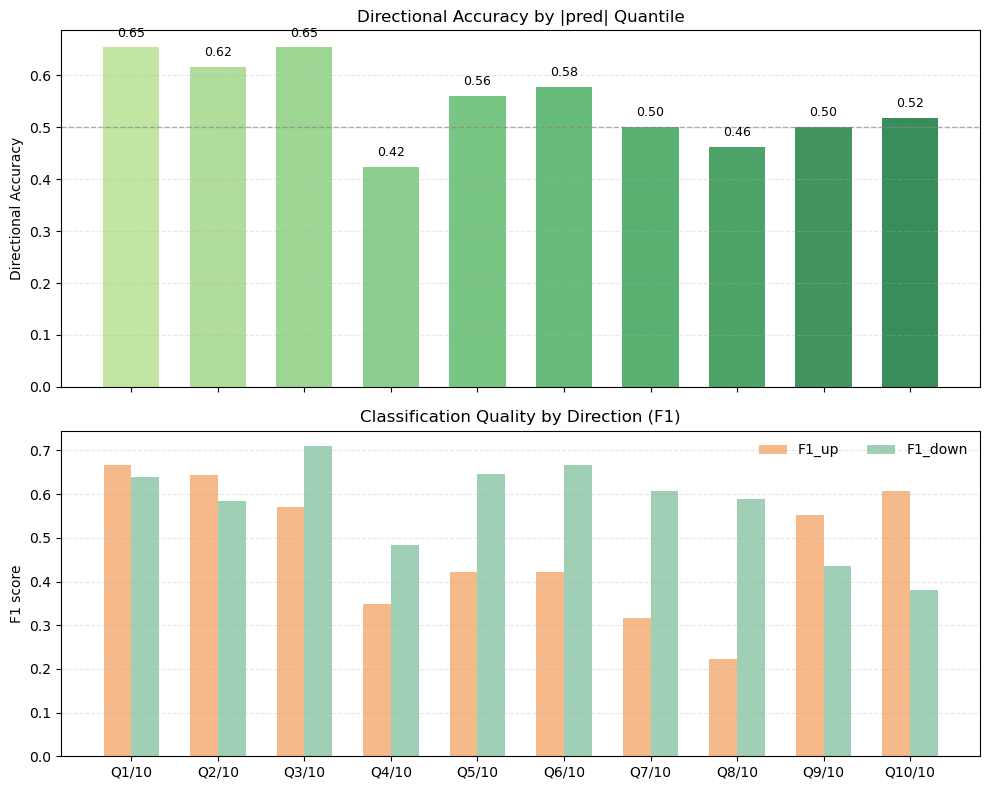

In [35]:
plot_pred_magnitude_diag(df['magnitude_table'])

In [36]:
len(tr_regress_sampler.artifacts['pred_avg_te'].unique())

258

The ensemble model exhibits some statistically meaningful predictive capacity, as evidenced by stable directional accuracy (approximately 0.55) and consistently positive rolling information coefficients (around 0.07). However, the relationship between prediction magnitude and performance is non-monotonic, implying that prediction size should not be interpreted as a calibrated confidence measure. Instead, the signal appears to be regime-dependent and primarily directionally informative, supporting sign-based or gated deployment strategies rather than magnitude-scaled position sizing.

该集成模型展现出具有一定统计意义的预测能力，体现在方向准确率稳定在约 0.55，以及滚动信息系数均值维持在约 0.07 的正值区间。然而，预测值幅度与预测表现之间呈现明显的非单调关系，表明预测幅度不应被视为经过校准的置信度指标。相反，该信号更具备明显的状态依赖性，其信息主要体现在方向层面，因此更适合采用基于方向或条件筛选（gated）的部署方式，而非按预测幅度进行仓位线性放大。

(<Figure size 1000x350 with 1 Axes>,
 <Axes: title={'center': 'Rolling Information Coefficient'}, ylabel='IC'>)

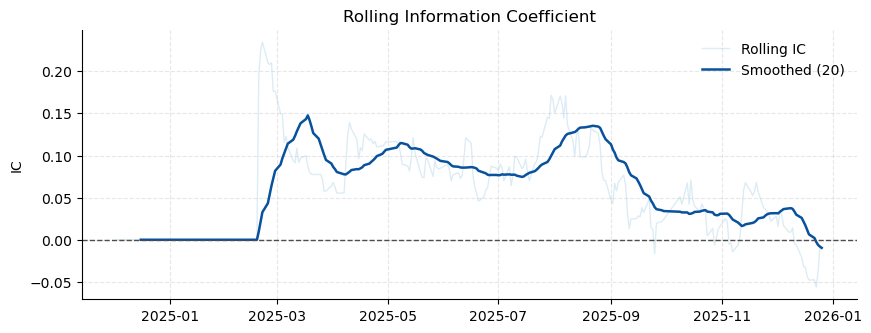

In [37]:
plot_rolling_ic(df['rolling_ic_series'])

Directional accuracy: 0.546
IC(spearman)=0.065 | IC(pearson)=0.082
[Point] DA=0.546 | IC(spear)=0.065 | IC(pear)=0.082
[Rolling IC(spear)@60] mean=0.071 | frac_pos=0.648 | vol=0.093


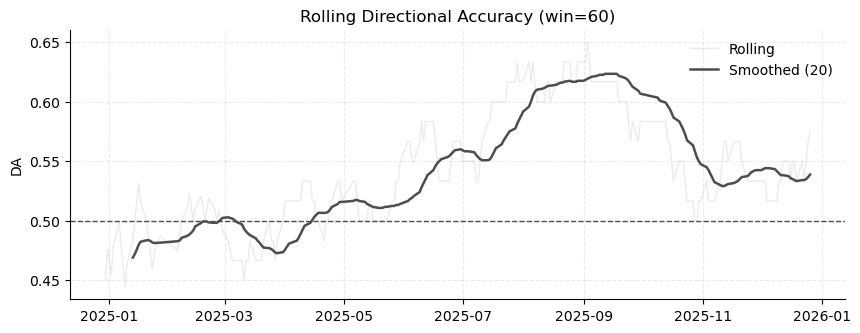

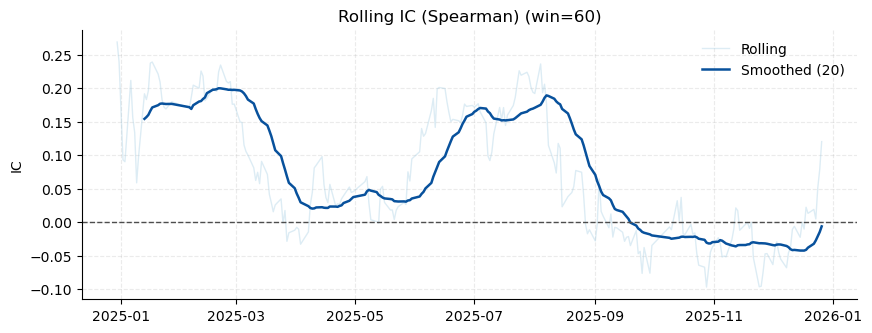

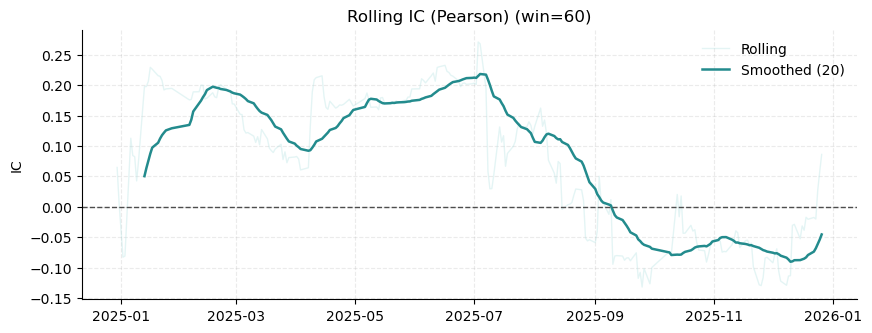

In [38]:
tr_regress_sampler.naive_back_track()

The ensemble model extracts predictive capacity primarily from short-horizon trend persistence conditioned on volatility and instability. The lag IC profile shows a broad forward-looking plateau rather than a sharp spike, indicating temporal robustness rather than single-period overfitting. Isolated negative-lag IC spikes are consistent with overlapping return constructions rather than structural information leakage.

该集成模型的预测能力主要来源于对短周期趋势持续性的刻画，并在波动率与市场不稳定性条件下进行有效筛选与调制。从滞后信息系数（Lag IC）的结构来看，模型在正向滞后区间呈现出较为平坦且持续的正向平台，而非集中于单一滞后点的尖峰形态，表明其预测能力具备一定的时间稳健性，而非依赖单期拟合的结果。

此外，个别出现在负滞后区间的 IC 异常峰值，更可能源于收益构造窗口之间的重叠效应，而非由模型结构或特征工程引入的系统性信息泄露问题。

In [39]:
df['lag_ic']

{-10: -0.01112389596272172,
 -9: -0.07844856078096568,
 -8: 0.00015783614792366093,
 -7: 0.06450071536261011,
 -6: -0.10332230572092156,
 -5: -0.003098180270604736,
 -4: -0.07463839054301463,
 -3: -0.008664294487490492,
 -2: 0.22988326324186398,
 -1: -0.05403020359048323,
 0: 0.06524394513736127,
 1: 0.11548746922250658,
 2: 0.09256056782365071,
 3: 0.010343418617773138,
 4: 0.10852958418782815,
 5: -0.03872814746667285,
 6: 0.12437373745602866,
 7: 0.09197246929620045,
 8: 0.05556906878342393,
 9: 0.02785247852228539,
 10: 0.030262976914239487}

In [40]:
models = tr_regress_sampler.artifacts["models"]
feature_names = tr_regress_sampler.last_split["X_train"].columns
split_imp = tree_split_frequency(models, feature_names)
split_imp.head(5)

split_count  split_frac
ret7                      16    0.029250
trend_age_norm            14    0.025594
Residual_Vol_10           13    0.023766
Residual_Vol_5            13    0.023766
ret5                      12    0.021938

From the extended IC diagnostics, the rolling IC exhibits a mean of approximately 0.064 and a median of 0.056, remaining consistently positive across most evaluation windows. This indicates that the model delivers persistent positive information content over time, rather than relying on a small number of extreme periods to drive performance. The interquartile distribution is noticeably right-skewed (Q25 ≈ 0, Q75 ≈ 0.127), suggesting that the model’s information efficiency is higher under favorable market conditions, while during adverse regimes the signal primarily decays rather than systematically reversing.

The proportion of positive IC observations is approximately 71%, supporting the overall directional effectiveness of the signal. The rolling IC volatility is around 0.069, comparable in magnitude to its mean, indicating the presence of regime-dependent variation in information strength without evidence of pronounced instability. The maximum drawdown of the IC series is approximately −0.28, implying that information content may temporarily deteriorate under extreme conditions, but without signs of structural breakdown.

Furthermore, the rolling IC displays a high first-order autocorrelation of 0.96, corresponding to an estimated half-life of roughly 17 trading days. This suggests strong temporal persistence in the model’s informational advantage, consistent with the typical characteristics of medium-to-short horizon, state-dependent predictive signals.

从进一步的 IC 诊断结果来看，Rolling IC 均值约为 0.064、中位数约为 0.056，整体稳定处于正值区间，表明模型在多数时间窗口内持续提供正向信息含量，而非依赖少数极端阶段驱动表现。其四分位分布呈现明显右偏（Q25≈0，Q75≈0.127），说明模型在有利市场状态下信息效率更高，而在不利阶段更多体现为信号衰减而非系统性反向。

正 IC 占比约为 71%，支持该信号在方向判断上的整体有效性。Rolling IC 波动率约为 0.069，与均值处于同一量级，显示信息强度存在阶段性波动但未出现显著不稳定。最大回撤约为 −0.28，反映极端环境下信息含量可能暂时退化，但未观察到结构性失效。

此外，Rolling IC 的一阶自相关系数高达 0.96，估计半衰期约为 17 个交易日，表明模型信息优势具有较强的时间连续性，符合中短周期、状态依赖型信号的典型特征。

In [41]:
df['rolling_ic_summary']

{'roll_ic_mean': 0.060229387351127026,
 'roll_ic_median': 0.062525425532834,
 'roll_ic_q25': 0.0,
 'roll_ic_q75': 0.09695254750443043,
 'roll_ic_frac_pos': 0.7432950191570882,
 'roll_ic_vol': 0.05599988149385388,
 'roll_ic_mdd': -0.2908808316785889,
 'roll_ic_acf1': 0.9471688486978671,
 'roll_ic_half_life': 12.770338205393719}

From the perspective of the model’s predictive outputs, the forecasts are distributed in a relatively balanced manner, with no evident systematic bias. In addition, Ljung–Box tests on the residuals do not indicate significant autocorrelation, suggesting that the model has effectively captured the predictable structure in the time series, while the remaining errors are closer to random noise.

从预测输出本身来看，模型给出的预测结果整体分布较为均衡，未出现明显的系统性偏置；同时，对残差进行的 Ljung–Box 检验未显示显著的自相关结构，表明模型已较好地吸收了序列中的可预测成分，剩余误差更接近随机扰动。

In [42]:
df['magnitude_table']

bin   n  n_eff  pred_up  pred_down  abs_pred_min  abs_pred_max  \
0   Q1/10  26     26       14         12  9.689346e-07      0.000118   
1   Q2/10  26     26       12         14  1.187985e-04      0.000204   
2   Q3/10  26     26        8         18  2.066858e-04      0.000282   
3   Q4/10  26     26       10         16  2.838887e-04      0.000411   
4   Q5/10  26     25        8         18  4.240691e-04      0.000513   
5   Q6/10  26     26        6         20  5.186035e-04      0.000665   
6   Q7/10  26     26        7         19  6.653241e-04      0.000880   
7   Q8/10  26     26        4         22  9.024742e-04      0.001190   
8   Q9/10  26     26       10         16  1.205585e-03      0.001796   
9  Q10/10  27     27       15         12  1.797772e-03      0.006065   

         DA        IC  tp  tn  fp  fn   prec_up    rec_up     f1_up  \
0  0.653846  0.468798   9   8   5   4  0.642857  0.692308  0.666667   
1  0.615385  0.308718   9   7   3   7  0.750000  0.562500  0.642857   
2  0.653846  0.103590   6  11   2   7  0.750000  0.461538  0.571429   
3  0.423077 -0.284297   4   7   6   9  0.400000  0.307692  0.347826   
4  0.560000  0.161709   4  10   4   7  0.500000  0.363636  0.421053   
5  0.576923  0.178120   4  11   2   9  0.666667  0.307692  0.421053   
6  0.500000  0.085128   3  10   4   9  0.428571  0.250000  0.315789   
7  0.461538 -0.038632   2  10   2  12  0.500000  0.142857  0.222222   
8  0.500000  0.092650   8   5   2  11  0.800000  0.421053  0.551724   
9  0.518519  0.079365  10   4   5   8  0.666667  0.555556  0.606061   

   prec_down  rec_down   f1_down  lift_vs_base  
0   0.666667  0.615385  0.640000      0.107692  
1   0.500000  0.700000  0.583333      0.069231  
2   0.611111  0.846154  0.709677      0.107692  
3   0.437500  0.538462  0.482759     -0.123077  
4   0.588235  0.714286  0.645161      0.013846  
5   0.550000  0.846154  0.666667      0.030769  
6   0.526316  0.714286  0.606061     -0.046154  
7   0.454545  0.833333  0.588235     -0.084615  
8   0.312500  0.714286  0.434783     -0.046154  
9   0.333333  0.444444  0.380952     -0.027635

In [43]:
df['residuals']['summary']

{'acf@lags': {1: 0.0032116626824984927,
  5: 0.031023807716111507,
  10: 0.03874472592302813,
  20: -0.11956395250375881},
 'acf_sq@lags': {1: -0.02224426012394364,
  5: -0.01452674323868666,
  10: 0.010310107140736303,
  20: -0.015956055323234394},
 'ljungbox_Q': {1: 0.002720911507052679,
  5: 2.527682844806748,
  10: 6.598742809979843,
  20: 23.905143049532114},
 'ljungbox_p': {1: 0.9583993266940185,
  5: 0.7723203309098006,
  10: 0.7627049308428884,
  20: 0.24656028556557696},
 'arch_lm': 1.5961260665545947,
 'arch_p': 0.99999998598773}

In [44]:
tr_regress_sampler.save("CSI500_Unmasked.joblib")

From a backtesting perspective, the ensemble model generates a modest but positive excess performance, corresponding to an excess Sharpe ratio of approximately 0.39. In periods of large price movements, the strategy also achieves a positive expected return (around 0.006), indicating that the signal retains economic relevance under more drastic conditions.

However, a more granular examination suggests that the model’s performance is structurally asymmetric. The predictive power is predominantly driven by the long side, with a long win rate of approximately 63% and a materially positive edge metric (0.25), while the short side exhibits win rates close to randomness (51%) and a near-zero edge.

Consistent with this observation, regime-based analysis shows that the signal performs best in lower-volatility environments, where both the median and mean aligned returns are higher and the win rate reaches nearly 59%. In mid- and high-volatility regimes, performance remains marginally positive but weaker, with reduced distributional dominance. Overall, these results indicate that the ensemble model’s excess returns are primarily attributable to long-side signals under favorable volatility regimes, rather than symmetric long–short predictability.

从回测结果来看，该集成模型能够产生一定程度的正向超额收益，对应的超额 Sharpe 比率约为 0.39。在价格波动幅度较大的阶段，策略同样实现了正的期望收益（约 0.006），表明该信号在更为剧烈的市场环境下仍具备一定的经济意义。

然而，进一步的细分分析显示，模型整体表现呈现出明显的结构性不对称。预测能力主要由多头方向贡献，多头信号的胜率约为 63%，且对应的边际优势指标显著为正（约 0.25）；相比之下，空头信号的胜率接近随机水平（约 51%），其边际优势几乎可以忽略。

与上述结论一致，基于波动率的状态划分结果表明，该信号在低波动环境下表现最为稳健，此时对齐收益的中位数与均值均较高，胜率接近 59%。在中、高波动状态下，模型表现虽仍维持小幅正值，但整体强度明显减弱，分布优势亦随之下降。总体而言，集成模型的超额收益主要来源于有利波动状态下的多头信号，而非对称的多空预测能力。

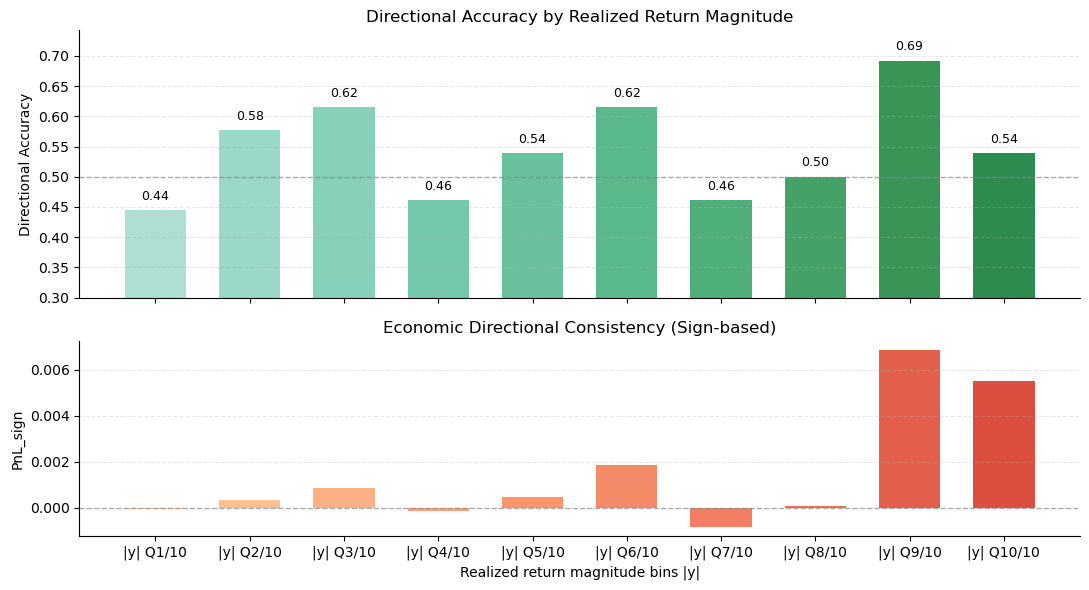

In [45]:
plot_true_magnitude_diag(df['true_mag_table'])

Sign of Ensemble only
=== Backtest summary ===
Sample size        : 260 obs
Directional Acc.   : 0.550
IC (Spearman)      : 0.149
IC (Pearson)       : 0.141
Trade days         : 86
Total turnover     : 171.00 (in units of |Δposition|)
Fee per turnover   : 0.0500%

Strategy (gross):
  Ann. return      : 40.97%
  Ann. vol         : 21.90%
  Sharpe           : 1.87
  Sortino          : 3.22
  Max drawdown     : -10.30%

Strategy (net after fees):
  Ann. return      : 32.68%
  Ann. vol         : 21.97%
  Sharpe           : 1.49
  Sortino          : 2.53
  Max drawdown     : -10.57%

Buy & Hold:
  Ann. return      : 24.21%
  Ann. vol         : 22.00%
  Sharpe           : 1.10
  Sortino          : 1.31
  Max drawdown     : -15.93%


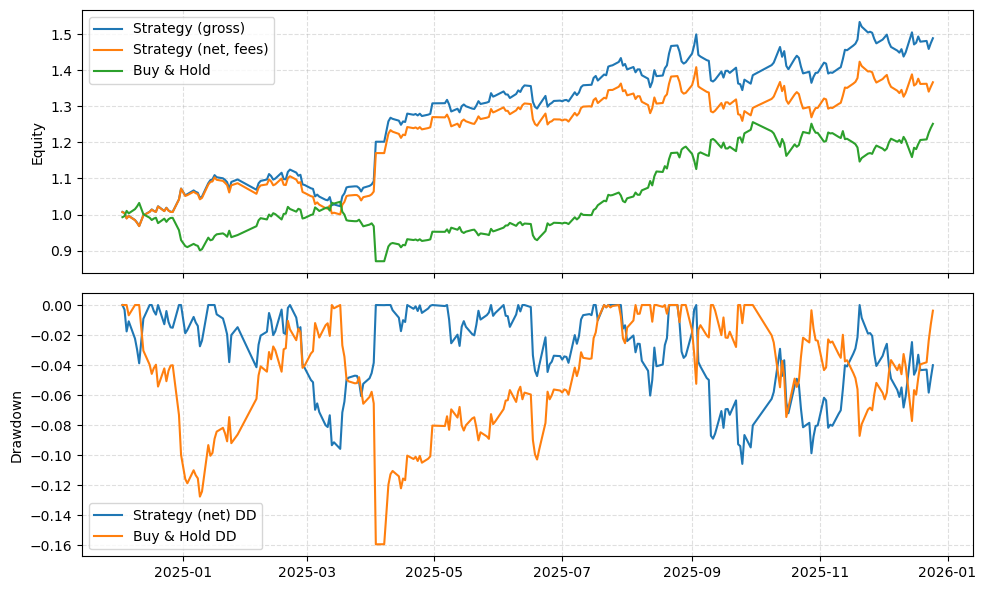

In [46]:
kimson = CTAStrategyEngine(tree = CTA_Trees.load_model("CSI500_Unmasked.joblib"), ticker = 'ic_main', cls = treemodel_factors_augment, strategy = 'raw_ensemble')
kimson.load(remove_columns = ['Phase_Sin', 'HT_DC_Period'],light = False, mask = False)
kimson.compute()
q = kimson.generate(naive_backtest = True)

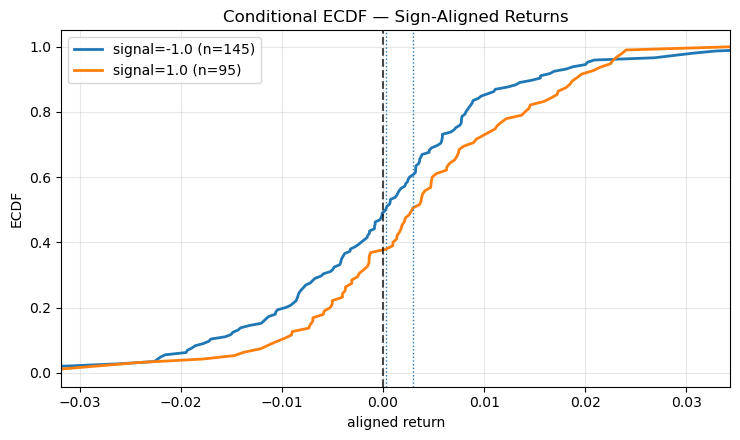

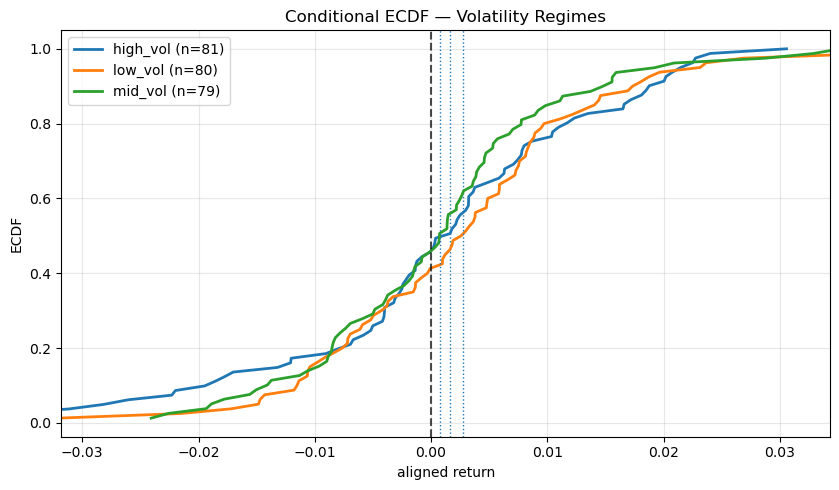

long win: 0.631578947368421
short win: 0.5103448275862069
long edge: 0.25198074451608515
short edge: 0.021254844681872002


n    median      mean  win_rate       p10       p90
vol_regime                                                      
high_vol    81  0.001641  0.000702  0.543210 -0.018573  0.018764
low_vol     80  0.002770  0.003363  0.587500 -0.011381  0.017395
mid_vol     79  0.000728  0.000682  0.544304 -0.013799  0.014861

In [47]:
df_diag, gate_table = diagnose_aligned_ecdf(q, plot=True)
gate_table

**Expansion Purge**

We further evaluated an expanding-window configuration with purged cross-validation (five folds). Under this setting, backtest performance did not improve: the excess Sharpe ratio turned negative （only sign based), and both long and short win rates deteriorated, although the structural asymmetry remained (approximately 60% win rate on the long side versus ~49% on the short side).

At the diagnostic level, however, the ordering between prediction magnitude and directional quality became clearer. Directional accuracy is substantially higher in the upper 
∣
pred
∣
∣pred∣ quantiles, despite the relationship remaining non-monotonic overall. Notably, the expanding-window specification exhibits unusually strong rolling IC statistics (mean ≈ 0.16, median ≈ 0.17, positive fraction ≈ 0.81, with very high temporal persistence), yet this apparent statistical improvement does not translate into corresponding backtest gains, and lag-sweep diagnostics do not reveal obvious anomalies.

This divergence suggests that the expanding window, through long-horizon sample accumulation combined with the removal of boundary noise induced by purging, may amplify small but persistent rollover-related structural effects inherent in continuous contract construction, rather than reflecting a genuine improvement in predictive capacity relative to the rolling-window (embargo-based) configuration. At the same time, the expanding-window setup appears to reduce effective model diversity, as historical regimes dominate the training sample and induce stronger cross-period dependence among model components. Such effects can materially inflate correlation-based metrics such as IC, while remaining economically weak and insufficiently tradable.

我们进一步评估了采用 expanding window 并结合 purged 交叉验证（5 折）的模型设定。在该配置下，回测表现并未得到改善：超额 Sharpe 比率转为负值 （只看正负号不采用strategy的情况下），多头与空头胜率均出现下降，尽管模型在结构上仍保持一定的不对称性（多头胜率约为 60%，空头约为 49%）。

然而，在预测诊断层面，预测幅度与方向质量之间的排序关系变得更加清晰。尽管整体仍呈现非单调特征，但在高 |pred| 分位区间内，方向准确率显著更高。值得注意的是，expanding window 设定下的 Rolling IC 指标异常偏强（均值约为 0.16，中位数约为 0.17，正值占比约为 0.81，且时间序列持续性极高），但这一统计优势并未对应到回测收益的同步提升，同时 Lag Sweep 等诊断亦未显示明显异常。

上述分歧表明，expanding window 在长期样本累积的基础上，叠加 purging 对边界噪声的剔除，可能放大了连续合约构造中难以完全消除的微弱换月结构性效应，而非相对于 rolling window（embargo 设定）下模型真实预测能力的提升。同时，该设定也可能削弱模型的有效多样性：历史样本在训练集中占比不断提高，使得不同阶段模型之间的相关性上升，从而降低了集成结构在应对状态变化时的鲁棒性。此类效应虽可在相关性指标（如 IC）中被显著放大，但在经济意义与可交易性层面仍然较弱。

**Rollover Pass**

Under the unmasked configuration, we further exclude observations on the rollover day and the immediately following day to assess the impact of sample cleaning on model performance. Under this setting, the full-sample IC increases to approximately 0.11, and the ordering of predictive quality across magnitude quantiles becomes more monotonic. At the same time, however, both the mean and median of aligned returns decline, and once transaction costs are incorporated, the strategy no longer exhibits a meaningful excess Sharpe ratio.

Further structural analysis indicates that the model continues to exhibit a stable directional asymmetry. Long-side signals retain a pronounced directional advantage (with a win rate of approximately 68% and a materially positive edge), while short-side performance remains close to random. From a volatility-regime perspective, the model maintains positive expected returns in mid- and high-volatility environments, but displays negative expectancy during low-volatility periods.

Overall, these results suggest that removing rollover-related observations improves the stability of predictive rankings and inflates correlation-based diagnostics such as IC, but does not translate into stronger economic performance. In its current form, the model is therefore better suited as a conditional directional filtering signal, primarily for identifying high- rather than low-quality trading states, rather than for full participation or magnitude-scaled position sizing.

For the Expansion configuration, the rolling IC no longer exhibits abnormally elevated values, with its mean reverting to approximately 0.06, which lies within a more reasonable range. Consistent with the walk-forward results, the model performs relatively better in high-volatility environments, indicating a degree of volatility sensitivity.

However, when evaluated across the broader set of performance and stability metrics, the Expansion setup shows deterioration along multiple dimensions, including backtest returns, robustness, and several structural diagnostics. Overall, while the Expansion + Purge configuration mitigates the previously inflated IC behavior, it does not deliver a material improvement in aggregate model performance.

在 unmasked 设定下，我们进一步尝试剔除换月当日及其紧接一日的预测，以评估样本清洗对模型表现的影响。结果显示，该设定下全序列 IC 提升至约 0.11，预测值在幅度分位上的排序关系亦表现出更好的单调性。然而，与此同时，aligned return 的均值与中位数均有所回落，在纳入交易成本后，策略已不再表现出显著的超额 Sharpe。

进一步的结构性分析表明，模型仍保持稳定的方向不对称特征：多头信号具备显著的方向优势（胜率约为 68%，edge 显著为正），而空头信号的表现接近随机水平；从波动率状态划分来看，模型在中高波动环境下维持正期望值，而在低波动阶段则呈现负期望。

综上所述，剔除换月相关观测有助于提升预测排序的稳定性，并在统计层面放大相关性指标（如 IC），但并未同步增强信号的经济强度。在当前设定下，该模型更适合作为条件化方向筛选信号，主要用于识别高而非低有效状态，而不适合进行全面参与或基于预测幅度的线性放大交易。


对于 Expansion 来说 Rolling IC 不再表现出异常偏高的数值，其均值回落至约 0.06，处于更为合理的区间。同时，与walkforward 一致 模型 在高波动环境下模型的表现相对更佳，显示出一定的波动率敏感特征。

然而，从整体评估指标来看，该设定下模型在其余维度上均出现不同程度的退化，包括回测收益、稳定性及部分结构性统计指标。总体而言，尽管 Expansion + Purge 抑制此前 IC 指标的异常放大，但并未在综合性能层面带来实质性的改善。

**Size of Subset**

Given the relatively large and structured feature library, model performance may be sensitive to the degree of feature subsampling used in the bagging ensemble, as this parameter directly controls the trade-off between model diversity and stability. While smaller max_features values increase decorrelation across trees, excessively aggressive subsampling can introduce high variance and obscure economically meaningful structure.

In this context, our objective is not to optimize max_features through fine-grained tuning, but rather to conduct a coarse diagnostic assessment of how the ensemble behaves under different levels of feature diversity. Accordingly, we evaluate a small set of interpretable configurations—centered around 
sqrt, 0.2, and 0.3—to capture plausible diversity regimes, with 0.5 included as a low-diversity anchor to assess the impact of feature concentration. Extremely small settings (e.g., 0.1) are considered, if at all, only as stress tests rather than realistic operating points.

Since outcomes under feature subsampling are inherently affected by randomness, especially in high-diversity regimes, the purpose of this analysis is not to identify an optimal parameter choice, but to verify whether observed signal characteristics are robust to meaningful changes in feature diversity. 

鉴于当前特征库规模较大且结构较为复杂，模型表现可能对 bagging 集成中采用的特征子采样比例较为敏感，因为该参数直接决定了模型多样性与稳定性之间的权衡关系。较小的 max_features 设定有助于增强树之间的去相关性，但过于激进的特征子采样也可能引入较高方差，从而掩盖具有经济意义的有效结构。

在此背景下，我们的目标并非通过细粒度调参来寻优 max_features，而是对不同特征多样性水平下集成模型的行为进行一次粗粒度的诊断性评估。为此，我们选取了一组具有明确解释性的配置方案，主要围绕  sqrt、0.2 与 0.3 等代表性设定，以刻画合理的多样性区间，并引入 0.5 作为低多样性、特征集中使用的对照锚点，用以评估特征集中化对模型表现的影响。极小比例的设定（如 0.1）仅在必要时作为极端去相关条件下的压力测试，而不被视为现实可用的工作点。

由于特征子采样本身会引入随机性，尤其是在高多样性设定下，其结果不可避免地受到抽样扰动的影响，因此本分析的目的并非确定最优参数选择，而是检验模型在特征多样性发生实质性变化时，其核心信号特征是否具备稳健性。

| Parameter                    | Redundancy| Number of Models | DA    | Spearman Mean | Monotonicity              | Spearman Frac | Lag Sweep | Excess Sharpe | Long Win | Short Win | Volatility Regime |
|-----------------------------|-------------------------------:|---------:|------:|--------------:|---------------------------|---------------:|-----------|---------------:|---------:|----------:|-------------------|
| √p (≈10%)                   | 0.0743                         | 39       | 0.546 | 0.065         | Stable, non-monotonic     | 0.648          | Clean     | 0.39           | 0.63     | 0.51      | Low / Mid         |
| 20%                         | 0.1334                         | 40       | 0.519 | 0.053         | Almost monotonic          | 0.686          | Noisy     | −0.92          | 0.61     | 0.49      | Low               |
| 30%                         | 0.1058                         | 31       | 0.515 | 0.042         | Almost monotonic          | 0.674          | Clean     | −0.76          | 0.59     | 0.47      | High              |
| 50%                         | 0.1670                         | 37       | 0.519 | 0.011         | Not monotonic             | 0.350          | Noisy     | −2.06          | 0.55     | 0.46      | High              |


The results indicate a clear trade-off between feature redundancy and ensemble effectiveness. The √p configuration (≈10%) exhibits the lowest feature redundancy, the strongest directional accuracy, the highest average rank correlation, and the only positive excess Sharpe among the tested settings, while maintaining clean temporal diagnostics and stable performance across low- and mid-volatility regimes.

Increasing max_features leads to higher apparent monotonicity and agreement across trees, but this comes at the cost of reduced diversity, weaker rank correlation, deteriorating economic performance, and increased regime dependence. Although certain intermediate configurations (e.g., 20% or 30%) may occasionally yield visually appealing diagnostics due to stochastic variation, these effects do not translate into robust or economically meaningful performance.

Given the inherent randomness in ensemble construction and the constraints of research capacity, we therefore treat such outcomes as incidental rather than actionable, and adopt √p (or nearby low-redundancy settings) as the preferred operating regime for subsequent analysis.

研究结果表明，特征冗余度与集成模型有效性之间存在明确的权衡关系。在所测试的配置中，√p（约 10%）设定表现出最低的特征冗余度、最优的方向准确率、最高的平均秩相关系数，并且是唯一能够产生正向超额 Sharpe 的方案。同时，该设定在时间维度上的诊断表现较为干净，并在低至中等波动率环境下保持了相对稳定的性能。

随着 max_features 的提高，模型在表观上呈现出更强的单调性与树间一致性，但这一改善是以多样性下降、秩相关性减弱、经济绩效恶化以及对市场状态依赖性增强为代价的。尽管在随机扰动作用下，部分中间配置（如 20% 或 30%）可能偶尔呈现出较为“好看”的诊断结果，但这些现象并未转化为稳健或具有经济意义的实际表现。

鉴于集成模型构建过程中不可避免的随机性以及研究资源的现实约束，我们将此类结果视为偶然现象而非可操作结论，并在后续分析中采用 √p（或其附近的低冗余设定）作为优先的工作配置。

We further examined a more aggressive diversification setting (max_features = 0.05). Under this configuration, the model exhibits relatively stable IC dynamics, with rolling IC remaining consistently positive and a positive excess Sharpe even after transaction costs. With sufficiently strong feature subsampling, model errors are more likely to decorrelate, which can, to some extent, enhance the robustness of the ensemble structure.

Nevertheless, whether the observed performance reflects a robust underlying signal rather than favorable sampling variation remains an open question and requires further validation through longer evaluation windows and additional out-of-sample testing. Relative to the  √p
configuration, the model’s effective “confidence region” shifts toward higher prediction-magnitude quantiles, with predictive power concentrated primarily in the upper ∣pred∣ bins, as well as in low- and high-volatility regimes.

At the same time, the long–short structure changes accordingly. While the long-side win rate remains positive, it declines relative to the 
√p case, and short-side performance weakens further. Overall, this indicates a qualitative change in model behavior: the ensemble no longer learns the same signal structure observed under lower subsampling intensity, with emphasis shifting away from trend-dominated features toward a combination of open-gap, volume, volatility (e.g., Parkinson), and momentum-oscillating components.

我们进一步考察了更为激进的多样化设定（max_features = 0.05）。在该配置下，模型的 IC 表现相对稳定，Rolling IC 持续为正，且在计入交易成本后仍能够获得正的超额 Sharpe。在特征子采样较为充分的情况下，模型误差更有可能实现去相关，从而在一定程度上提升集成结构的稳健性。

然而，当前观察到的表现是否反映了稳健的内在结构，而非有利的抽样波动，仍有待进一步验证，需要通过更长时间窗口及额外的样本外检验加以确认。与 √p
设定相比，该模型的“有效置信区间”明显向更高的预测幅度分位移动，其预测能力主要集中于较高的 ∣pred∣区间，以及低波动与高波动状态下。

与此同时，多空结构亦发生了相应变化：多头信号的胜率仍保持为正，但相较于 √p 情形有所下降，而空头信号的表现进一步走弱。

整体而言，该设定下模型行为发生了定性转变，集成模型所学习到的信号结构已不再与较低子采样强度时保持一致，其特征侧重由趋势类因子逐步转向以开盘跳空、成交量、波动率（如 Parkinson）及动量振荡类特征为主的组合。

**Number of Estimators**

Although, in principle, increasing the number of base learners under a fixed random seed can expand the coverage of feature subsets, this strategy exhibits clear diminishing marginal returns. Once the ensemble reaches a moderate scale, additional trees primarily increase computational cost and the prevalence of redundant or near-duplicate structures, without materially enhancing ensemble diversity.

Accordingly, we do not treat the number of estimators as a primary tuning dimension, nor do we regard any specific value (e.g., 200) as intrinsically optimal. Instead, this parameter is viewed as a technical control used to ensure convergence and stability of the ensemble. Within this framework, we conducted exploratory checks with larger ensembles. When the number of estimators was increased from 200 to 300 and further to 500, neither feature diversity nor average Spearman IC exhibited meaningful changes (remaining around 0.05–0.06). In contrast, the temporal stability of rolling IC metrics (e.g., the fraction of positive IC) weakened, which was subsequently reflected in noisier and less consistent backtest performance.

More generally, even as the number of base learners increases, the rate at which estimation error and signal components converge is constrained by several factors: (i) residual correlation among base learners, (ii) the finite size of the effective tree-structure space induced by a fixed feature library, and (iii) the limited strength of the randomization mechanisms. Under these constraints, the growth of the ensemble’s effective number of independent samples is slow, leading to diminishing returns and, in rolling evaluations, potential instability. For these reasons, the number of estimators is used only for limited convergence and stability checks, rather than as a routine lever for performance improvement.

尽管在理论上可以通过在固定随机种子下增加基学习器数量来扩大特征子集的覆盖范围，但该策略存在明显的边际收益递减问题。当集成规模达到一定水平后，新增树模型主要带来计算成本的上升以及大量冗余或近似重复结构，而难以实质性提升集成模型的多样性。

因此，我们并未将基学习器数量视为核心的调参维度，也不认为某一具体取值（如 200）具有特殊或“最优”的意义，而是将其视为用于确保模型收敛性与结果稳定性的技术性控制参数。在此背景下，我们对更大规模集成进行了探索性检查。结果表明，当基学习器数量由 200 增加至 300 及 500 时，模型的特征多样性及 Spearman IC 水平均未出现实质性变化（仍维持在约 0.05–0.06 区间）；相反，Rolling IC 的时间稳定性指标（如正值占比）有所下降，并在回测结果中体现为更高的不确定性与更弱的一致性表现。

进一步来看，即便基学习器数量持续增加，其误差与信号的收敛速度仍会受到多方面约束，包括：（i）基学习器之间的相关性难以完全消除，（ii）可探索的有效树结构空间受固定因子库规模限制，以及（iii）随机化机制本身的强度有限。在上述约束下，集成模型中“有效独立样本数”的增长速度显著放缓，从而表现为收益递减，并可能在滚动评估中引入不稳定性。基于上述考虑，基学习器数量仅在必要的收敛性与稳定性检验中有限使用，而不作为提升模型表现的常规手段。

**CSI500 Bag Masked**

Under the previous construction, setting discard = True can be viewed as an approximation to mask = True, in the sense that both aim to mitigate contamination arising from contract rollover periods. The key distinction is that discard = True passively excludes observations near rollover events, which may lead to missed trading opportunities.

Consequently, it remains necessary to evaluate the mask = True setting, in which signals are not computed within the roll zone and are instead forward-filled, preserving a continuous time axis and better reflecting practical deployment constraints.

Due to practical limitations in research resources, the exploration over feature subsets, purge schemes, and ensemble size is conducted only at a coarse level. 

While relative model performance rankings can be established within a fixed dataset and experimental setup, such rankings are inherently data-specific: different tickers, sample periods, or cutoff points may all lead to materially different outcomes. Accordingly, no claim is made regarding the universal optimality of any particular model or ensemble configuration.

在此前的构造设定下，discard = True 可被视为对 mask = True 的一种近似处理，两者均旨在缓解合约换月阶段所引入的结构性污染。其核心差异在于，discard = True 通过被动剔除换月附近的观测值来实现这一目的，这一做法可能导致交易机会的缺失。

因此，有必要进一步评估 mask = True 的配置方式。在该设定下，因子信号在换月区间内不被计算，而是通过前向填充的方式保持时间轴连续，从而更贴近真实交易与上线环境的约束条件。

受限于研究资源，在特征子集、样本 purge 方案以及集成模型规模等维度上的搜索仅进行粗粒度探索。

模型间的相对表现对比可以在给定数据集和实验条件下成立，但这种排序本质上具有显著的数据依赖性：不同标的、不同样本切分方式或不同时间区间均可能导致结论发生变化。因此，本文不对任何单一模型或集成结构的“普适最优性”作出声明。

Total runtime: 2.93 minutes


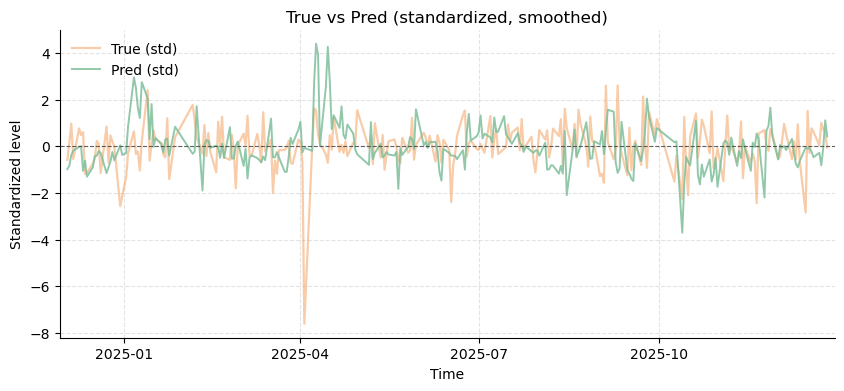

In [48]:
start = time.time()
tr_regress_sampler  = CTA_Trees(ticker='ic_main', cls = treemodel_factors_augment)
tr_regress_sampler.load(remove_columns = ['Phase_Sin', 'HT_DC_Period'], light = False, mask = True)
tr_regress_sampler.prep()
tr_regress_sampler.tune(ratio = 0.9, splitter = RollingEmbargoSplit(train_size= 2000, purge_gap = 5,  test_size= 60, step= 65), n = 200, param_grid = {'max_depth': [4, 6, 8, 10, 12], 'min_samples_leaf': [20, 30, 40, 50, 60, 100], 'min_samples_split' : [2,10, 50, 100], 'max_features': ['sqrt']})
end = time.time()
print(f"Total runtime: {(end - start)/60:.2f} minutes")
df = tr_regress_sampler.diag(bins = 10)

The diversity observed under the masked configuration remains comparable to that of the unmasked setting. In practical terms, no meaningful difference in model diversity is detected between the two cases, as reflected by nearly identical metrics (39 vs. 38 models; 0.0743 vs. 0.0749). These differences fall well within normal statistical fluctuation and do not indicate a structural change in ensemble composition.

在 mask 配置下所观察到的模型多样性与未 mask 的情形整体保持一致。从实际结果来看，两种设定在模型多样性指标上并未呈现出具有实质意义的差异，例如模型数量（39 对 38）及对应统计量（0.0743 对 0.0749）均高度接近。这类差异处于正常统计波动范围内，尚不足以表明集成结构或多样性层面发生了本质变化。

In [49]:
print(len(tr_regress_sampler.model_logs))
feature_importance_diversity( tr_regress_sampler.artifacts['models'],tr_regress_sampler.last_split['X_train'].columns)

38
Average Feature Importance Correlation: 0.0749


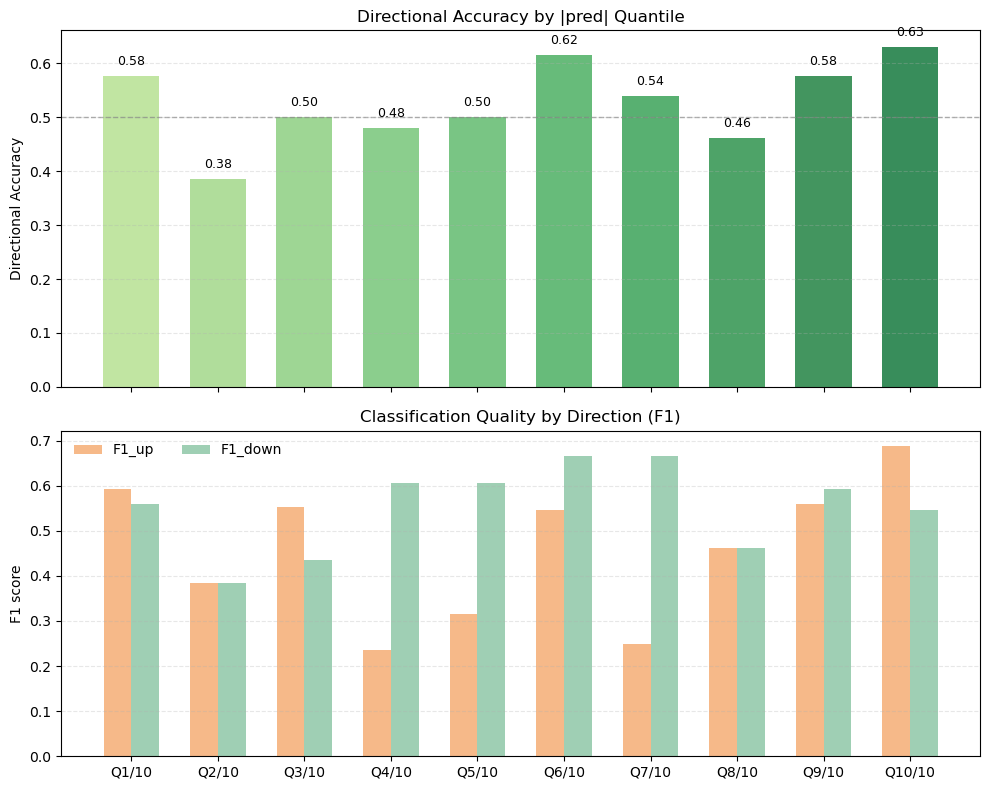

In [50]:
plot_pred_magnitude_diag(df['magnitude_table'])

In [51]:
models = tr_regress_sampler.artifacts["models"]
feature_names = tr_regress_sampler.last_split["X_train"].columns
split_imp = tree_split_frequency(models, feature_names)
split_imp.head(5)

split_count  split_frac
ret7                     20    0.034423
Residual_Vol_5           14    0.024096
IV_Parkinson_7           14    0.024096
mom_velocity             13    0.022375
DC_Period_CV             13    0.022375

Under the mask configuration, the overall model performance is broadly consistent with that of the 0.05-subsampled bagging setup. In both cases, momentum-related features play a dominant role, and samples with larger prediction magnitudes are generally associated with higher predictive performance. Notably, the masked version achieves comparable performance improvements while exhibiting greater overall stability.

在 mask 配置下，模型整体表现与 0.05 子采样的 bagging 设定基本一致。在两种情况下，动量类特征均占据主导地位，且预测幅度较大的样本通常对应更高的预测性能。值得注意的是，mask 版本在获得相近性能提升的同时，整体表现出更好的稳定性。

259


(<Figure size 1000x350 with 1 Axes>,
 <Axes: title={'center': 'Rolling Information Coefficient'}, ylabel='IC'>)

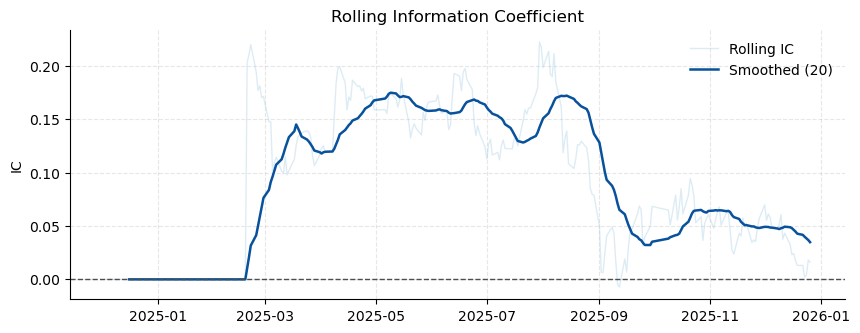

In [52]:
print(len(tr_regress_sampler.artifacts['pred_avg_te'].unique()))
plot_rolling_ic(df['rolling_ic_series'])

The IC profile is more stable, remaining positive in approximately 87% of observations, with a mean IC of 0.107. Directional accuracy shows a slight decline.

IC 表现更为稳固，在约 87% 的观测区间内保持为正，均值约为 0.107；与此同时，方向准确率（DA）略有下降。

Directional accuracy: 0.527
IC(spearman)=0.093 | IC(pearson)=0.111
[Point] DA=0.527 | IC(spear)=0.093 | IC(pear)=0.111
[Rolling IC(spear)@60] mean=0.107 | frac_pos=0.870 | vol=0.078


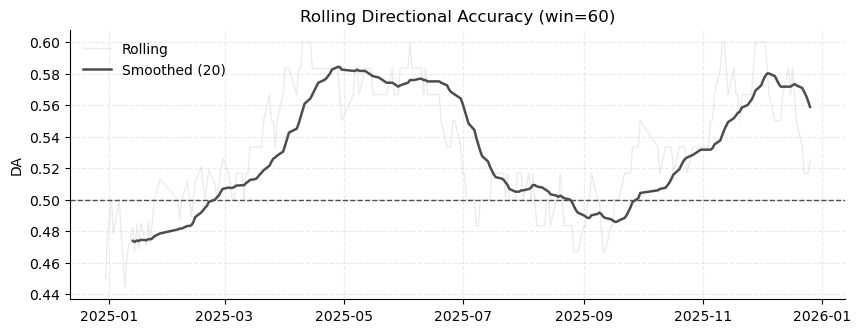

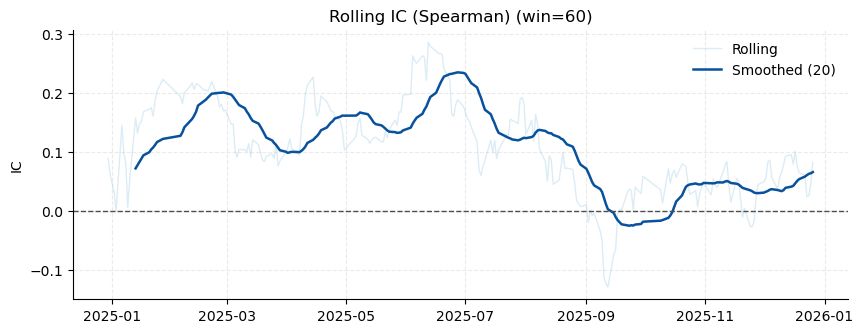

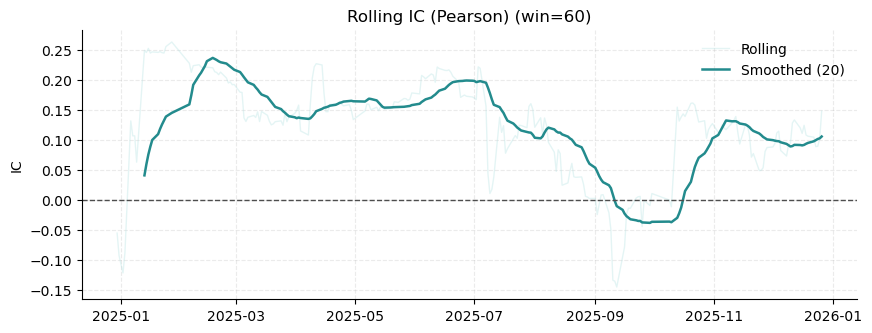

In [53]:
tr_regress_sampler.naive_back_track()

In [54]:
print(df['lag_ic'])

{-10: 0.03384937729060281, -9: -0.12000337442003002, -8: -0.045371198179479016, -7: 0.019665091496793487, -6: -0.035496046888046154, -5: 0.021809203267769785, -4: -0.06870704175069489, -3: -0.08780843320961138, -2: 0.17351350436643423, -1: -0.01513438926647476, 0: 0.09255576452500325, 1: 0.03382902813618109, 2: 0.09042660653905629, 3: 0.0616834974956435, 4: 0.043605727000714974, 5: 0.004636002459087923, 6: 0.08750582138209138, 7: 0.09825552316364482, 8: -0.06699918451369355, 9: -0.024433800440551, 10: 0.055086721717599006}


The lag-sweep results exhibit a dispersed and asymmetric response rather than a monotonic decay. The signal maintains consistently positive correlations across multiple positive lags (lags 1–7), indicating genuine forward predictive content rather than a purely contemporaneous or backward-looking artifact. The absence of a single dominant peak at lag 0 further suggests that the signal is distributed across time rather than concentrated at a specific horizon.

Overall, the lag profile implies a multi-horizon, regime-dependent signal structure, where predictive information is temporally smoothed and shared across adjacent bars. 

滞后扫描结果呈现出分散且非对称的结构特征，而非单调衰减关系。在多个正滞后区间（1–7）内，信号相关性整体保持为正，表明模型仍然具备实质性的前瞻预测能力，而非仅依赖于同期或回溯信息。同时，滞后 0 处并未形成压倒性的峰值，也进一步说明该信号并非集中于单一时间点，而是分布于多个相邻周期。

综合来看，该滞后结构指向一种多时间尺度、具备状态依赖特征的信号形态，预测信息在相邻时间步之间被平滑和共享。

In [55]:
print(df['rolling_ic_summary'])

{'roll_ic_mean': 0.09032836178618991, 'roll_ic_median': 0.09442608693222576, 'roll_ic_q25': 0.024191284796929197, 'roll_ic_q75': 0.14895390918909407, 'roll_ic_frac_pos': 0.8045977011494253, 'roll_ic_vol': 0.06855537968532353, 'roll_ic_mdd': -0.22941625357046402, 'roll_ic_acf1': 0.9647697604598228, 'roll_ic_half_life': 19.326133863561424}


In [56]:
df['magnitude_table']

bin   n  n_eff  pred_up  pred_down  abs_pred_min  abs_pred_max  \
0   Q1/10  26     26       14         12      0.000004      0.000107   
1   Q2/10  26     26       10         16      0.000110      0.000215   
2   Q3/10  26     26       13         13      0.000220      0.000335   
3   Q4/10  26     25        5         21      0.000347      0.000465   
4   Q5/10  26     26        8         18      0.000465      0.000603   
5   Q6/10  26     26        8         18      0.000604      0.000725   
6   Q7/10  26     26        7         19      0.000731      0.000998   
7   Q8/10  26     26        8         18      0.001041      0.001297   
8   Q9/10  26     26        9         17      0.001304      0.001754   
9  Q10/10  27     27       16         11      0.001765      0.004990   

         DA        IC  tp  tn  fp  fn   prec_up    rec_up     f1_up  \
0  0.576923  0.145299   8   7   6   5  0.571429  0.615385  0.592593   
1  0.384615 -0.089231   5   5   5  11  0.500000  0.312500  0.384615   
2  0.500000 -0.068034   8   5   5   8  0.615385  0.500000  0.551724   
3  0.480000  0.076239   2  10   2  11  0.500000  0.153846  0.235294   
4  0.500000  0.117627   3  10   5   8  0.375000  0.272727  0.315789   
5  0.615385  0.227389   6  10   2   8  0.750000  0.428571  0.545455   
6  0.538462  0.318974   2  12   5   7  0.285714  0.222222  0.250000   
7  0.461538  0.001709   6   6   2  12  0.750000  0.333333  0.461538   
8  0.576923  0.059145   7   8   2   9  0.777778  0.437500  0.560000   
9  0.629630  0.161783  11   6   5   5  0.687500  0.687500  0.687500   

   prec_down  rec_down   f1_down  lift_vs_base  
0   0.583333  0.538462  0.560000      0.050000  
1   0.312500  0.500000  0.384615     -0.142308  
2   0.384615  0.500000  0.434783     -0.026923  
3   0.476190  0.833333  0.606061     -0.046923  
4   0.555556  0.666667  0.606061     -0.026923  
5   0.555556  0.833333  0.666667      0.088462  
6   0.631579  0.705882  0.666667      0.011538  
7   0.333333  0.750000  0.461538     -0.065385  
8   0.470588  0.800000  0.592593      0.050000  
9   0.545455  0.545455  0.545455      0.102707

Residual diagnostics indicate no material issues: autocorrelations at multiple lags remain close to zero, Ljung–Box statistics fail to reject the null of no serial correlation across tested horizons, and the ARCH test provides no evidence of conditional heteroskedasticity. Overall, the residual process appears well behaved.

Nevertheless, despite these favorable residual properties, the prediction distribution remains unbalanced across certain quantiles, a pattern that closely mirrors the behavior observed in the unmasked configuration. This suggests that the observed quantile asymmetry is not driven by residual autocorrelation or volatility clustering, but rather reflects structural characteristics of the underlying signal or feature dominance (e.g., momentum-related effects).

残差诊断结果整体良好：各滞后阶数下的自相关系数均接近于零，Ljung–Box 检验在多个检验窗口内均未拒绝“无序列相关”的原假设，ARCH 检验亦未显示出显著的条件异方差特征，表明残差过程整体较为稳健。

然而，尽管残差性质表现良好，预测结果在部分分位区间内仍呈现出不均衡分布，这一现象与未 mask 版本高度一致。这说明分位不对称性并非源自残差自相关或波动聚集问题，而更可能反映了信号本身的结构性特征或特定因子（如动量因子）的主导效应。

In [57]:
print(df['residuals']['summary'])

{'acf@lags': {1: 0.005353817980716945, 5: 0.03156343073725161, 10: 0.03508825710999326, 20: -0.12212477557176696}, 'acf_sq@lags': {1: -0.021958258404778126, 5: -0.01558121416659401, 10: 0.010152415817156167, 20: -0.016368713015789634}, 'ljungbox_Q': {1: 0.007561730366022407, 5: 2.547257784144508, 10: 6.446173145728523, 20: 23.60681716232533}, 'ljungbox_p': {1: 0.9307047294504939, 5: 0.7693617431529421, 10: 0.776489213675381, 20: 0.2599890774287149}, 'arch_lm': 1.65377968280104, 'arch_p': 0.9999999805327009}


The sign-based ensemble exhibits statistically meaningful directional information, with a relatively stable IC profile and directional accuracy remaining above 0.52. However, frequent sign reversals result in elevated turnover, leading to substantial performance erosion once transaction costs are taken into account. From this perspective, the limitation lies less in directional correctness and more in insufficient signal persistence at the execution level.

A pronounced asymmetry between long and short positions is also observed: the long side contributes positive marginal returns, whereas the short side delivers near-zero edge while materially increasing turnover and transaction costs.

Relative to the 0.05-subsampled bagging model, the sign-based ensemble demonstrates stronger effectiveness in low and medium-volatility regimes, a pattern that differs from the baseline model’s more balanced behavior across volatility states. Whether this regime-specific advantage can translate into improved overall performance when combined with other models remains an open question.

基于符号的集成信号在统计意义上具备一定的方向性信息含量，IC 表现相对稳定，方向准确率亦维持在 0.52 以上。然而，由于信号符号切换较为频繁，整体换手率偏高，在引入交易成本后对收益造成了显著侵蚀。从结果来看，问题并非源于方向判断本身的失效，而更多体现在执行层面信号持续性不足。

此外，多空表现存在明显不对称：多头侧具备稳定的正向边际贡献，而空头侧边际收益接近于零，却显著抬升了整体换手率与交易成本。

与 0.05 子采样的 bagging 模型相比，该符号集成信号在低波动与高波动区间内表现出相对更明显的有效性，而这一特征与基线模型中、低波动区间表现更为均衡的结构有所不同。然而，该差异是否能够在模型组合层面转化为更优的整体行为，仍有待进一步验证。

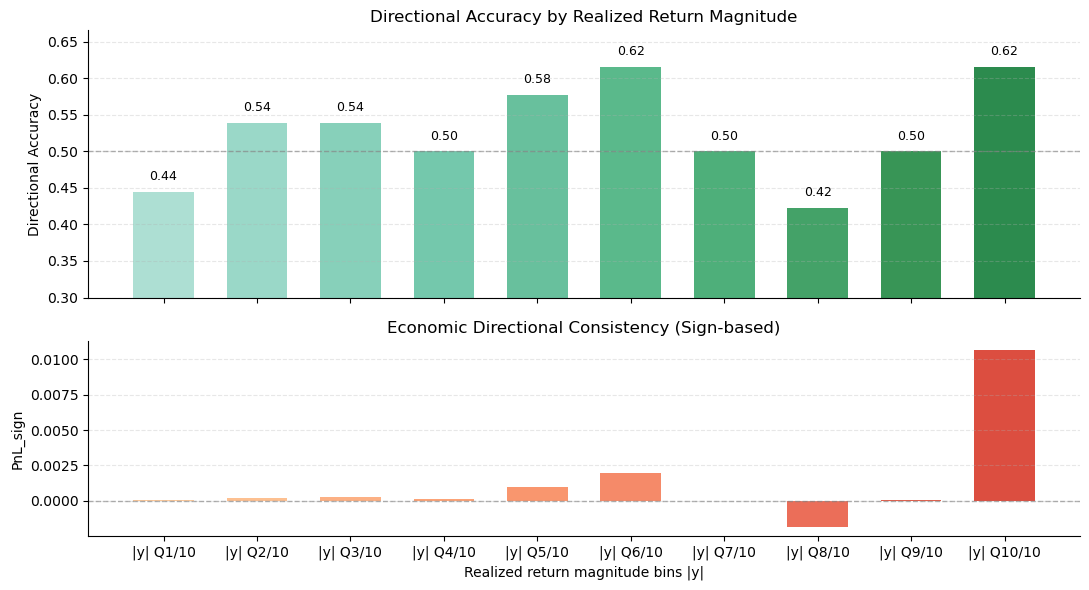

In [58]:
plot_true_magnitude_diag(df['true_mag_table'])

In [59]:
tr_regress_sampler.save("CSI500_Masked.joblib")

Sign of Ensemble only
=== Backtest summary ===
Sample size        : 260 obs
Directional Acc.   : 0.527
IC (Spearman)      : 0.091
IC (Pearson)       : 0.107
Trade days         : 80
Total turnover     : 159.00 (in units of |Δposition|)
Fee per turnover   : 0.0500%

Strategy (gross):
  Ann. return      : 30.17%
  Ann. vol         : 21.97%
  Sharpe           : 1.37
  Sortino          : 2.51
  Max drawdown     : -10.81%

Strategy (net after fees):
  Ann. return      : 22.46%
  Ann. vol         : 21.96%
  Sharpe           : 1.02
  Sortino          : 1.86
  Max drawdown     : -13.02%

Buy & Hold:
  Ann. return      : 24.21%
  Ann. vol         : 22.00%
  Sharpe           : 1.10
  Sortino          : 1.31
  Max drawdown     : -15.93%


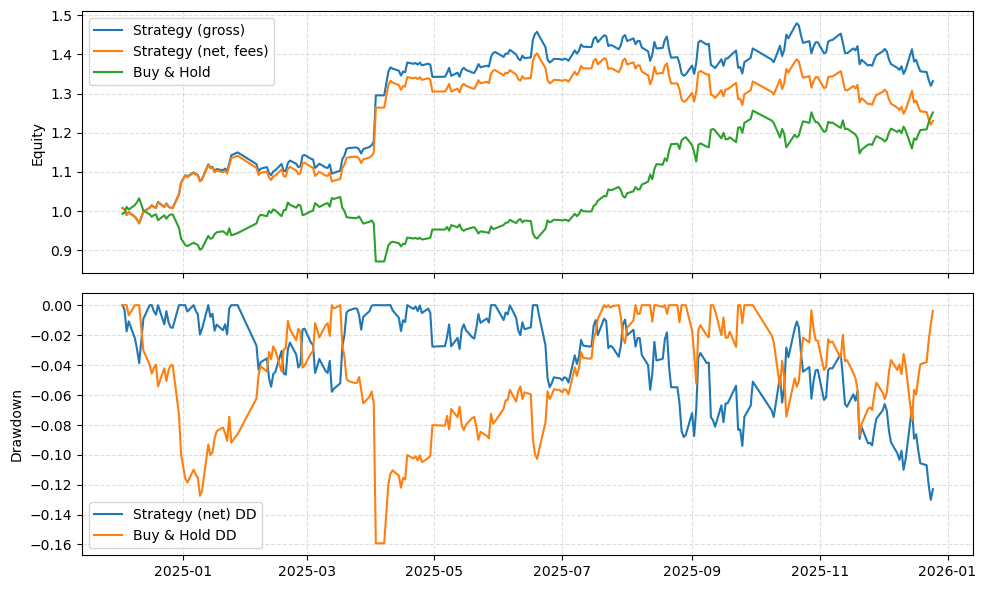

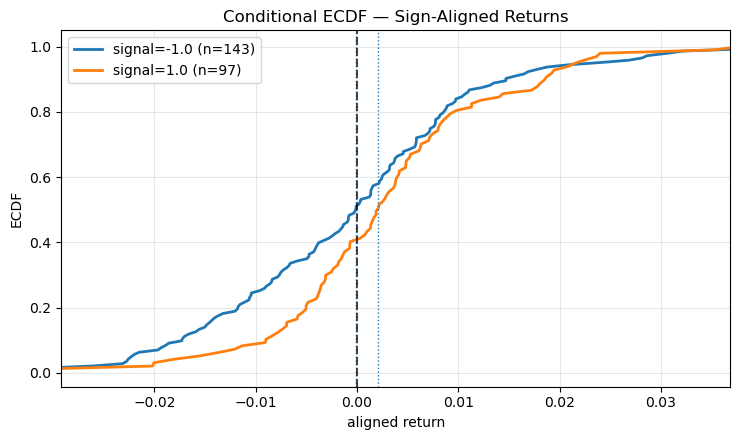

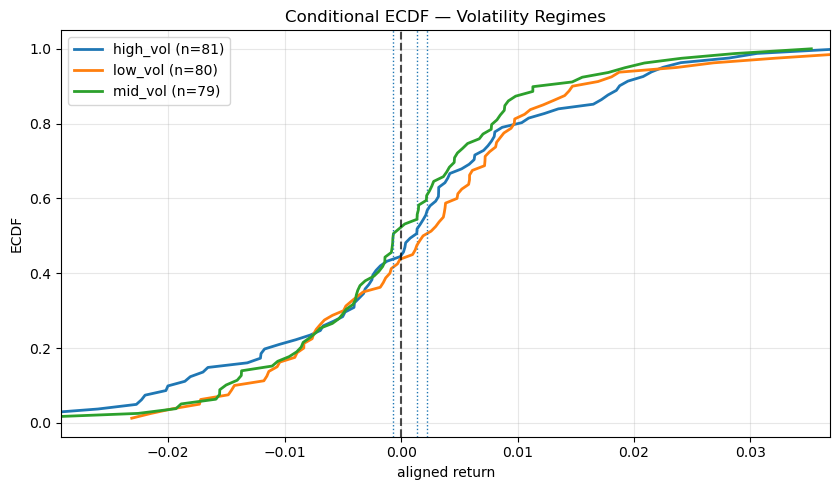

long win: 0.5979381443298969
short win: 0.48951048951048953
long edge: 0.1877092887484683
short edge: -0.006241796315299593


n    median      mean  win_rate       p10       p90
vol_regime                                                      
high_vol    81  0.001341  0.000508  0.555556 -0.018573  0.018764
low_vol     80  0.002228  0.002791  0.562500 -0.012043  0.014926
mid_vol     79 -0.000659  0.000050  0.481013 -0.014269  0.011986

In [60]:
kimson = CTAStrategyEngine(tree = CTA_Trees.load_model("CSI500_Masked.joblib"), ticker = 'ic_main', cls = treemodel_factors_augment, strategy = 'raw_ensemble')
kimson.load(remove_columns = ['Phase_Sin', 'HT_DC_Period'],light = False, mask = True)
kimson.compute()
q = kimson.generate(naive_backtest = True)
df_diag, gate_table = diagnose_aligned_ecdf(q, plot=True)
gate_table

Under the masked (roll-aware) setting, the Expansion training scheme remains noticeably less stable than the Rolling Embargo configuration. Nevertheless, a consistent and robust empirical observation is that, within the Expansion setup, the number of base learners that effectively contribute to the ensemble is persistently small, typically concentrated around 10–15 models.

In the masked setting, increasing the number of base learners (e.g., from 200 to 300 and further to 500) is often associated with improvements in average performance and a reduction in IC volatility. However, this effect should be interpreted with caution. The observed stability gain does not stem from an expansion of the hypothesis space or a genuine increase in model diversity. Rather, under the mask constraint, base learners tend to be highly aligned in both structure and information usage, such that additional models largely represent repeated sampling of similar error patterns. As a result, the improvement primarily reflects variance smoothing and noise averaging effects.

When the tuning focus shifts from the number of base learners to the size of the feature subspace (i.e., increasing max_features from 0.2 to 0.3 and further to 0.5), out-of-sample performance deteriorates progressively, accompanied by clear signs of diversity degradation. 

It should be noted that, compared with the unmasked setting, the current analysis under the masked configuration has not yet been subjected to equally detailed and systematic diagnostics.

Accordingly, the results presented in this section are intended primarily for exploratory analysis. They aim to illustrate that, within the masked framework, the choice of bagging-related parameters—particularly max_features—has a material impact on model behavior, and that the direction of these effects does not necessarily align with those observed under unmasked settings. Further validation under a more systematic analytical framework is required.

在 mask（换月感知）版本下，Expansion 训练方案相较于 Rolling Embargo 仍表现出更高的不稳定性。然而，一个持续且稳健的经验事实是：在 Expansion 设定中，真正对集成结果产生贡献的基学习器数量始终较少，通常集中在约 10–15 个模型范围内。

在 masked 版本中，随着基学习器数量的增加（如 200 → 300 → 500），模型往往表现出平均绩效提升以及 IC 波动收敛的现象。但这一结果需要谨慎解读。该“稳定性改善”并非来源于假设空间的扩展或模型多样性的实质性增强，而更可能是由于 mask 设定下不同基学习器在结构与信息约束上高度一致，新增模型主要构成对相似误差结构的重复采样，从而在统计意义上带来方差平滑与噪声平均效应。

当调整维度由基学习器数量转向特征子空间规模（即 max_features 由 0.2 提升至 0.3 乃至 0.5）时，模型样本外表现呈现出逐步恶化趋势，并伴随明显的多样性退化迹象

需要说明的是，相较于非 mask 版本，目前针对 mask 设定下的分析尚未展开同等深度与系统性的诊断。

因此，本节结果主要作为 exploratory analysis，用于展示在 mask 框架下，不同 bagging 相关参数（尤其是 max_features）的选择会对模型行为产生实质性影响，且其变化方向并不必然与 unmasked 设置下的结论一致。相关观察仍有待在更系统、可复现的分析框架中进一步验证。

**Spearman Optimization**

As described by Stefan Jansen, in the context of machine learning–based trading models, using the Information Coefficient (IC) as the evaluation metric during the cross-validation stage—as a substitute for or complement to traditional error-based measures such as mean negative RMSE—appears intuitively appealing. This choice aligns more closely with real-world trading objectives that emphasize ranking ability and directional consistency, rather than pointwise prediction accuracy.

However, it is important to note that this practice only alters the scoring criterion used for model comparison and selection, without changing the underlying optimization objective of the model. For models trained with mean squared error–based losses, parameter estimation and structural learning remain fully governed by RMSE / MSE, even when IC is adopted as the cross-validation metric. Consequently, such approaches cannot be regarded as truly IC-aware training schemes in a strict sense, but are more appropriately interpreted as IC-based outer-loop model selection strategies.

Moreover, compared with error-based metrics, IC is inherently more sensitive to data partitioning and temporal boundary conditions. In time-series financial applications, variations in train–validation splits, sample window lengths, or contract rollover handling can lead to substantial differences in IC estimates, thereby amplifying instability in cross-validation results. This sensitivity limits the robustness and reproducibility of IC when used as a primary hyperparameter selection criterion.

From a methodological perspective, genuinely incorporating IC into the training objective would require the construction of differentiable loss functions that approximate ranking-based correlation measures, or a substantial redesign of the underlying optimization framework. Such approaches entail significant theoretical and engineering complexity and typically lie beyond the scope of standard applied research workflows.

In light of these considerations, this study positions the use of IC in cross-validation as an exploratory yet practically motivated evaluation approach, aimed at assessing its alignment with realized trading performance, rather than as a fundamental replacement for conventional training objectives.

如 Stefan Jansen 在其著作中所述，在机器学习交易模型的实践中，将 信息系数（Information Coefficient, IC） 用作交叉验证阶段的评价指标，以替代或补充传统的均方误差类度量（如 mean negative RMSE），在直觉上更贴近真实交易场景中对预测排序能力与方向一致性的关注，因此在实际应用中具有一定吸引力。

然而，需要强调的是，此类做法仅改变了模型比较与筛选所依据的评分标准，而并未改变模型内部的优化目标。对于以均方误差为损失函数的模型而言，即便在交叉验证阶段采用 IC 作为评分指标，其参数学习过程与模型结构的构建仍完全由 RMSE / MSE 等误差型目标所主导。因此，这类方法在严格意义上并不能被视为真正的“IC-aware”训练机制，而更合理的理解应是：一种基于 IC 的外层模型选择或调参策略。

此外，相较于误差型指标，IC 对样本切分方式与时间边界条件表现出更高的敏感性。在时序金融任务中，不同的训练–验证划分方案、样本窗口长度设定，或换月处理方式，均可能对 IC 的估计结果产生显著影响，从而放大交叉验证阶段的波动性与不稳定性。这一特性在一定程度上削弱了 IC 作为调参依据时的稳健性与可复现性。

从方法论角度来看，若希望在训练阶段真正引入 IC 导向的优化目标，则通常需要构造能够近似刻画排序相关性的可微损失函数，或对现有模型的优化框架进行较大幅度的重构。此类方法在理论推导与工程实现层面均具有较高门槛，通常超出常规应用型研究的可控范围。

基于上述考虑，本文将 IC 在交叉验证中的使用 定位为一种探索性且具有现实动机的评估手段，旨在考察其与实际交易表现之间的对齐程度，而非将其视为对模型训练目标的根本性替代。

In [61]:
start = time.time()
tr_regress_sampler  = CTA_Trees(ticker='ic_main', cls = treemodel_factors_augment)
tr_regress_sampler.load(remove_columns = ['Phase_Sin', 'HT_DC_Period'], light = False, mask = False)
tr_regress_sampler.prep()
tr_regress_sampler.tune(ratio = 0.9, splitter = RollingEmbargoSplit(train_size= 2000, purge_gap = 5,  test_size= 60, step= 65), n = 200, param_grid = {'max_depth': [4, 6, 8, 10, 12], 'min_samples_leaf': [20, 30, 40, 50, 60, 100], 'min_samples_split' : [2,10, 50, 100], 'max_features': ['sqrt']}, optimize = 'IC')
end = time.time()
print(f"Total runtime: {(end - start)/60:.2f} minutes")

Total runtime: 3.02 minutes


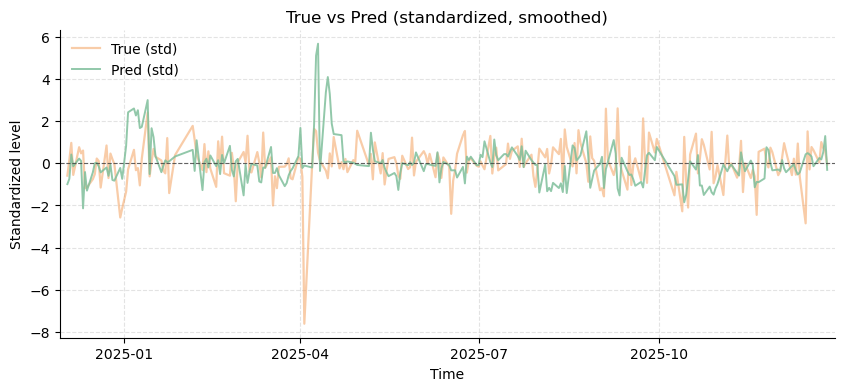

In [62]:
df = tr_regress_sampler.diag(bins = 10)

Under the Spearman-based configuration, the ensemble produces a larger number of effective trees (48 vs. 39). However, this increase is accompanied by a slight rise in structural redundancy, suggesting that the marginal contribution to model diversity from the additional base learners is limited.

采用 Spearman 版本 后，集成模型中生成的有效树数量有所增加（48 vs. 39），但与此同时，模型结构的重复性亦出现轻微上升，表明新增基学习器在多样性层面带来的边际增益较为有限。

In [63]:
print(len(tr_regress_sampler.model_logs))
feature_importance_diversity( tr_regress_sampler.artifacts['models'],tr_regress_sampler.last_split['X_train'].columns)

48
Average Feature Importance Correlation: 0.0810


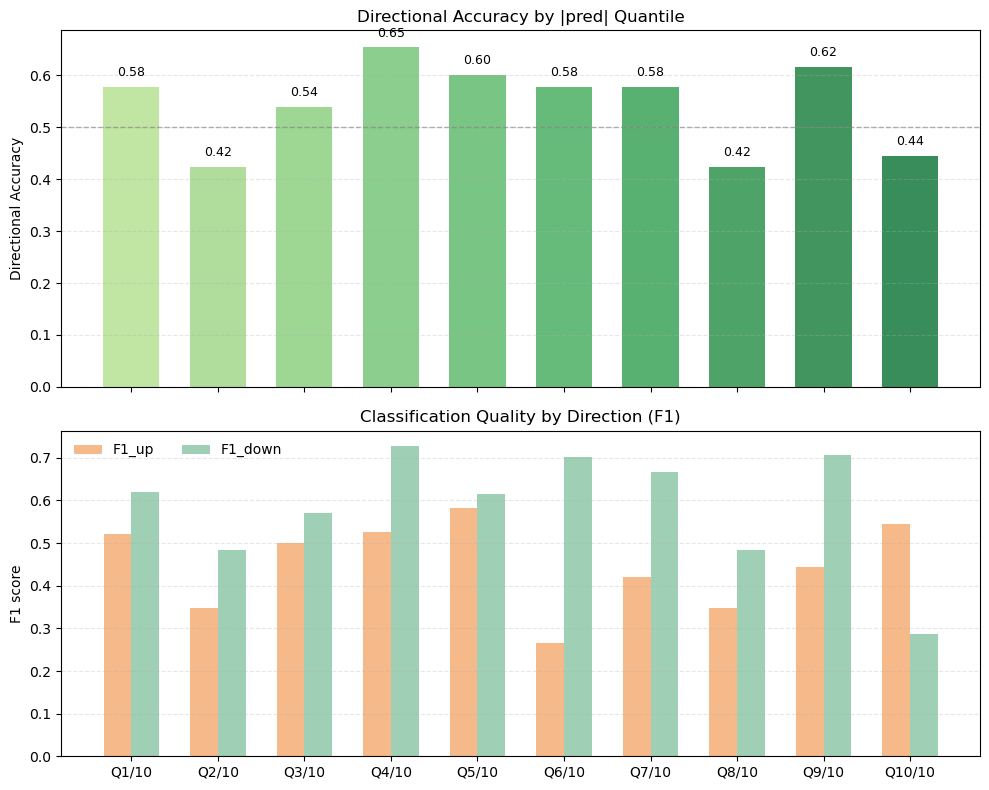

In [64]:
plot_pred_magnitude_diag(df['magnitude_table'])

From a predictive standpoint, this configuration shows improvements in both the level and stability of IC; however, the predictive quantile structure does not exhibit a corresponding enhancement. Relative to the baseline, the advantage in the lower quantiles is no longer evident, while performance in the upper quantiles fails to demonstrate statistically convincing improvement. In addition, the Directional Accuracy (DA) does not display a clear advantage over the reference model and shows signs of deterioration in more recent evaluation windows.

就预测表现而言，该版本在 IC 的稳定性与绝对水平 上均有所提升；然而，预测分位数结构并未呈现相应改善。相较于原始版本，其在低分位数区间的相对优势已不再明显，而在高分位数区间的表现亦未显示出具有统计说服力的提升。与此同时，方向一致性指标（Directional Accuracy, DA） 相较于基准版本并未体现出显著优势，且在近期评估窗口中呈现出一定程度的回落。

In [65]:
print(len(tr_regress_sampler.artifacts['pred_avg_te'].unique()))

259


Directional accuracy: 0.542
IC(spearman)=0.127 | IC(pearson)=0.101
[Point] DA=0.542 | IC(spear)=0.127 | IC(pear)=0.101
[Rolling IC(spear)@60] mean=0.137 | frac_pos=0.697 | vol=0.135


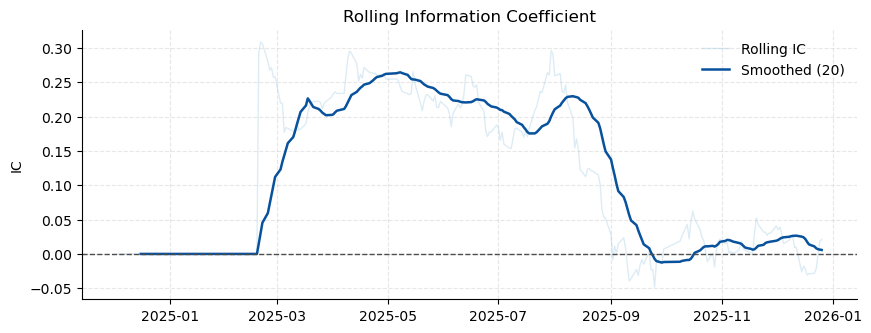

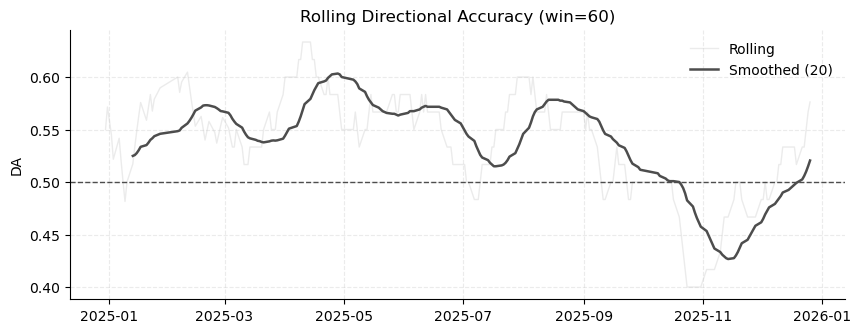

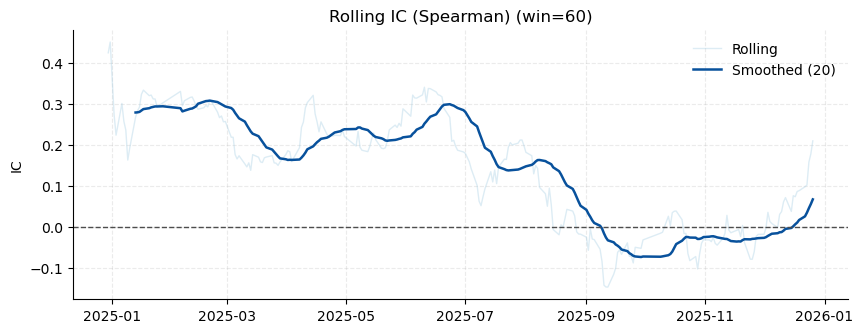

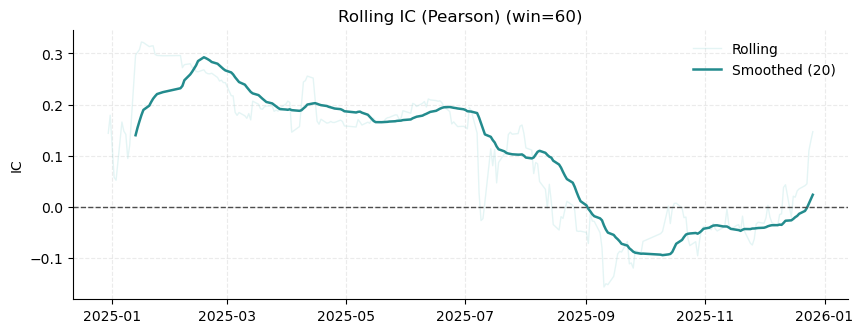

{-10: -0.00871182269467818, -9: -0.04757107372170743, -8: 0.04499031679476027, -7: 0.03466252479739417, -6: -0.06655789231049689, -5: 0.06616361945082944, -4: -0.05083534961321324, -3: -0.0030682605876304362, -2: 0.15433073204728473, -1: 0.001388391517532151, 0: 0.12721131985183054, 1: 0.13613439984925463, 2: 0.10186802890850544, 3: 0.015326978332812527, 4: 0.0642670432352893, 5: -0.03980639155355869, 6: 0.016780778420558366, 7: 0.11982019190564135, 8: -0.04107257383560063, 9: -0.07551127150021622, 10: 0.008298618212339135}


In [66]:
plot_rolling_ic(df['rolling_ic_series'])
tr_regress_sampler.naive_back_track()
print(df['lag_ic'])

The lag sweep indicates that signal strength is concentrated around near-zero and short positive lags, where it remains relatively stable. As the lag increases, the effect decays rapidly and becomes more volatile, suggesting that the predictive content is confined to a short temporal horizon.

Lag sweep 显示信号强度主要集中在近零及短期正向滞后区间，在该区域内表现相对稳定；随着滞后幅度增大，信号迅速衰减并呈现出更强的波动性，表明其预测能力主要局限于较短的时间窗口。

In [67]:
models = tr_regress_sampler.artifacts["models"]
feature_names = tr_regress_sampler.last_split["X_train"].columns
split_imp = tree_split_frequency(models, feature_names)
print(split_imp.head(5))
print(df['rolling_ic_summary'])

                    split_count  split_frac
Open_Gap                     24    0.030189
ret7                         22    0.027673
pv_divergence                19    0.023899
Range_Ratio                  17    0.021384
mom_ocillator_fast           16    0.020126
{'roll_ic_mean': 0.1118002669052956, 'roll_ic_median': 0.06473683371244429, 'roll_ic_q25': 0.0, 'roll_ic_q75': 0.2219223956074634, 'roll_ic_frac_pos': 0.7203065134099617, 'roll_ic_vol': 0.11182942779157608, 'roll_ic_mdd': -0.3567823819128415, 'roll_ic_acf1': 0.9796157137367801, 'roll_ic_half_life': 33.656232416969225}


In [68]:
df['magnitude_table']

bin   n  n_eff  pred_up  pred_down  abs_pred_min  abs_pred_max  \
0   Q1/10  26     26        7         19  3.921614e-07      0.000129   
1   Q2/10  26     26        9         17  1.343123e-04      0.000241   
2   Q3/10  26     26        9         17  2.415371e-04      0.000323   
3   Q4/10  26     26        9         17  3.229939e-04      0.000453   
4   Q5/10  26     25        8         18  4.653357e-04      0.000635   
5   Q6/10  26     26        3         23  6.434560e-04      0.000790   
6   Q7/10  26     26        7         19  7.985758e-04      0.001097   
7   Q8/10  26     26        6         20  1.155391e-03      0.001499   
8   Q9/10  26     26        5         21  1.509628e-03      0.001956   
9  Q10/10  27     27       16         11  1.991302e-03      0.007280   

         DA        IC  tp  tn  fp  fn   prec_up    rec_up     f1_up  \
0  0.576923  0.245812   6   9   1  10  0.857143  0.375000  0.521739   
1  0.423077  0.195214   4   7   5  10  0.444444  0.285714  0.347826   
2  0.538462  0.068718   6   8   3   9  0.666667  0.400000  0.500000   
3  0.653846  0.200000   5  12   4   5  0.555556  0.500000  0.526316   
4  0.600000  0.221197   7   8   1   9  0.875000  0.437500  0.583333   
5  0.576923  0.222602   2  13   1  10  0.666667  0.166667  0.266667   
6  0.576923 -0.014703   4  11   3   8  0.571429  0.333333  0.421053   
7  0.423077 -0.094701   4   7   2  13  0.666667  0.235294  0.347826   
8  0.615385  0.121368   4  12   1   9  0.800000  0.307692  0.444444   
9  0.444444 -0.050672   9   3   7   8  0.562500  0.529412  0.545455   

   prec_down  rec_down   f1_down  lift_vs_base  
0   0.473684  0.900000  0.620690      0.034615  
1   0.411765  0.583333  0.482759     -0.119231  
2   0.470588  0.727273  0.571429     -0.003846  
3   0.705882  0.750000  0.727273      0.111538  
4   0.470588  0.888889  0.615385      0.057692  
5   0.565217  0.928571  0.702703      0.034615  
6   0.578947  0.785714  0.666667      0.034615  
7   0.350000  0.777778  0.482759     -0.119231  
8   0.571429  0.923077  0.705882      0.073077  
9   0.272727  0.300000  0.285714     -0.097863

From the perspective of prediction distribution and classification metrics, the model exhibits a degree of directional imbalance: in most quantile bins, downward predictions substantially outnumber upward ones, with consistently higher recall for the downside and comparatively weaker detection of upward movements. Meanwhile, despite an improvement in overall IC, the predictive quantiles fail to form a clear monotonic structure, and higher quantiles do not reliably concentrate predictive strength, indicating limited tail discrimination. In contrast, residual diagnostics show no evidence of serial correlation or conditional heteroskedasticity, consistent with approximately white-noise behavior. Taken together, the observed issues primarily reflect distributional and decision-level biases, rather than deficiencies in temporal modeling or residual specification.

从预测分布与分类指标来看，模型输出呈现出一定的方向性不平衡：在多数分位区间内，向下预测的样本数量明显多于向上预测，且对下行方向的召回率整体较高，而对上行方向的识别能力相对不足。同时，尽管整体 IC 水平有所提升，预测分位数之间并未形成清晰的单调结构，高分位区间未能稳定地集中预测优势，显示出尾部区分能力有限。与此相对，残差诊断结果表明模型未表现出显著的序列相关或条件异方差特征，整体上符合近似白噪声假设。综合来看，当前问题主要体现在预测分布与决策层面的偏置，而非模型在时间结构或残差建模上的失配。

In [69]:
df['residuals']['summary']

{'acf@lags': {1: 0.0006189200896441384,
  5: 0.029084187595331497,
  10: 0.04016636909875289,
  20: -0.11642192627871452},
 'acf_sq@lags': {1: -0.023053370088882634,
  5: -0.016377065999394157,
  10: 0.009949211383263228,
  20: -0.018908922641056636},
 'ljungbox_Q': {1: 0.00010111377730849885,
  5: 2.218454342433148,
  10: 6.155578666676858,
  20: 22.45265585050123},
 'ljungbox_p': {1: 0.991976979350318,
  5: 0.8181659236754649,
  10: 0.8020271537618227,
  20: 0.3164617666723205},
 'arch_lm': 1.6032603071441813,
 'arch_p': 0.9999999853958046}

Although the model exhibits limited improvement in quantile separation and directional symmetry, the observed backtest performance is primarily driven by a pronounced asymmetry in conditional payoffs. In particular, predictive accuracy improves materially on days with larger realized returns, and the long side displays a statistically significant edge, while short-side signals remain largely neutral. As a result, improvements in IC translate into economically meaningful PnL, even in the absence of substantial gains in conventional classification metrics.

That said, this performance profile also warrants careful interpretation. The concentration of predictive value on one side of the return distribution implies a reliance on structural market asymmetries, which may be sensitive to regime shifts or changes in market microstructure. Accordingly, further validation across time periods and market conditions is necessary before drawing strong conclusions about the robustness of this effect.

尽管该模型在预测分位数区分能力与方向对称性方面的提升有限，其回测表现主要来源于条件收益分布中的显著非对称性。具体而言，模型在较大实际收益幅度的交易日上预测准确率明显提高，且多头方向表现出统计显著的正向边际优势，而空头信号整体上接近中性。因此，即便传统分类指标的改善较为有限，IC 的提升仍可转化为具有经济意义的收益表现。

但同时，这一结果亦需审慎解读。预测能力高度集中于收益分布的一侧，意味着策略在一定程度上依赖于市场结构性偏向，其有效性可能对市场环境变化或交易制度调整较为敏感。因此，在将该结论用于更广泛的应用之前，有必要在不同时间区间与市场条件下对其稳健性进行进一步检验。

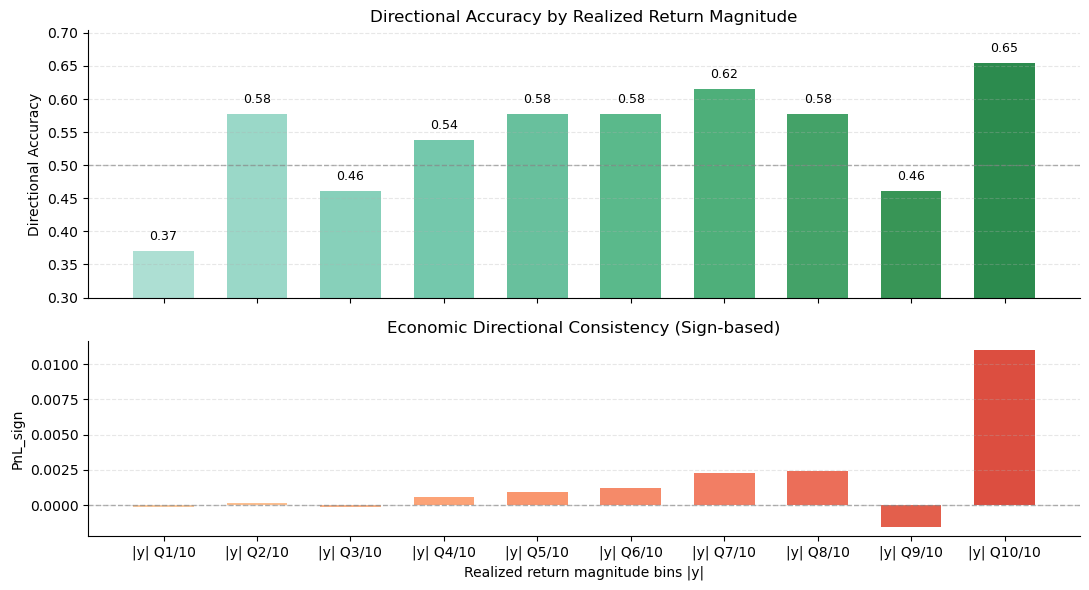

In [70]:
plot_true_magnitude_diag(df['true_mag_table'])

In [72]:
kimson = CTAStrategyEngine(tree = CTA_Trees.load_model("CSI500_UnMasked_IC.joblib"), ticker = 'ic_main', cls = treemodel_factors_augment, strategy = 'raw_ensemble')
kimson.load(remove_columns = ['Phase_Sin', 'HT_DC_Period'],light = False, mask = False)
kimson.compute()

Sign of Ensemble only
=== Backtest summary ===
Sample size        : 260 obs
Directional Acc.   : 0.546
IC (Spearman)      : 0.175
IC (Pearson)       : 0.159
Trade days         : 74
Total turnover     : 147.00 (in units of |Δposition|)
Fee per turnover   : 0.0500%

Strategy (gross):
  Ann. return      : 42.52%
  Ann. vol         : 21.89%
  Sharpe           : 1.94
  Sortino          : 3.29
  Max drawdown     : -14.38%

Strategy (net after fees):
  Ann. return      : 35.39%
  Ann. vol         : 21.94%
  Sharpe           : 1.61
  Sortino          : 2.71
  Max drawdown     : -15.32%

Buy & Hold:
  Ann. return      : 24.21%
  Ann. vol         : 22.00%
  Sharpe           : 1.10
  Sortino          : 1.31
  Max drawdown     : -15.93%


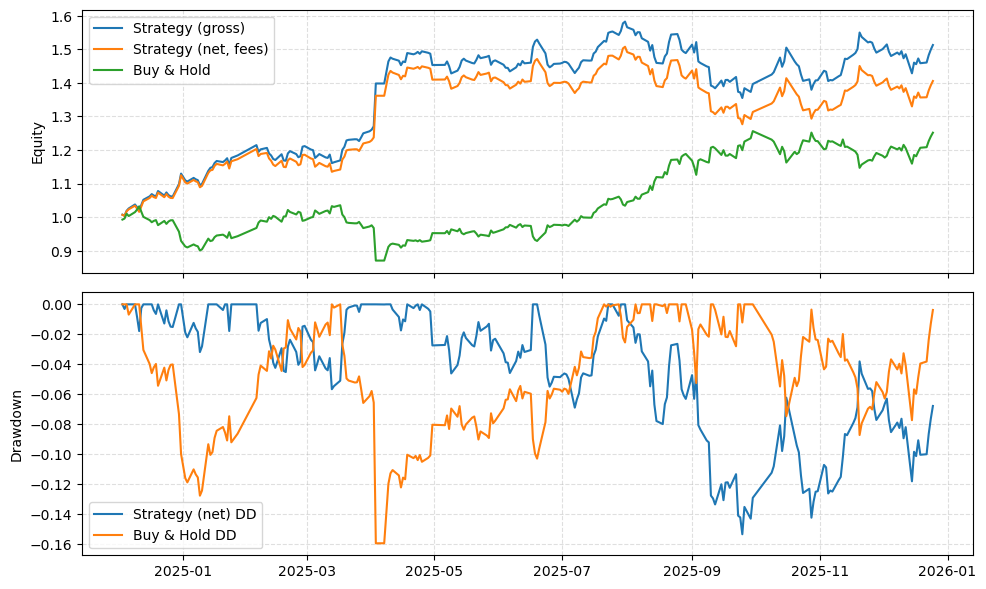

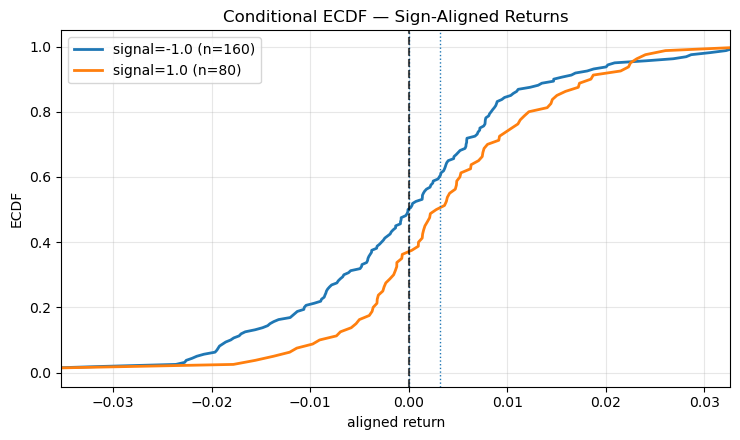

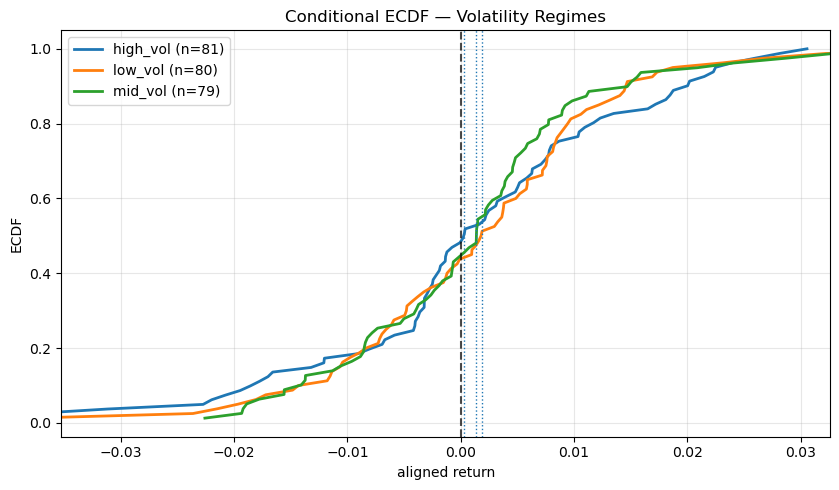

long win: 0.6375
short win: 0.5
long edge: 0.2860684703626401
short edge: 0.00409234121571973


In [73]:
q = kimson.generate(naive_backtest = True)
df_diag, gate_table = diagnose_aligned_ecdf(q, plot=True)

In [74]:
gate_table

n    median      mean  win_rate       p10       p90
vol_regime                                                      
high_vol    81  0.000320  0.001075  0.518519 -0.017761  0.020029
low_vol     80  0.001838  0.002262  0.562500 -0.012043  0.014580
mid_vol     79  0.001388  0.000956  0.556962 -0.013799  0.014756

In practice, both configurations—mask = True (i.e., forward-filling values while excluding roll periods from feature calculation) and discard = True (i.e., explicitly suspending trading around roll events)—exhibit poor performance under IC-optimized settings. This suggests that IC-driven models are particularly sensitive to effective sample loss and boundary distortion introduced by these treatments. By flattening or removing observations near roll events, these configurations reduce the number of informative ranking comparisons available to the model and alter the statistical structure on which IC optimization relies, leading to unstable or degenerate behavior.

在实际评估中，无论采用 mask = True（即在换月区间进行填充但不参与特征计算），还是 discard = True（即在换月附近直接不参与交易），在 IC 优化的模型设定下 均表现出较差的效果。这表明，IC 导向的方法对由此引入的有效样本减少与边界条件改变尤为敏感。换月区间的扁平化处理或直接剔除，会削弱模型可用于排序学习的有效比较数量，并破坏其依赖的统计结构，从而导致模型行为不稳定甚至退化。

**Feature Removal Experiment and Disclaimer**

In [75]:
from factors_utilities import corr_check, factor_summary

In the modeling process, Phase_Sin and HT_DC_Period were deliberately excluded for the structural reasons discussed earlier in Notebook I, and no further systematic feature removal was performed thereafter. This design choice reflects the consideration that, within a bagging framework, feature removal is not a neutral operation; rather, it alters the ensemble’s stochastic mechanism, correlation structure, and the probability with which features are sampled and utilized.

Under the “feature subsampling + multi–base learner aggregation” bagging setting adopted in this study, feature removal is conceptually analogous to adjusting the random seed. While the random seed modifies the sampling path of base learners, removing features reshapes the feature space itself, such that even under identical sampling paths, the learned model structures differ. Both operations effectively modify the internal stochastic trajectory of the ensemble, thereby exerting a material impact on stability.

Accordingly, unless there exists a clear structural justification—such as potential future-information alignment risks, inconsistent handling of window boundaries, or implementation details that induce irreproducible bias—we consider arbitrary feature removal to be inappropriate in a bagging context. It is also important to note that directional instability does not imply that a factor is entirely uninformative: some factors may function as regime or gating variables, exhibiting utility only within specific market conditions while failing to maintain a stable or monotonic relationship over the full sample.

Nevertheless, exploratory experiments were conducted under a controlled setting: the number of estimators was fixed at 200, the parameter grid was held constant, masking was disabled, and only the set of removed features (remove_columns) was varied. All removal rules and thresholds were determined strictly within the training window, and model performance as well as stability metrics were reported on independent validation and test windows, ensuring that no out-of-sample information was used.

Under this setup, we observed pronounced instability in both Spearman IC and directional accuracy, with values oscillating between approximately 0.08 (above baseline) and 0.014. In particular, IV_Parkinson_7 became dominant in certain configurations, delivering strong short-term performance before rapidly collapsing; one variant even exhibited a persistently declining equity curve.

These findings suggest that, within a bagging framework, feature exploration and removal should be kept minimal and conservative, as aggressive pruning can destabilize the ensemble by altering its internal stochastic path. More granular factor selection and attribution are therefore better suited to boosting-based approaches, where marginal contributions can be assessed in a more structured and interpretable manner.

在建模过程中，Phase_Sin 与 HT_DC_Period 因在 Notebook I 中已阐述的结构性原因被有意删除，此后未再进行进一步的系统性因子剔除。该设计选择基于如下考虑：在 bagging 框架 下，因子剔除并非中性操作，而是会改变集成模型的随机机制、相关性结构以及特征被采样与使用的概率分布。

在本研究采用的“特征子采样 + 多基学习器聚合”的 bagging 设定下，删因子与调整随机种子在效果上具有相似性。随机种子改变的是基学习器的采样路径，而因子剔除则直接改变了特征空间本身，使得即便在相同的采样路径下，学习到的模型结构亦会发生变化。二者都会实质性地改变集成内部的随机演化路径，从而对结果稳定性产生显著影响。

因此，除非存在明确的结构性理由（例如潜在的未来信息对齐风险、窗口端点处理不一致，或实现细节导致的不可复现偏差），我们认为在 bagging 体系中不宜随意进行因子剔除。需要强调的是，方向性不稳定并不等价于因子完全无用：部分因子可能更接近于 regime / gating 特征，仅在特定市场区间内发挥作用，而在全样本范围内并不呈现单调或稳定的相关关系。

尽管如此，本文仍进行了探索性实验：在固定 200 个基学习器、保持参数网格不变、关闭 mask 的前提下，仅通过逐步调整 remove_columns 来考察因子剔除的影响。所有剔除规则与阈值均仅在训练窗口内确定，并在独立的验证 / 测试窗口中报告模型表现与稳定性指标，以避免任何形式的样本外信息介入。

实验结果显示，Spearman IC 与方向一致性指标在不同配置下出现显著振荡，数值区间约在 0.08（高于基准）至 0.014 之间波动。其中，IV_Parkinson_7 在部分配置中一度占据主导地位，先带来较强的阶段性表现，随后迅速失效；某一变体甚至呈现出持续下行的权益曲线。

上述现象表明，在 bagging 方法中，因子探索与剔除应保持克制并尽量最小化，否则容易通过改变集成内部随机路径而放大结果的不稳定性。因此，更精细的因子筛选与边际贡献分析，更适合在 boosting 框架下进行，以获得更清晰、可解释的结构性结论。

**Winsorization**

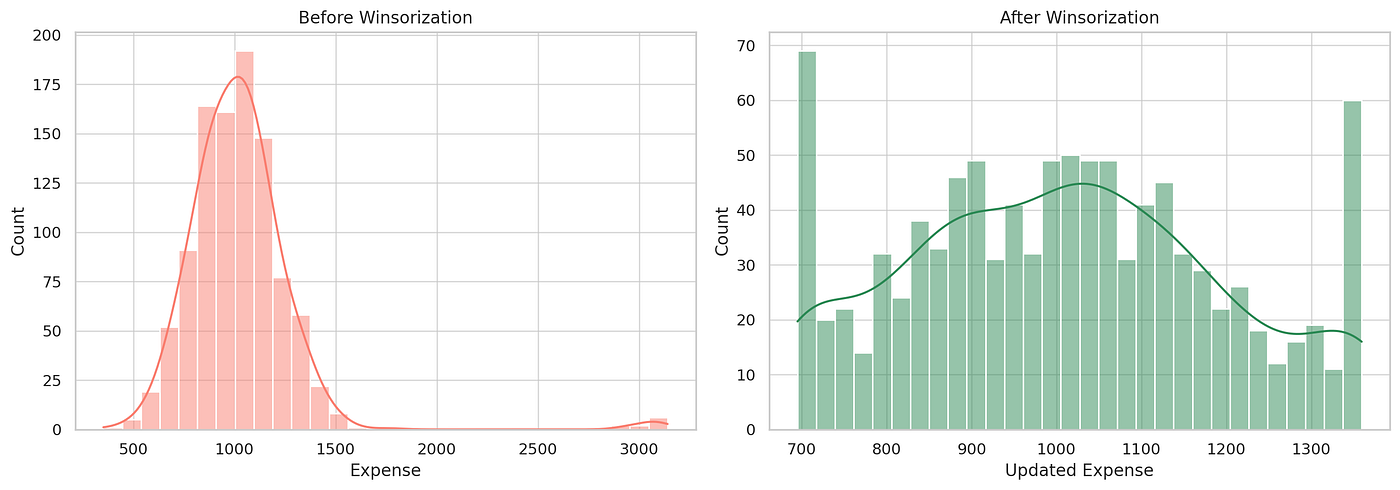

In model training, winsorization is a commonly used robustness technique; however, its application in financial modeling has long been debated. The primary concern is that extreme observations may themselves carry economically meaningful information, such as price jumps, abnormal trading activity, or market movements driven by structural events. Excessive truncation may therefore obscure genuine signals relevant for trading.

Nevertheless, moderate winsorization can still be beneficial. By limiting the disproportionate influence of isolated outliers on the loss function and parameter estimation, it helps the model focus on patterns with stronger generalization properties, rather than being driven by sporadic extreme spikes.

In this study, we adopt a deliberately light-touch and tightly constrained winsorization scheme:
(1) rolling quantile clipping at the 0.5%–99.5% levels;
(2) thresholds computed strictly in time order with a lag-1 structure, ensuring the absence of any form of look-ahead bias;
(3) winsorization applied only to input features, with no modification to the target variables.

This approach preserves the structural information embedded in extreme market conditions while improving training stability, thereby striking a pragmatic balance between statistical robustness and financial interpretability.

在模型训练过程中，Winsorization（温和截尾） 是一种常见的稳健化处理手段；然而在金融建模领域，其使用长期存在争议。主要原因在于，部分极端值本身可能蕴含真实的交易信息，例如价格跳动、异常成交量或由结构性事件驱动的市场行为，过度截尾可能在无意中掩盖这些有效信号。

尽管如此，适度的 winsorization 仍具有实际价值。通过抑制孤立异常点对损失函数与参数估计的过度影响，该方法有助于模型更稳定地学习到具备泛化能力的统计规律，而非被少量尖峰观测所主导。

基于上述权衡，本研究采用了一种极为轻量且约束明确的 winsorization 方案：
（1）使用 0.5%–99.5% 分位数 的滚动窗口进行截尾；
（2）严格按照时间顺序并采用 lag-1 方式计算截尾阈值，以避免任何形式的数据泄露；
（3）仅对模型输入特征进行最小幅度截尾，不对标签变量作任何修改。

这种“轻触式（light-touch）”处理在尽量保留极端行情所反映的结构性信息的同时，提高了模型训练过程的稳定性，在统计稳健性与金融语义完整性之间取得了一种折中平衡。

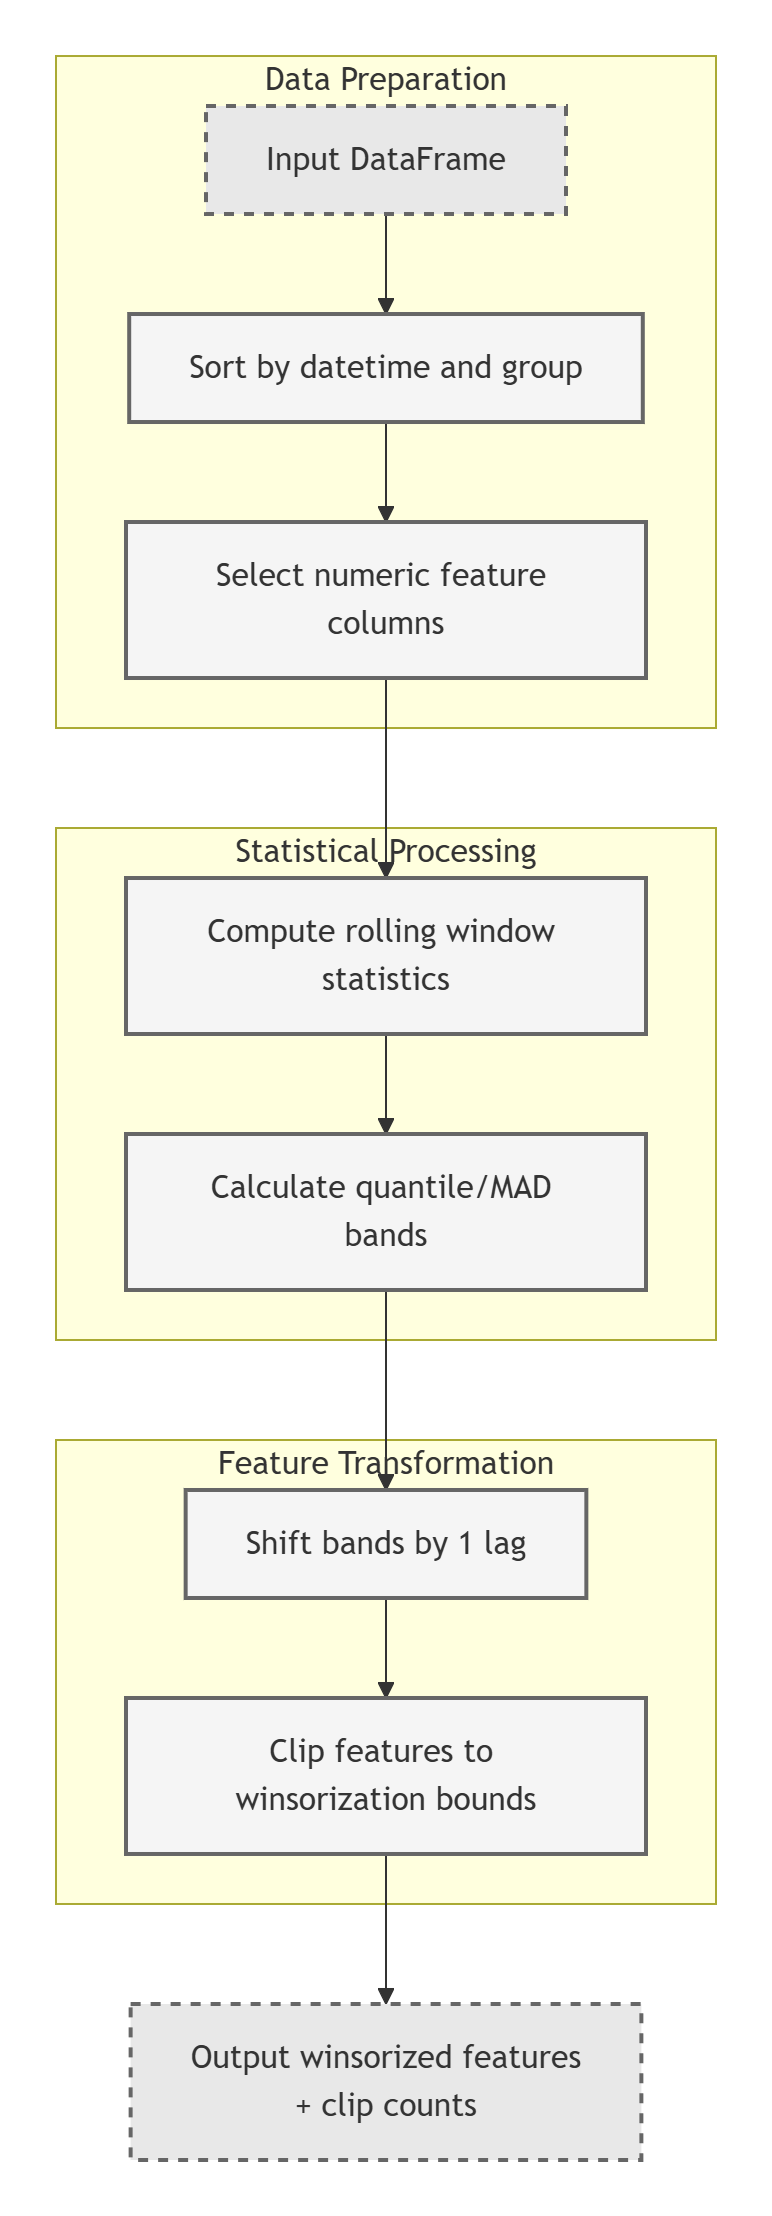

In [76]:
start = time.time()
tr_regress_sampler  = CTA_Trees(ticker='ic_main', cls = treemodel_factors_augment, discard = True, pad = 1)
tr_regress_sampler.load(remove_columns = ['Phase_Sin', 'HT_DC_Period'], light = False, mask = False)
tr_regress_sampler.prep()
tr_regress_sampler.tune(ratio = 0.9, splitter = RollingEmbargoSplit(train_size= 2000, purge_gap = 5,  test_size= 60, step= 65), n = 200, param_grid = {'max_depth': [4, 6, 8, 10, 12], 'min_samples_leaf': [20, 30, 40, 50, 60, 100], 'min_samples_split' : [2,10, 50, 100], 'max_features': ['sqrt']}, winsorize = True)
end = time.time()
print(f"Total runtime: {(end - start)/60:.2f} minutes")

Total runtime: 3.41 minutes


Overall, winsorization does not generate statistically significant positive returns in most configurations. A notable exception arises under the roll-over pass setting—where roll observations are explicitly discarded—in which the portfolio achieves a meaningful excess Sharpe of approximately +0.54. In this case, winsorization primarily serves as a robustification of the remaining sample distribution, rather than as a direct correction for roll-related structural effects.

From this perspective, the result is methodologically reasonable: once roll-induced discontinuities are removed, light-touch winsorization can help suppress residual extreme noise and improve training stability on the effective sample. By contrast, when roll observations are retained, the marginal benefit of winsorization remains limited and does not translate into consistent excess performance.

从整体结果来看，在大多数配置下，winsorization 并未带来显著的正向收益改善。仅在 roll-over pass（即直接丢弃换月观测点）这一设定下，组合表现出显著的超额 Sharpe（约 +0.54）。在该情形中，winsorization 所起的作用更可能是对剩余样本分布的稳健化处理，而非对换月结构本身的修正。

因此，这一结果在逻辑上是可以接受且合理的：当换月带来的结构性扰动已被明确移除后，温和的 winsorization 有助于抑制残余极端噪声，使模型更稳定地利用有效样本；而在包含换月点的设定下，其边际贡献则明显受限，难以形成一致的超额收益。

50
Average Feature Importance Correlation: 0.0913


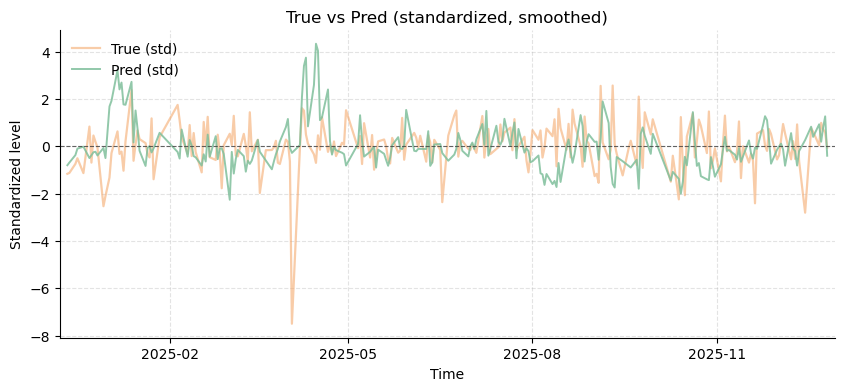

In [77]:
df = tr_regress_sampler.diag(bins = 10)
print(len(tr_regress_sampler.model_logs))
feature_importance_diversity( tr_regress_sampler.artifacts['models'],tr_regress_sampler.last_split['X_train'].columns)

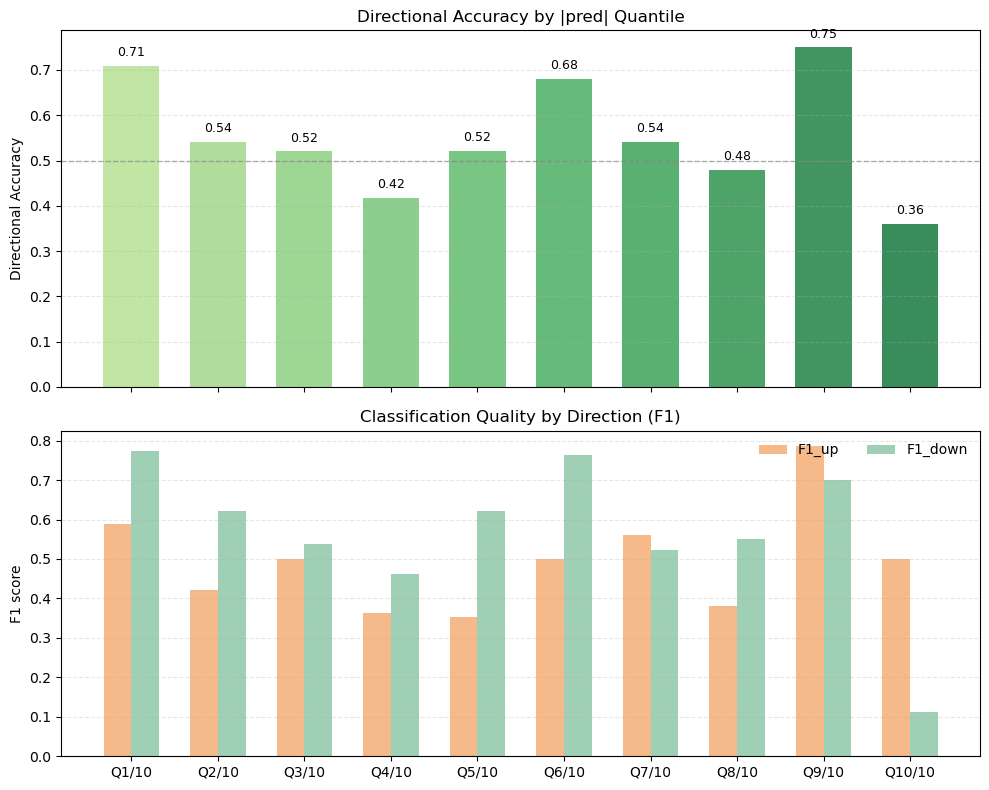

In [78]:
plot_pred_magnitude_diag(df['magnitude_table'])

In [79]:
print(len(tr_regress_sampler.artifacts['pred_avg_te'].unique()))

244


(<Figure size 1000x350 with 1 Axes>,
 <Axes: title={'center': 'Rolling Information Coefficient'}, ylabel='IC'>)

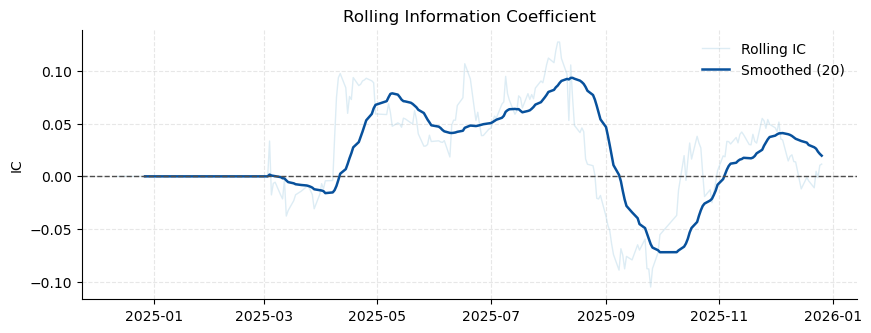

In [80]:
plot_rolling_ic(df['rolling_ic_series'])

Directional accuracy: 0.551
IC(spearman)=0.045 | IC(pearson)=0.062
[Point] DA=0.551 | IC(spear)=0.045 | IC(pear)=0.062
[Rolling IC(spear)@60] mean=0.044 | frac_pos=0.615 | vol=0.090


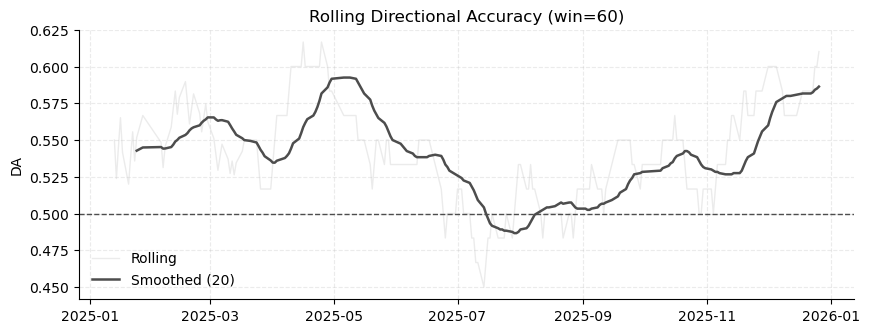

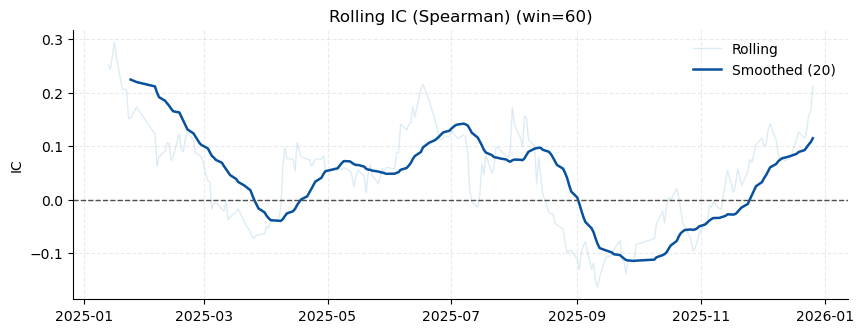

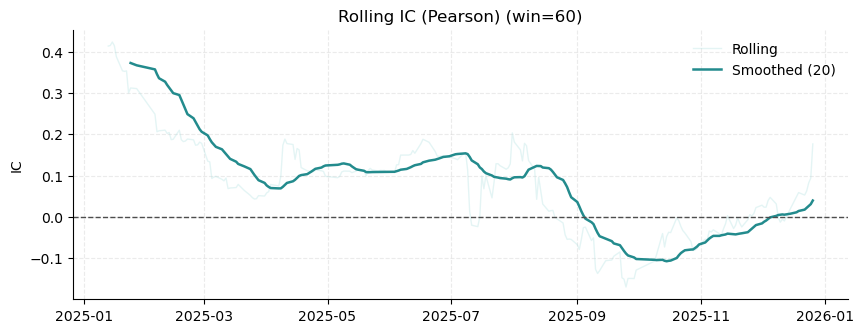

{-10: 0.010254068824062434, -9: -0.031621774066779476, -8: -0.0051472837077241205, -7: -0.004095309009679821, -6: -0.11899784541749545, -5: -0.03752329383636299, -4: -0.11922255594715182, -3: -0.10581255786838586, -2: 0.1015524285988262, -1: 0.04866432163997986, 0: 0.045277127244340354, 1: 0.05786043913217286, 2: 0.09121475876159645, 3: 0.05898374541339461, 4: 0.05453480095140539, 5: -0.044774269540452154, 6: -0.06278910059866329, 7: 0.032290109779161615, 8: 0.04407144846097313, 9: -0.021251629726205996, 10: -0.017980795571883146}


In [81]:
tr_regress_sampler.naive_back_track()
print(df['lag_ic'])

Overall, the discriminative power in the upper predictive quantiles deteriorates noticeably. This effect may be partly attributable to winsorization: in futures markets, roll events are often associated with extreme observations and abnormal volatility, and even light-touch clipping can compress the tails of the predictive distribution. As a result, while winsorization reduces noise, it may also attenuate the model’s ability to differentiate extreme market states, particularly when roll observations are retained.

总体而言，预测值在高分位区间的区分能力出现明显衰退。这一现象可能与 winsorization 的作用有关：在期货数据中，换月过程往往伴随着更高频率的极端值与异常波动，而温和截尾在抑制这些极端观测的同时，也可能压缩了预测分布的尾部差异。因而，在包含换月观测的设定下，winsorization 可能在降低噪声的同时，削弱了模型对极端行情的刻画能力。

In [82]:
models = tr_regress_sampler.artifacts["models"]
feature_names = tr_regress_sampler.last_split["X_train"].columns
split_imp = tree_split_frequency(models, feature_names)
print(split_imp.head(5))

                          split_count  split_frac
ret7                               31    0.038462
open_interest                      23    0.028536
Open_Gap                           21    0.026055
volume_shock_over_vol_10           20    0.024814
close                              18    0.022333


In [83]:
print(df['rolling_ic_summary'])

{'roll_ic_mean': 0.022381675266623904, 'roll_ic_median': 0.018710152216581136, 'roll_ic_q25': 0.0, 'roll_ic_q75': 0.053150076619954335, 'roll_ic_frac_pos': 0.5655737704918032, 'roll_ic_vol': 0.04586234182305858, 'roll_ic_mdd': -0.23182271957016135, 'roll_ic_acf1': 0.9595616626246702, 'roll_ic_half_life': 16.79188484005227}


The rolling IC is weak in magnitude and unstable. Although both the mean and median are positive, the signal exhibits high variability and pronounced drawdowns, indicating intermittent and regime-dependent predictive behavior rather than a stable, persistent effect.

滚动 IC 表现整体偏弱且稳定性不足。尽管均值与中位数为正，但幅度较小、波动较大，并伴随明显回撤，表明预测能力具有间歇性与显著的阶段依赖特征，难以视为稳定、持续的信号

In [84]:
df['magnitude_table']

bin   n  n_eff  pred_up  pred_down  abs_pred_min  abs_pred_max  \
0   Q1/10  24     24        9         15      0.000003      0.000144   
1   Q2/10  24     24        8         16      0.000144      0.000200   
2   Q3/10  25     25       10         15      0.000208      0.000307   
3   Q4/10  24     24        6         18      0.000313      0.000454   
4   Q5/10  24     23        4         20      0.000459      0.000604   
5   Q6/10  25     25        7         18      0.000604      0.000797   
6   Q7/10  24     24        9         15      0.000824      0.001016   
7   Q8/10  25     25        8         17      0.001030      0.001370   
8   Q9/10  24     24       11         13      0.001380      0.001894   
9  Q10/10  25     25       16          9      0.001907      0.005313   

         DA        IC  tp  tn  fp  fn   prec_up    rec_up     f1_up  \
0  0.708333  0.467826   5  12   4   3  0.555556  0.625000  0.588235   
1  0.541667 -0.338261   4   9   4   7  0.500000  0.363636  0.421053   
2  0.520000  0.121538   6   7   4   8  0.600000  0.428571  0.500000   
3  0.416667  0.171304   4   6   2  12  0.666667  0.250000  0.363636   
4  0.521739  0.413043   3   9   1  10  0.750000  0.230769  0.352941   
5  0.680000  0.171538   4  13   3   5  0.571429  0.444444  0.500000   
6  0.541667 -0.093043   7   6   2   9  0.777778  0.437500  0.560000   
7  0.480000  0.158462   4   8   4   9  0.500000  0.307692  0.380952   
8  0.750000  0.182609  11   7   0   6  1.000000  0.647059  0.785714   
9  0.360000 -0.085385   8   1   8   8  0.500000  0.500000  0.500000   

   prec_down  rec_down   f1_down  lift_vs_base  
0   0.800000  0.750000  0.774194      0.156893  
1   0.562500  0.692308  0.620690     -0.009774  
2   0.466667  0.636364  0.538462     -0.031440  
3   0.333333  0.750000  0.461538     -0.134774  
4   0.473684  0.900000  0.620690     -0.029701  
5   0.722222  0.812500  0.764706      0.128560  
6   0.400000  0.750000  0.521739     -0.009774  
7   0.470588  0.666667  0.551724     -0.071440  
8   0.538462  1.000000  0.700000      0.198560  
9   0.111111  0.111111  0.111111     -0.191440

In [85]:
print(df['residuals']['summary'])

{'acf@lags': {1: 0.011729139605329219, 5: 0.037610720146917805, 10: 0.09194033484986414, 20: -0.028340793171904216}, 'acf_sq@lags': {1: -0.026543856232817575, 5: -0.02339521046278034, 10: 0.05553421611514148, 20: -0.014532002952263071}, 'ljungbox_Q': {1: 0.03381656439438709, 5: 4.021496452623846, 10: 7.657690608173871, 20: 13.237943136948239}, 'ljungbox_p': {1: 0.8540975479179845, 5: 0.5463251567107168, 10: 0.6622332200096253, 20: 0.86694305849695}, 'arch_lm': 2.3320001636666383, 'arch_p': 0.9999995543357046}


The strong backtest performance of the sign-only ensemble is primarily driven by a pronounced asymmetry in conditional payoffs, with the long side exhibiting a stable and statistically significant edge while short signals remain largely neutral. This variance-compressed aggregation yields high Sharpe and controlled drawdowns despite only moderate IC and directional accuracy. However, the resulting performance relies heavily on a single directional mechanism and masks underlying signal instability, limiting robustness and extensibility. Accordingly, this configuration is best viewed as a proof of exploitable structure, motivating further development toward synthesized, confidence-aware ensemble constructions.

该 sign-only 集成模型 所展现出的强劲回测表现，主要来源于条件收益分布中的显著非对称性：多头方向具有稳定且统计显著的正向边际优势，而空头信号整体上接近中性。通过对模型输出进行符号化聚合，该方法在压缩预测方差的同时，尽管 IC 与方向一致性指标仅处于中等水平，仍能实现较高的 Sharpe 比率与受控的回撤。

然而，该表现高度依赖于单一方向性的收益机制，并在一定程度上掩盖了底层信号的不稳定性，从而限制了模型在不同市场环境下的稳健性与可扩展性。因此，更合理的理解是：该配置验证了市场中存在可被利用的结构性信息，而非构成最终可推广的建模方案，这也进一步促使我们向合成化、置信度感知（confidence-aware）的集成方法发展。

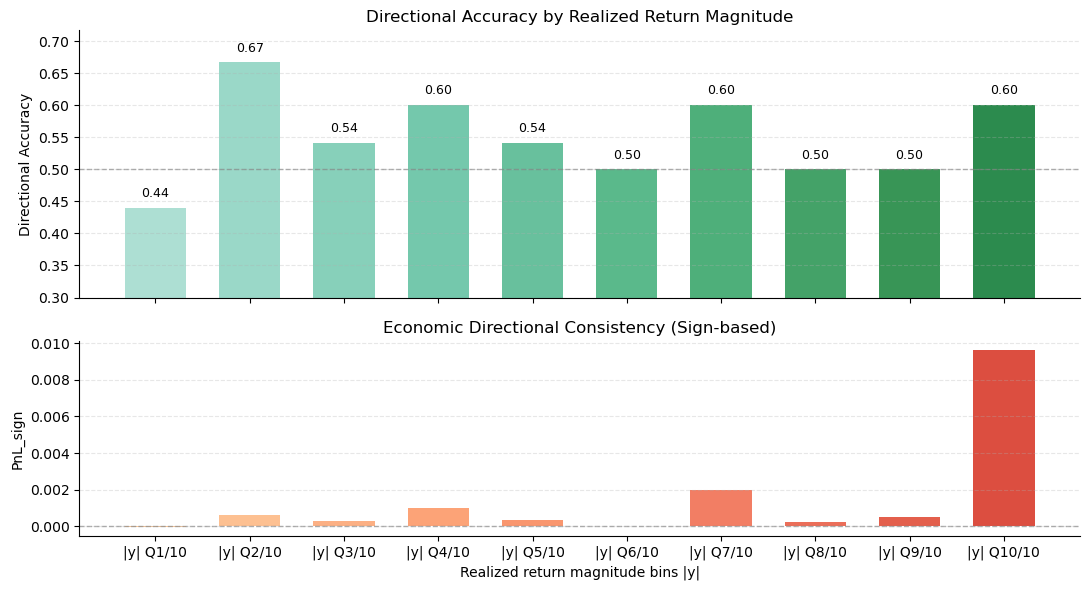

In [86]:
plot_true_magnitude_diag(df['true_mag_table'])

Sign of Ensemble only
=== Backtest summary ===
Sample size        : 253 obs
Directional Acc.   : 0.553
IC (Spearman)      : 0.134
IC (Pearson)       : 0.137
Trade days         : 66
Total turnover     : 131.00 (in units of |Δposition|)
Fee per turnover   : 0.0500%

Strategy (gross):
  Ann. return      : 40.06%
  Ann. vol         : 22.08%
  Sharpe           : 1.81
  Sortino          : 3.23
  Max drawdown     : -14.23%

Strategy (net after fees):
  Ann. return      : 33.54%
  Ann. vol         : 22.10%
  Sharpe           : 1.52
  Sortino          : 2.68
  Max drawdown     : -15.80%

Buy & Hold:
  Ann. return      : 21.70%
  Ann. vol         : 22.18%
  Sharpe           : 0.98
  Sortino          : 1.17
  Max drawdown     : -15.93%


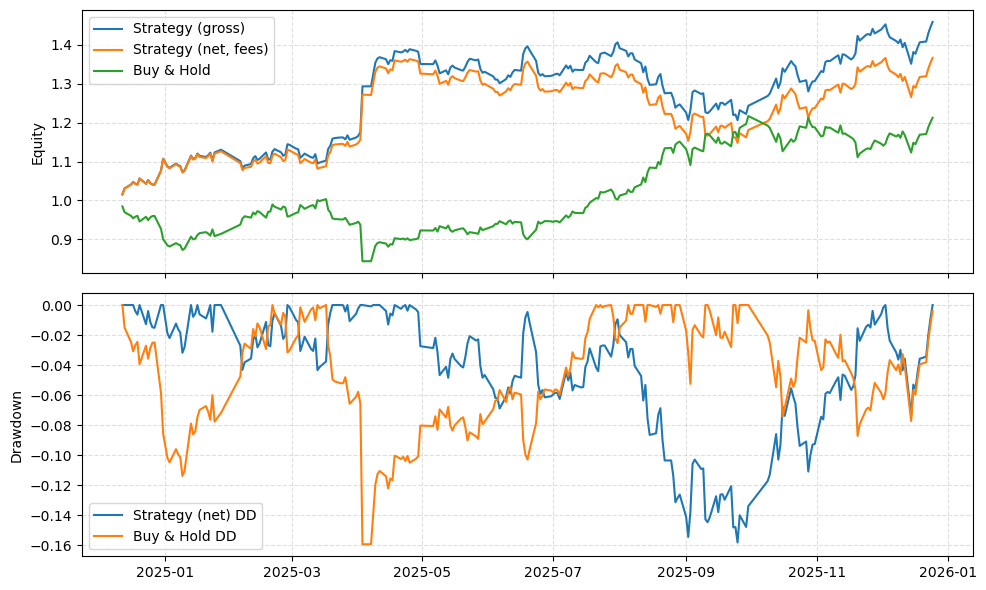

In [87]:
kimson = CTAStrategyEngine(tree = CTA_Trees.load_model("winsor_discard.joblib"), ticker = 'ic_main', cls = treemodel_factors_augment, strategy = 'raw_ensemble', discard = True, pad = 1)
kimson.load(remove_columns = ['Phase_Sin', 'HT_DC_Period'],light = False, mask = False)
kimson.compute()
q = kimson.generate(naive_backtest = True)

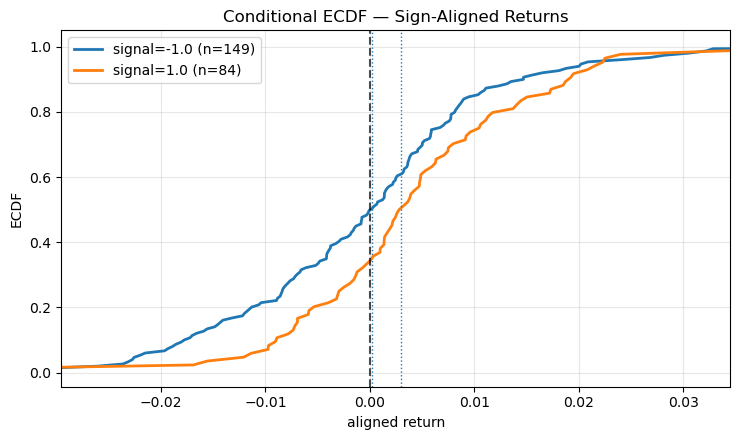

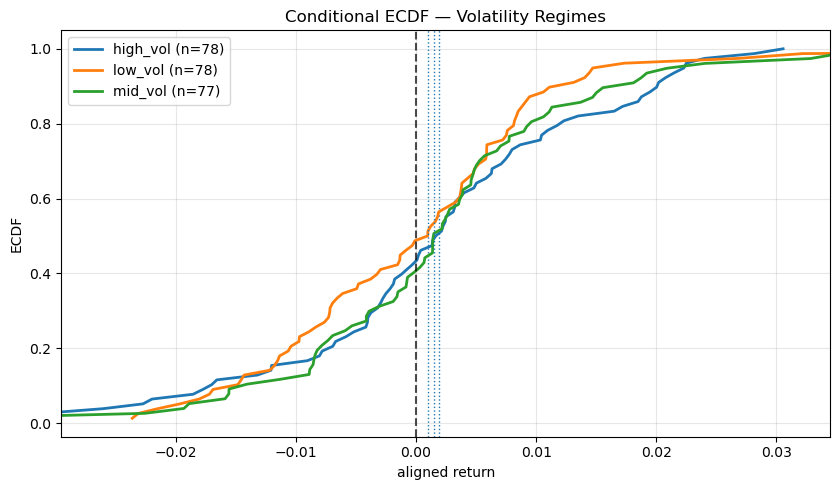

long win: 0.6666666666666666
short win: 0.5033557046979866
long edge: 0.2613903931645232
short edge: 0.013410166914122106


n    median      mean  win_rate       p10       p90
vol_regime                                                      
high_vol    78  0.001878  0.001743  0.576923 -0.016721  0.020080
low_vol     78  0.000975  0.000597  0.512821 -0.014649  0.011707
mid_vol     77  0.001480  0.001912  0.597403 -0.012416  0.016574

In [88]:
df_diag, gate_table = diagnose_aligned_ecdf(q, plot=True)
gate_table

#### **Strategy Augment - DA**

Previously, ensemble construction relied on simple equal-weight averaging and served as a baseline aggregation scheme.
In this study, we investigate an experimental directional-accuracy–weighted ensemble, in which individual model contributions are dynamically adjusted according to rolling directional accuracy (DA).

To enforce strict temporal causality between predictions and realized returns, all rolling performance diagnostics are shifted by two periods. This design eliminates any potential look-ahead bias in the aggregation of model-level statistics. However, the additional lag introduced by this procedure inevitably reduces short-horizon responsiveness and may weaken performance in fast-moving regimes.

Consequently, this ensemble should be interpreted primarily as a robustness and diagnostic experiment, rather than as a latency-optimal trading strategy. Its objective is to evaluate whether adaptive reweighting based on historical directional performance can stabilize aggregated signals in environments with high inter-model correlation, rather than to outperform the strongest individual model in terms of standalone returns.

在此前的研究中，集成模型主要采用等权平均作为基准构造方式。
在本研究中，我们进一步探索了一种基于方向准确率（Directional Accuracy, DA）的实验性加权集成方法，通过滚动窗口下的方向准确率对各基模型的贡献进行动态调整。

为确保预测信号与实际收益之间的时间因果关系严格成立，所有滚动统计量均采用两期滞后（shift = 2）处理。该设计可以有效避免在模型层面聚合统计指标时引入任何潜在的前视偏差，但其代价是引入额外的信号滞后，从而可能削弱策略在短周期或快速变化行情下的响应能力。

因此，该集成方案应被视为一种稳健性与诊断性实验，而非以时效性或收益最大化为目标的交易策略。其主要目的在于检验：在基模型高度相关的情形下，基于历史方向表现的自适应加权是否能够提升集成信号的稳定性，而非追求单独超越最优基模型的收益表现。

Directional Weighted Strategy, threshold will be 0
=== Backtest summary ===
Sample size        : 260 obs
Directional Acc.   : 0.542
IC (Spearman)      : 0.123
IC (Pearson)       : 0.122
Trade days         : 86
Total turnover     : 171.00 (in units of |Δposition|)
Fee per turnover   : 0.0500%

Strategy (gross):
  Ann. return      : 33.79%
  Ann. vol         : 21.95%
  Sharpe           : 1.54
  Sortino          : 2.67
  Max drawdown     : -10.30%

Strategy (net after fees):
  Ann. return      : 25.50%
  Ann. vol         : 22.01%
  Sharpe           : 1.16
  Sortino          : 1.98
  Max drawdown     : -10.57%

Buy & Hold:
  Ann. return      : 24.21%
  Ann. vol         : 22.00%
  Sharpe           : 1.10
  Sortino          : 1.31
  Max drawdown     : -15.93%


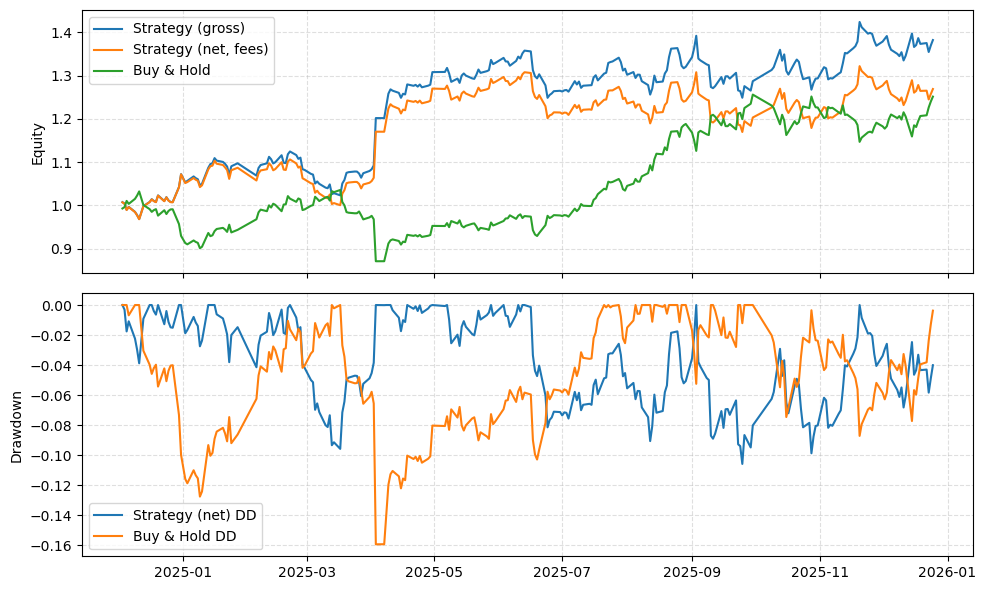

In [89]:
kimson = CTAStrategyEngine(tree = CTA_Trees.load_model("CSI500_Unmasked.joblib"), ticker = 'ic_main', cls = treemodel_factors_augment, strategy = 'direction')
kimson.load(remove_columns = ['Phase_Sin', 'HT_DC_Period'],light = False, mask = False)
kimson.compute()
q = kimson.generate(naive_backtest = True)

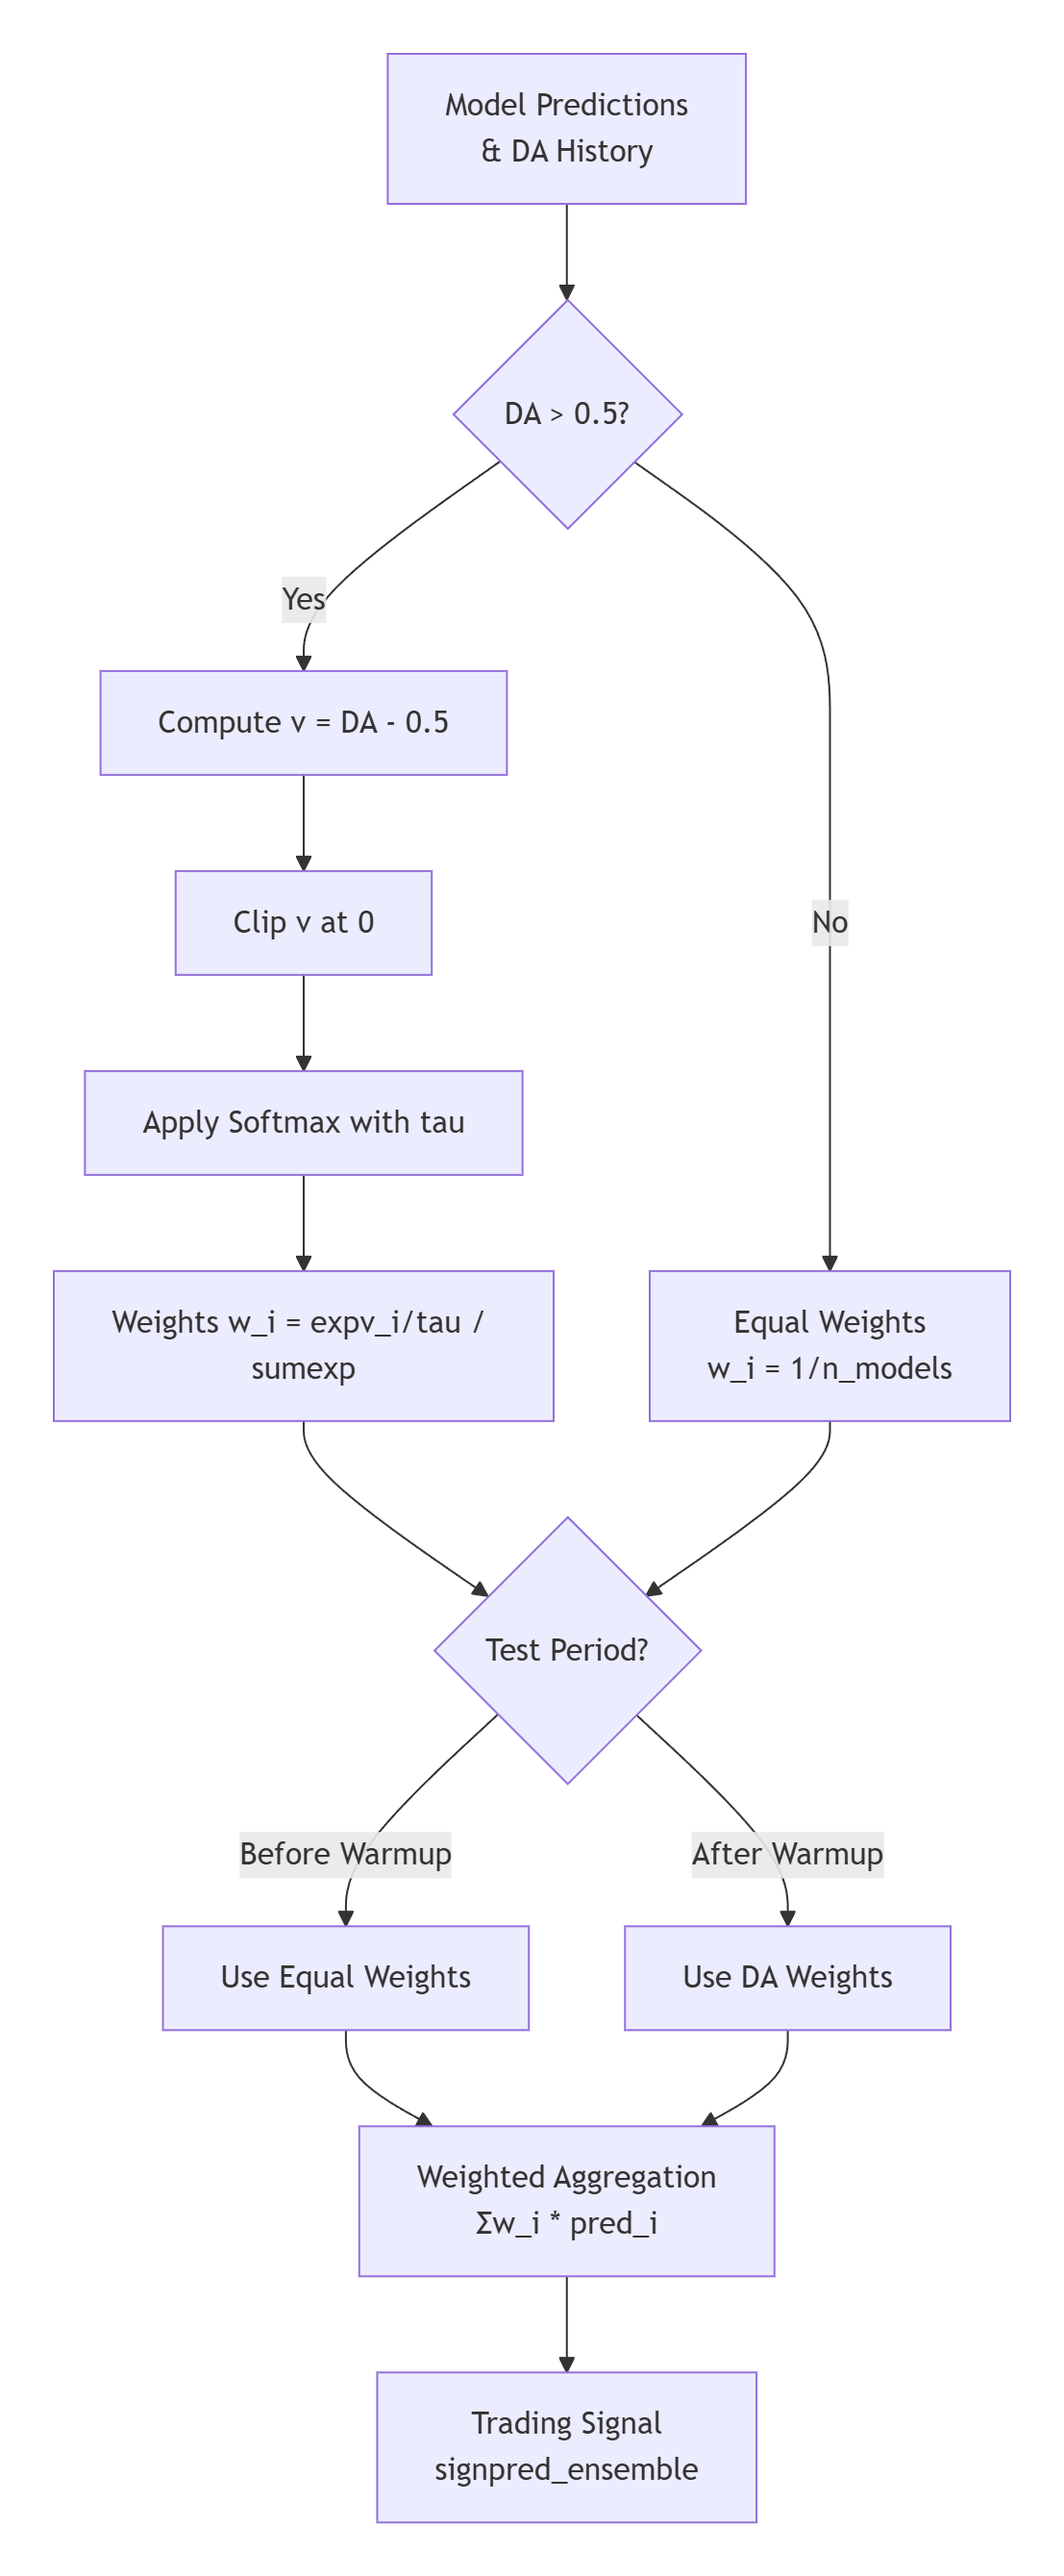

From the results, we observe that the sign-only ensemble already captures the dominant directional structure shared by the underlying models, with the majority of the predictive edge coming from the long side.

Introducing adaptive weighting based on directional accuracy (DA) does not enhance model discrimination, as DA shows limited dispersion across models and adjusts slowly over time due to its rolling and lagged nature. As a result, DA-based weighting fails to meaningfully differentiate stronger models from weaker ones in real time.

Instead, the DA weighting mechanism mainly behaves as a shrinkage operator, dampening overall exposure without providing corresponding improvements in signal timing, stability, or risk-adjusted performance. Consequently, the adaptive weighting scheme does not outperform the simpler sign-only aggregation and, in practice, leads to diluted returns.

从结果可以看出，仅基于方向符号的集成方式已经有效捕捉了各基模型共有的主要方向性结构，且策略的大部分收益优势主要来源于做多方向。

在此基础上，引入基于方向准确率（DA）的自适应加权，并未显著提升模型之间的区分能力。这是因为各模型之间的 DA 差异本身较小，同时 DA 作为一种滚动、滞后的统计量，其调整速度较慢，难以及时反映模型真实的相对优劣。

因此，DA 加权在实际效果上更多体现为一种收缩（shrinkage）机制：降低了整体有效仓位，但并未带来相应的择时改进、稳定性提升或风险收益比改善。最终结果是，该加权方案反而稀释了原有集成信号的有效性，其表现不如更简单的 sign-only 集成方式。

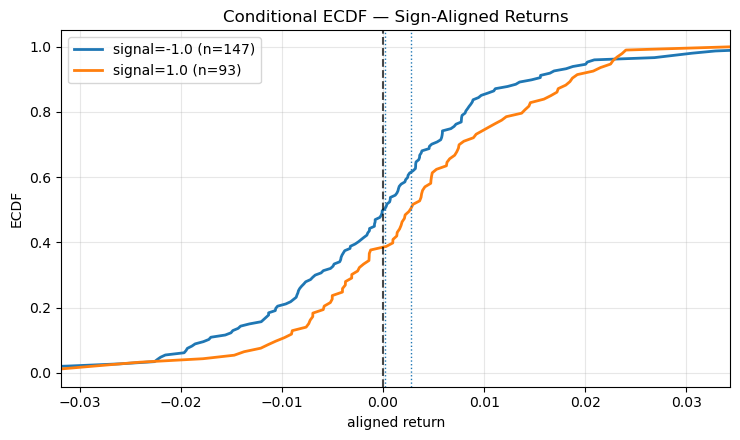

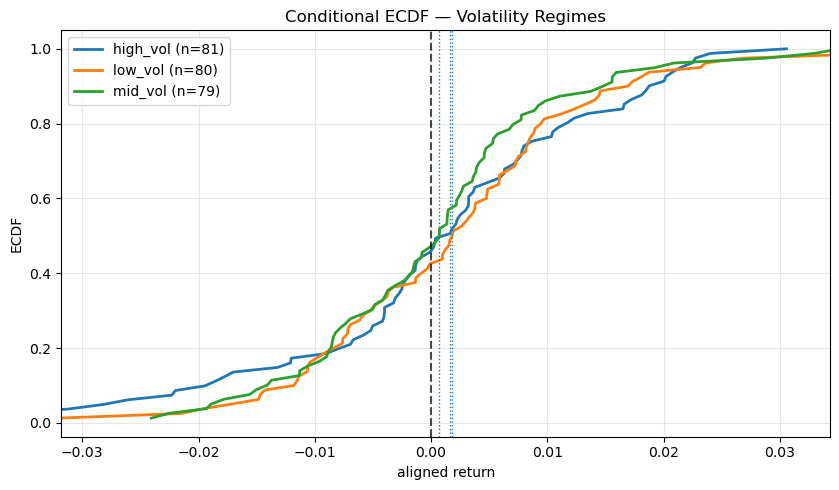

long win: 0.6236559139784946
short win: 0.5034013605442177
long edge: 0.2372500119839381
short edge: 0.01330136346891144


n    median      mean  win_rate       p10       p90
vol_regime                                                      
high_vol    81  0.001641  0.000702  0.543210 -0.018573  0.018764
low_vol     80  0.001838  0.002720  0.575000 -0.011556  0.016948
mid_vol     79  0.000712  0.000396  0.531646 -0.013799  0.014861

In [90]:
df_diag, gate_table = diagnose_aligned_ecdf(q, plot=True)
gate_table

#### **Votings**

**Directions**

In [91]:
from cta_confidence import backtest

While the concept of an ensemble of ensembles is not conceptually problematic, it becomes effective only when the constituent ensembles encode genuinely different information. In this work, we conduct a limited exploratory analysis of such a structure. However, we strongly caution that meaningful gains are typically observed only in settings with substantial heterogeneity across ensembles, such as feature-boosting or multi-view learning scenarios. In environments dominated by highly correlated predictors, further ensembling tends to act as a shrinkage mechanism rather than an additional source of alpha. 

“集成的集成”这一思想本身并不反常，其有效性关键取决于底层集成之间的信息差异与独立性。只有当底层集成模型基于显著不同的特征空间、学习目标、时间尺度或模型结构构建时，第二层集成才可能发挥真正的风险分散与结构整合作用。

在本文中，我们对集成的集成结构进行了探索性尝试。然而需要强调的是，该方法更适用于低相关、误差互补的情形，例如在特征增强（feature boosting）框架下，不同特征子集刻画不同市场结构。当底层集成模型之间高度相关、信息重叠严重时，额外的集成层往往难以带来实质性收益，反而可能稀释原有信号。

In [92]:
from meta_signal import collect_engine_signals, sign_consensus, sharpe_strategy, append_signal_to_file

In [93]:
model_01 =  CTAStrategyEngine(tree = CTA_Trees.load_model("CSI500_Unmasked.joblib"), ticker = 'ic_main', cls = treemodel_factors_augment, strategy = 'raw_ensemble')
model_01.load(remove_columns = ['Phase_Sin', 'HT_DC_Period'],light = False, mask = False)
model_01.compute()

In [94]:
model_02 =  CTAStrategyEngine(tree = CTA_Trees.load_model("CSI500_500Masked.joblib"), ticker = 'ic_main', cls = treemodel_factors_augment, strategy = 'raw_ensemble')
model_02.load(remove_columns = ['Phase_Sin', 'HT_DC_Period'],light = False, mask = True)
model_02.compute()

In [95]:
model_03 =  CTAStrategyEngine(tree = CTA_Trees.load_model("CSI500_UnMasked_IC.joblib"), ticker = 'ic_main', cls = treemodel_factors_augment, strategy = 'raw_ensemble')
model_03.load(remove_columns = ['Phase_Sin', 'HT_DC_Period'],light = False, mask = True)
model_03.compute()

In [96]:
engines = [model_01, model_02, model_03]

Although the constituent engines exhibit strong standalone performance, their high pairwise correlations indicate that bagging has largely exhausted the available diversity within the current feature space. In this setting, additional aggregation layers do not introduce new information, but instead re-average an already stabilized signal. As a result, ensemble-of-ensemble constructions primarily reduce effective exposure rather than improve robustness or timing.

值得注意的是，各子引擎本身均具有较强的单体表现，而其高度相关性恰恰反映了 bagging 机制在当前特征空间内已充分收敛并提取了主要有效结构。在此背景下，进一步引入“集成的集成”并不会带来新的信息增量，而更多表现为对既有稳定信号的再平均与收缩，从而压缩有效暴露而非提升策略稳健性或择时能力。

In [97]:
P, y = collect_engine_signals(engines)
P.corr()

engine_0  engine_1  engine_2
engine_0  1.000000  0.872313  0.849448
engine_1  0.872313  1.000000  0.869129
engine_2  0.849448  0.869129  1.000000

| Strategy                | Number of Engines | Ensemble Level            | Ann. Return | Ann. Vol   | Sharpe   | Max DD      | IC (Spearman) | DA        | Turnover      | Commentary                                                                                                                                                                 |
| ----------------------- | --------- | ------------------------- | ----------- | ---------- | -------- | ----------- | ------------- | --------- | ------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Engine 01 (Sign-only)   | 1         | Single-engine             | 32.68%      | 21.97%     | 1.49     | -10.57%     | 0.149         | 0.550     | High (171)    | Strong directional signal with stable long-side edge; performance driven by one dominant model.                                                                            |
| Engine 02 (Sign-only)   | 1         | Single-engine             | 35.39%      | 21.94%     | 1.61     | -15.32%     | **0.175**     | 0.546     | Medium (147)  | Highest standalone IC; more aggressive exposure leads to larger drawdowns under adverse regimes.                                                                           |
| Engine 03 (Sign-only)   | 1         | Single-engine             | 30.70%      | 21.87%     | 1.40     | -11.40%     | 0.115         | 0.542     | Low (135)     | More conservative engine; weaker signal strength but relatively controlled risk.                                                                                           |
| **Meta Sign Consensus** | **3**     | **Ensemble of ensembles** | **38.86%**  | **21.84%** | **1.78** | **-12.75%** | **0.163**     | 0.546 | Medium (149) | Directional voting across engines improves risk-adjusted returns by filtering timing-specific errors; gains arise from robustness rather than stronger raw predictability. |

In [98]:
signal, confidence = sign_consensus(P)
meta_df = pd.DataFrame({"y": y, "signal": signal, "confidence": confidence, "pred": P.mean(axis=1), } ,index=P.index)

=== Backtest summary ===
Name: Meta Sign Consensus (3 Engines)
Sample size        : 261 obs
Directional Acc.   : 0.546
IC (Spearman)      : 0.163
IC (Pearson)       : 0.166
Trade days         : 75
Total turnover     : 149.00 (in units of |Δposition|)
Fee per turnover   : 0.0500%

Strategy (gross):
  Ann. return      : 46.05%
  Ann. vol         : 21.82%
  Sharpe           : 2.11
  Sortino          : 3.80
  Max drawdown     : -11.87%

Strategy (net after fees):
  Ann. return      : 38.86%
  Ann. vol         : 21.84%
  Sharpe           : 1.78
  Sortino          : 3.18
  Max drawdown     : -12.75%

Buy & Hold:
  Ann. return      : 24.12%
  Ann. vol         : 21.96%
  Sharpe           : 1.10
  Sortino          : 1.31
  Max drawdown     : -15.93%


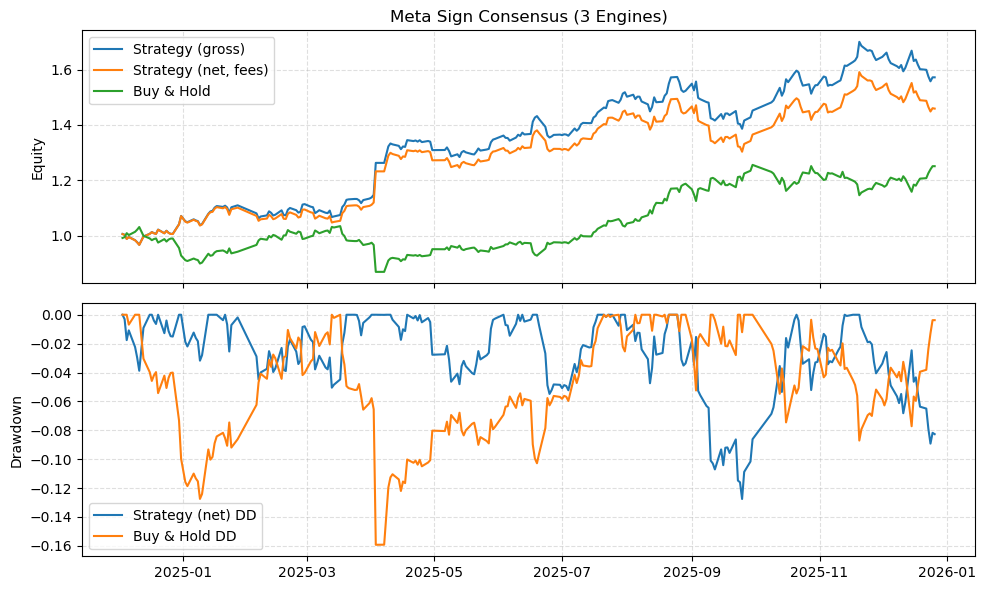

In [100]:
stats = backtest(meta_df,col_ret="y", col_signal="signal", cutoff_dt=model_01.cutoff_dt,title="Meta Sign Consensus (3 Engines)")

While sharing the same underlying directional structure, the engines exhibit systematic differences in entry timing and in their responses to regime transitions. Although pairwise signal correlations are high, the associated errors are not perfectly correlated, allowing a sign-based meta-consensus to effectively cancel conditional timing errors. Consequently, the ensemble does not improve raw predictive power (with IC and DA remaining broadly stable), but achieves a materially higher risk-adjusted performance through variance compression and improved drawdown characteristics. Fundamentally, this improvement reflects enhanced model robustness rather than a direct increase in predictability, and its effectiveness is not guaranteed to persist uniformly across all market regimes.

在共享相同方向性结构的前提下，各引擎在入场时点选择及对行情切换的响应上仍存在系统性差异。尽管引擎间信号相关性较高，但其误差并非完全相关，使得基于符号一致性的元集成能够有效抵消条件性时点误差。因此，该集成并未提升信号的原始预测能力（IC 与 DA 基本保持稳定），而是通过压缩收益方差与改善回撤特征，显著提升了风险调整后表现。本质上，该改进来源于模型鲁棒性的增强，而非预测力的直接增强，且其有效性并不保证在所有市场环境中恒定成立。

**Sharpe Weighted**

Sharpe-weighted allocation is a commonly used heuristic ensemble weighting scheme, whose core idea is to dynamically adjust model weights according to their recent risk-adjusted performance. In contrast, equal-weighted schemes ignore relative performance differences across models and mainly serve as a robust, low-assumption baseline. Volatility-based weighting, on the other hand, is typically designed for asset-level risk allocation; when applied to multiple model signals on the same underlying instrument, it is not equivalent to classical risk-parity construction.

In our implementation, Sharpe ratios are computed on rolling realized returns generated by directional model signals. As a result, Sharpe is not used as an objective in a mean–variance optimization framework—where assets are assumed to be independent sources of return—but rather as a performance-based gating and weighting mechanism at the model level. Specifically, only models with positive Sharpe are retained, with weights normalized cross-sectionally and smoothed over time to mitigate short-term estimation noise. A cold-start period and delayed weight application are explicitly enforced, with equal weighting adopted as a prior during early stages, ensuring causal deployment and reducing the risk of early overfitting.

When enabled, volatility normalization is applied solely at the signal level to control for heterogeneity in prediction scale, rather than to perform asset-level volatility or risk-budget allocation. Overall, this ensemble design prioritizes robustness and directional consistency of combined signals over aggressive amplification of short-term returns.

Sharpe 加权是一种常见的集成权重构造启发式方法，其核心思想是根据模型在近期样本中的风险调整后表现，对不同模型的权重进行动态分配。相比之下，等权方案不区分模型间的绩效差异，主要作为稳健、低假设的基准方法；而基于波动率的加权通常用于资产层面的风险分配，在同一标的下对多模型信号进行加权时，并不等价于经典意义上的风险平价配置。

在本实现中，Sharpe 比率是基于信号方向对应的实际收益进行滚动计算的，其作用并非作为均值–方差框架下的最优化目标（该框架通常假设资产为相互独立的收益来源），而更接近于一种模型绩效筛选与权重门控机制。具体而言，仅保留 Sharpe 为正的模型参与加权，并在横截面上进行归一化与指数平滑，以降低短期噪声对权重估计的影响。同时显式引入冷启动窗口与权重延迟应用机制，在样本初期采用等权作为先验配置，从而确保因果性并避免前视偏差与早期过拟合。

此外，可选的波动率归一化仅作用于信号层面，用于缓解不同模型预测尺度不一致的问题，而非进行资产层面的波动率或风险预算配置。整体而言，该集成设计更侧重于提升模型组合在方向层面的稳健性与一致性，而非追求对短期收益的激进放大。

=== Backtest summary ===
Name: Meta ensemble (Sharpe)
Sample size        : 261 obs
Directional Acc.   : 0.542
IC (Spearman)      : 0.163
IC (Pearson)       : 0.160
Trade days         : 68
Total turnover     : 135.00 (in units of |Δposition|)
Fee per turnover   : 0.0500%

Strategy (gross):
  Ann. return      : 44.26%
  Ann. vol         : 21.83%
  Sharpe           : 2.03
  Sortino          : 3.60
  Max drawdown     : -10.12%

Strategy (net after fees):
  Ann. return      : 37.74%
  Ann. vol         : 21.86%
  Sharpe           : 1.73
  Sortino          : 3.06
  Max drawdown     : -10.57%

Buy & Hold:
  Ann. return      : 24.12%
  Ann. vol         : 21.96%
  Sharpe           : 1.10
  Sortino          : 1.31
  Max drawdown     : -15.93%


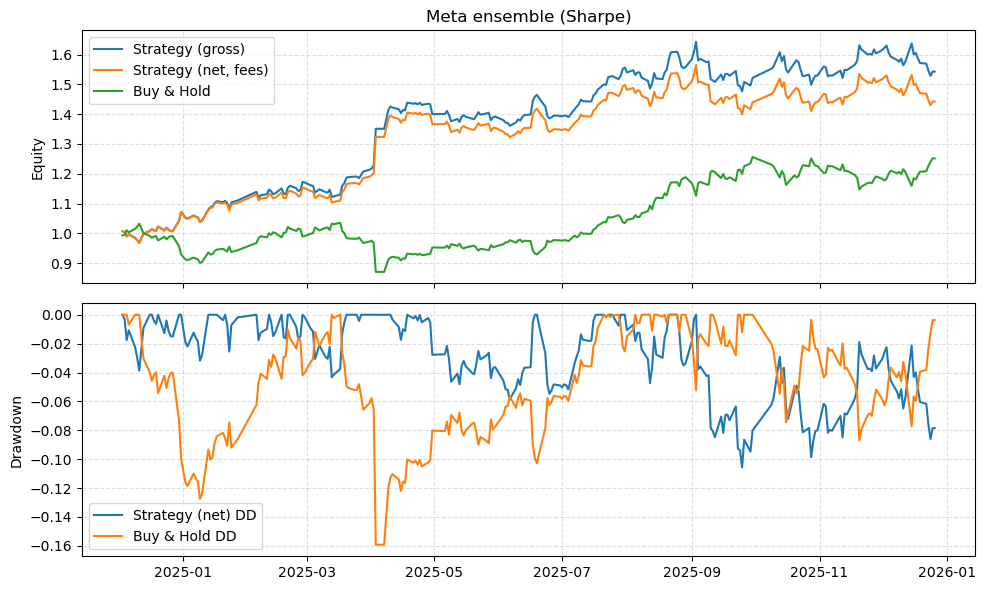

In [101]:
P, y = collect_engine_signals(engines)
meta_df = sharpe_strategy(P,y,test_start_dt= model_01.cutoff_dt,test_end_dt= None, sharpe_win = 120)
stats = backtest(meta_df['strategy'], col_ret="y", col_signal="signal", cutoff_dt= model_01.cutoff_dt, title="Meta ensemble (Sharpe)",)

A key limitation of the Sharpe-weighted strategy lies in its sensitivity to the cold-start phase and the resulting inherent lag in weight adjustment, a weakness that becomes particularly pronounced during regime shifts or changes in dominant factors. This behavior arises from the reliance of Sharpe estimation on rolling historical performance, which is inevitably noisy in early samples or under short estimation windows. To prevent early-stage weight distortion, an equal-weight configuration is adopted as a prior during the preparation phase, stabilizing initial weight allocation and mitigating cold-start bias.

Building on this foundation, exponential smoothing is applied to Sharpe estimates to further dampen the impact of short-term performance fluctuations, leading to a smoother evolution of ensemble weights and reduced unnecessary rebalancing. Empirical results indicate that longer Sharpe estimation windows generally yield more robust overall performance, at the expense of slower responsiveness to new information and structural changes—reflecting the classical trade-off between stability and adaptiveness.

From a performance perspective, the Sharpe-weighted ensemble delivers materially stronger risk-adjusted returns than most single-model strategies and achieves performance levels comparable to sign-based voting ensembles. Although its Sharpe ratio is typically slightly lower than that of pure voting schemes, this difference is often accompanied by smaller maximum drawdowns and a smoother equity curve, indicating a more conservative and sustainable risk profile.

Furthermore, when signal-level volatility normalization is introduced, the performance of the Sharpe-weighted strategy deteriorates relative to its non-normalized counterpart, while remaining significantly stronger than most single-model strategies. This suggests that volatility normalization, while reducing heterogeneity in prediction scale, may also compress performance differentials across models and thereby weaken the effectiveness of Sharpe-based weighting. Nevertheless, relative to unweighted or single-model configurations, the Sharpe-weighted ensemble continues to exhibit superior risk-adjusted characteristics under this setting.

Overall, these results indicate that Sharpe-based weighting retains a degree of robustness to signal-scale adjustments, but its effectiveness remains sensitive to parameter choices—such as estimation window length and smoothing strength—as well as to the interaction between volatility normalization and performance evaluation. This behavior highlights the practical trade-off faced by performance-based weighting mechanisms between information utilization efficiency, responsiveness, and robustness.

Sharpe 加权策略的一个关键局限在于其对冷启动阶段较为敏感，并在权重调整上天然存在一定的滞后性，该问题在市场结构或主导因子发生切换时尤为明显。其根源在于 Sharpe 比率依赖滚动历史表现进行估计，在样本初期或估计窗口较短的情况下不可避免地受到噪声干扰。为避免早期权重失真，本实现中在准备阶段采用等权配置作为先验，以稳定初始权重结构并缓解冷启动带来的估计偏差。

在此基础上，通过对 Sharpe 指标进行指数平滑处理，可以进一步削弱短期绩效波动对权重分配的影响，使权重演化过程更加平稳，从而减少不必要的频繁重配。实证结果表明，采用更长的 Sharpe 估计窗口通常能够带来更稳健的整体表现，但相应地会降低策略对新信息和结构变化的响应速度，体现出稳定性与适应性之间的经典权衡关系。

从绩效表现来看，Sharpe 加权集成在风险调整后收益上显著优于大多数单模型策略，其整体水平也接近基于符号投票的集成方法。尽管其 Sharpe 指标通常略低于纯投票方案，但这一差异往往伴随着更小的最大回撤和更平滑的资金曲线，反映出 Sharpe 加权在风险控制与资金曲线稳定性方面更为保守且可持续的特征。

进一步地，在引入信号层面的波动率归一化后，Sharpe 加权策略的整体表现相较于未进行波动率归一化的版本有所下降，但仍显著优于大多数单模型策略。这表明波动率归一化在削弱预测尺度差异的同时，也可能部分压缩了模型间基于绩效的区分度，从而对 Sharpe 加权机制的有效性产生一定影响。尽管如此，相较于未加权或单模型方案，Sharpe 加权在该设置下依然表现出更优的风险调整后特征。

总体而言，上述结果表明 Sharpe 权重对信号尺度调整具有一定的鲁棒性，但其效果仍对参数选择（如估计窗口长度与平滑强度）以及波动率归一化方式较为敏感。这一现象反映了基于绩效的权重机制在实际应用中需要在信息利用效率、响应速度与稳健性之间进行权衡。

#### **Conclusion and Disclaimer**

Overall, ensemble models tend to exhibit stronger and more stable predictive capability than individual decision trees. In this study, the combination of a walk-forward evaluation framework with heterogeneous bagging delivers solid experimental results on the CSI 500 index. That said, it is important to emphasize that not all assets are equally amenable to modeling, a point that is explicitly reflected in the feature engineering analysis presented in the accompanying notebooks.

In addition, the backtests reported in this work are intentionally simplified and illustrative in nature. Their primary purpose is to demonstrate predictive structure and relative model behavior, rather than to approximate real-world trading performance. Practical considerations such as transaction costs, slippage, liquidity constraints, and execution frictions are not incorporated, and therefore the results should not be interpreted as directly deployable trading outcomes.

It is also worth noting that for certain model classes—including bagging-based methods that are robust by design—the choice of training start date can materially influence the rule structures learned by individual trees. This effect arises from the accumulation of path-dependent errors over time, implying that even under identical parameter settings, different sample partitions may lead to divergent model behavior.

For these reasons, the findings of this study should be viewed as a research-oriented exploration of modeling behavior and methodological considerations, rather than as concrete trading recommendations or a universally applicable modeling framework.

总体而言，集成模型相较于单棵决策树通常具有更强且更稳定的预测能力。在本研究中，结合 walk-forward 评估框架与异质化 bagging 的方法在中证 500 指数上取得了较为稳健的实验结果。然而，需要明确指出的是，并非所有资产都具备良好的可建模性，这一点已在相关的特征工程分析（见对应 notebook）中得到体现。

此外，本文所展示的回测结果为刻意简化的示意性实验，其核心目的在于展示模型的预测结构与相对行为特征，而非复现真实交易环境。实际交易中所涉及的成交成本、滑点、流动性约束以及执行摩擦等关键因素均未纳入考虑，因此相关结果不应被解读为可直接用于实盘交易的绩效表现。

同时需要注意的是，对于部分模型类型——即便是本身具有较强稳健性的 bagging 类方法——训练起始区间的选择仍可能对树模型所学习到的规则结构产生实质性影响。这种影响主要来源于误差在时间维度上的累积，使得即使在相同参数设定下，不同样本切分也可能导致模型行为出现显著差异。

基于上述原因，本文的结论更应被视为一次研究层面的建模探索与方法论反思，而非具体的交易建议，亦不构成可广泛推广的统一建模方案。